# Apply Machine Learning Models On Regression Problems 

## Table of contents
---------------------------------------------
-  Import  Python Libraries 
-  Function Helper
-  Import Dataset & Data Description
-  Data Understanding
-  Select the Features
-  Data Pre-Processing
-  Exploratory Data Analysis
-  Data Transformation
-  Feature Engineering 
-  Feature Selection
-  Statistics Analysis
-  Data Splitting 
-  Machine Learning Models 
-  Machine Learning Optimization
-  Accuracy Score Summary 
-  Predication
-  Save The Machien Learning Models 

# Import Python Libraries 

In [1]:
import pandas as pd
import numpy as np 
np.iinfo(np.uint64).max

#   Visualization Libraries
import matplotlib.pyplot as plt
import plotly.express as px
from termcolor import colored 
import seaborn as sns  
from tabulate import tabulate

##      Importing plotly and cufflinks in offline mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

##      Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

##      Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#   Feature Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
le_orig = LabelEncoder()
ohe = OneHotEncoder()

#   Data Transformation 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer

#   Feature Selection
import sys
import joblib

sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest # Select features based on the k highest scores.
from sklearn.feature_selection import SelectPercentile # Select features based on percentile of the highest scores.
from sklearn.feature_selection import chi2 # Chi-squared stats of non-negative features for Regression tasks.
from sklearn.feature_selection import mutual_info_classif # Mutual information for a discrete target
from sklearn.feature_selection import f_classif # ANOVA F-value between label/feature for Regression tasks.

#   Data Splitting 
from sklearn.model_selection import train_test_split

#   sklearn Regressor Evaluation libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import accuracy_score # To get the accuracy score 

#   Supervised Machine Learning Models
##      Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

##      Gradient Boosting Regressor 
from sklearn.ensemble import GradientBoostingRegressor

##      Histogram-based Gradient Boosting Regression Tree
from sklearn.ensemble import HistGradientBoostingRegressor

##      AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

##      Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor

##      K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor

##      Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

##      Linear Regressor with stochastic gradient descent SGD training.
from sklearn.linear_model import SGDRegressor

##      XGBoost Regressor
from xgboost import XGBRegressor

##      Support Vector Machines Regressor
from sklearn.svm import SVR

##      Linear Support Vector Regression
from sklearn.svm import LinearSVR

##      Multilayer Perceptron Regressor
from sklearn.neural_network import MLPRegressor

#   Model Optmization
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Save and Load the Machine Learning Models 
import pickle

# Function Helper

In [2]:
'''
Read Dataset
'''
def CSV_File(path): 

    df_csv = pd.read_csv(path)

    return df_csv

'''
Drop Varibales
'''
def DropVariables(dfDrop, col):

    dfDrop = dfDrop.drop(col, axis=1)

    return dfDrop

'''
Convert Data Type
'''
def Convert_Data_Typt_to_str(Con_df_str, col):

    for colu in col :
        old_data_type = Con_df_str[colu].dtype
        Con_df_str[colu] = Con_df_str[colu].apply(str)
        print ('\nData Type for Variable:',[colu], ', Changed From',old_data_type, 'to',Con_df_str[colu].dtype)

    return Con_df_str
    
'''
Missong Value Information
'''
def missing_values(df_missing_value_per):

    missing_number = df_missing_value_per.isnull().sum().sort_values(ascending=False)
    missing_percent = (df_missing_value_per.isnull().sum()/df_missing_value_per.shape[0]).sort_values(ascending=False) 
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])

    return missing_values[missing_values['Missing_Number']>=0]

def missing_values_info(df_missing_value):

    print(colored(f"Missing Values for Catuogirical Dataset:\n", attrs=['bold']), missing_values(df_missing_value),'\n',  
        colored('-'*79, 'red', attrs=['bold']), sep='')

def SelectRowsHavingMissing_Value(df_Missing_Rows):

    null_data = df_Missing_Rows[df_Missing_Rows.isnull().any(axis=1)]
    
    return null_data

def replace_0_by_NA(df_replace, col_0_to_NA):

    df_replace[col_0_to_NA] = df_replace[col_0_to_NA].replace(0, np.nan) # if the Varibles is str we use '0', else 0

    return df_replace

'''
Split the Dataset Variables to Obj and Num
'''
def Data_Splitting_Num_Obj(df_split):

    Obj = df_split.select_dtypes(include = ['object'])
    Num = df_split.select_dtypes(include = np.number) 

    return Obj, Num

'''
Exploratory Data Analysis (EDA)
'''
def EDA_target(df_EDA,target):

      if (df_EDA[target].dtype == 'float64' or df_EDA[target].dtype == 'int64'):
            fig = px.histogram(df_EDA, x=target)
            fig.show()
            

def EDA_target2(df_EDA,target):

      if (df_EDA[target].dtype == 'float64' or df_EDA[target].dtype == 'int64'):

            df_EDA.boxplot(column=target, figsize=(30, 20))
            plt.show()

def obj_EDA(df_EDA, cols):

    for col in cols:
        table = pd.DataFrame(df_EDA[col].value_counts())
        print(tabulate(table, headers = 'keys', tablefmt = 'psql'))
        plt.figure(figsize = (30, 20))
        df_EDA[col].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
        plt.title(col)
        plt.show()

def EDA_obj(df_EDA, cols, Target):

    for col in cols:
        print('Variable Name: ', df_EDA[col].name)
        pd.crosstab(df_EDA[col], df_EDA[Target]).iplot(kind="bar")

def EDA_num(df_EDA, cols):

    for col in cols: 
        fig, ax = plt.subplots(figsize=(30, 20))
        df_EDA.hist(column=[col], ax=ax )

def EDA_num_2(df_EDA, cols):

    for col in cols: 
        df_EDA.boxplot(column=col, figsize=(30, 20))
        plt.show()
    
def EDA_num_with_DV(df_eda, NUMcols_eda, target): 

    for col in NUMcols_eda:
        sns.set_style('whitegrid')
        plt.figure(figsize=(20,10))
        sns.set_context('paper', font_scale=1.5)

        sns.histplot(x=col, data = df_eda, bins = 30, hue = target,palette="Blues", kde = True).set_title(col,fontsize=20)
        plt.legend(['not satisfaction','satisfaction'],shadow = True, loc = 0);

'''
Data Transformation
'''
def NumStandardScaler(dataframe_series):

    for col in list(dataframe_series.columns):
        if (dataframe_series[col].dtype == 'float64' or dataframe_series[col].dtype == 'int64'): # and (col != target):
                print ('\nStandardization Applied On:', col)
                dataframe_series[col] = StandardScaler().fit_transform(dataframe_series[col].values.reshape(-1,1))

    return dataframe_series

'''
Feature Engineering 
'''
def AllObjLabelEncoder(dataframe_series):

    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le_orig = preprocessing.LabelEncoder()

    df_old = dataframe_series.copy(deep = False)

    if dataframe_series.dtype=='object':
        col = dataframe_series.name

        dataframe_series = le.fit_transform(dataframe_series)
        print('\nLable Encoding Applied On:', col)

        le.fit(dataframe_series)
        print('New Value for',col,' Variable:', le.classes_)

        le_orig.fit(df_old)
        print('Old Value for',col,'Variable:', le_orig.classes_)

    return dataframe_series

'''
Feature Selection
'''

def Feature_selection_BackWard(df_forward, target):

    # Split the df into Obj and Num
    obj, num = Data_Splitting_Num_Obj(df_forward)

    list_df_num = list(num.columns)
    if target not in list_df_num: 
        list_df_num.append(target)
    print('All the Num Variables:',list_df_num)

    list_df_Obj = list(obj.columns)
    print('\nAll the obj Variables:',list_df_Obj)

    # Create New DataFrame Hvae only the Num Variables
    df_num = df_forward[list_df_num]

    # define dataset
    X = df_num.drop(target, axis=1)
    y = df_num[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    forward_FS = SequentialFeatureSelector(RandomForestRegressor(n_jobs= -1, ), # How many course you want to use. '-1 mwans all the course'
                                                                k_features= (1, X.shape[1]),
                                                                forward=False,
                                                                floating=False,
                                                                scoring = 'neg_mean_squared_error', # mean_squared_error, neg_mean_squared_error
                                                                verbose=2,
                                                                cv= 5
                ).fit(X_train, y_train)

    new_list_num = list(forward_FS.k_feature_names_)

    print ('\nMost Variables Can Effect The Target Variables: ',new_list_num)
    print ('\nWith Highest Score: ',forward_FS.k_score_)

    
    if target not in new_list_num: 
        new_list_num.append(target)
    print('\nAll the Variables Selected: ',new_list_num)

    new_df_list = new_list_num + list_df_Obj
    df_forward = df_forward[new_df_list]

    forward_FS = pd.DataFrame(forward_FS.get_metric_dict()).T

    return df_forward, forward_FS


def Save_ML(ML_Name, _ml):

    i = 0 

    for ML in ML_Name:

        with open(ML, "wb") as file:
            
            print(f'Create file name {ML}')

            pickle.dump(_ml[i], file)
            print('Model:', _ml[i], 'Saved\n')

        i += 1  

# Import Dataset & Data Description

## Import Dataset

In [3]:
Path = '/content/kc_house_data.csv'
file_type = 'C'

if file_type == 'C':
    df = CSV_File(Path)

In [4]:
pd.DataFrame(df.head(10))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.000,4,4.500,5420,101930,1.000,0,0,3,11,3890,1530,2001,0,98053,47.656,-122.005,4760,101930
6,1321400060,20140627T000000,257500.000,3,2.250,1715,6819,2.000,0,0,3,7,1715,0,1995,0,98003,47.310,-122.327,2238,6819
7,2008000270,20150115T000000,291850.000,3,1.500,1060,9711,1.000,0,0,3,7,1060,0,1963,0,98198,47.410,-122.315,1650,9711
8,2414600126,20150415T000000,229500.000,3,1.000,1780,7470,1.000,0,0,3,7,1050,730,1960,0,98146,47.512,-122.337,1780,8113
9,3793500160,20150312T000000,323000.000,3,2.500,1890,6560,2.000,0,0,3,7,1890,0,2003,0,98038,47.368,-122.031,2390,7570


## Data Description

# Data Understanding

In [5]:
print(df.info(), '\n', 
            colored('-'*79, 'red', attrs=['bold']), sep='')
missing_values_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
NUMcols = df.select_dtypes(np.number).columns
Objcols = df.select_dtypes(include = ['object']).columns

In [7]:
if len(NUMcols) != 0 :
    su_stat = pd.DataFrame(df.describe().T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+---------------+---------+-----------------+------------------+----------------+------------------+------------------+-----------------+------------------+
|               |   count |            mean |              std |            min |              25% |              50% |             75% |              max |
|---------------+---------+-----------------+------------------+----------------+------------------+------------------+-----------------+------------------|
| id            |   21613 |      4.5803e+09 |      2.87657e+09 |     1.0001e+06 |      2.12305e+09 |      3.90493e+09 |      7.3089e+09 |      9.9e+09     |
| price         |   21613 | 540088          | 367127           | 75000          | 321950           | 450000           | 645000          |      7.7e+06     |
| bedrooms      |   21613 |      3.37084    |      0.930062    |     0          |      3           |      3           |      4          |     33           |
| bathrooms     |   21613 |      2.11476    |      0.77016

In [8]:
if len(Objcols) != 0 :
    su_stat = pd.DataFrame(df.describe(include=object).T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+------+---------+----------+-----------------+--------+
|      |   count |   unique | top             |   freq |
|------+---------+----------+-----------------+--------|
| date |   21613 |      372 | 20140623T000000 |    142 |
+------+---------+----------+-----------------+--------+


In [9]:
pd.DataFrame(df.var())

,0
id,8274629486057861120.000
price,134782378397.247
bedrooms,0.865
bathrooms,0.593
sqft_living,843533.681
sqft_lot,1715658774.175
floors,0.292
waterfront,0.007
view,0.587
condition,0.423


# Select the Features

In [10]:
'''
                1)        Target Varibale
'''
target = 'price'

'''
                2)        Drop Varibales 
'''
drop = 'Enable' # The Variable Need to Drop
col_drop = [ 
        
            'id', 'date', 'zipcode', 'lat', 'long'

        ]

'''
                3)        Convert Data Type 
'''
# to convert variable type to str
convert_to_str = 'Enable' 
col_convert_str = [  
                    
                    'waterfront', 'view', 'condition', 'grade'
                ]

Convert_0_to_Na = 'Enable'
col_0_to_na = [ 
        
                'bedrooms', 'bathrooms', 
        
        ]

Drop_All_Missing = 'Enable' # Enable or Disable


'''
                7)        Data Transformation
'''
DT = 'StandardScaler' 


'''
                8)        Featuers Selection And Featuers Engineering
'''
# Featuers
FE = 'LableEncodeing' 
FS = 'Backward' 

'''
                10)        Data Splitting
'''
# Randomly
Random = 'Enable'
Split_size = 0.2 # Testing Size
Randon_state_size = 42
'''
                11)        Machine Learning Models 
'''
ML_ST = 'Enable'

'''  
                12)        Machine Learning Optimization 
'''
ML_OP = 'Disable'

# Data Pre-Processing

## Drop Varibales 

In [11]:
if drop == 'Enable': 
    df = DropVariables(df, col_drop)
    print(col_drop,'Droped\n')
print(tabulate(df.info(), headers = 'keys', tablefmt = 'psql'))

['id', 'date', 'zipcode', 'lat', 'long'] Droped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 2.6 MB

## Convert Data Type

In [12]:
if convert_to_str == 'Enable': 
    df = Convert_Data_Typt_to_str(df,col_convert_str)


Data Type for Variable: ['waterfront'] , Changed From int64 to object

Data Type for Variable: ['view'] , Changed From int64 to object

Data Type for Variable: ['condition'] , Changed From int64 to object

Data Type for Variable: ['grade'] , Changed From int64 to object


## Missing Value

In [13]:
NUMcols = df.select_dtypes(np.number).columns
Objcols = df.select_dtypes(include = ['object']).columns

### Replace 0 by Na

In [14]:
if Convert_0_to_Na == 'Enable':
    df = replace_0_by_NA(df, col_0_to_na)
    missing_values_info(df)

Missing Values for Catuogirical Dataset:
               Missing_Number  Missing_Percent
bedrooms                   13            0.001
bathrooms                  10            0.000
price                       0            0.000
sqft_living                 0            0.000
sqft_lot                    0            0.000
floors                      0            0.000
waterfront                  0            0.000
view                        0            0.000
condition                   0            0.000
grade                       0            0.000
sqft_above                  0            0.000
sqft_basement               0            0.000
yr_built                    0            0.000
yr_renovated                0            0.000
sqft_living15               0            0.000
sqft_lot15                  0            0.000
-------------------------------------------------------------------------------


### Drop Missing Value

In [15]:
if Drop_All_Missing == 'Enable':
    df = df.dropna()
    df = df.reset_index()
    df = df.drop(columns=['index'])
    missing_values_info(df)

Missing Values for Catuogirical Dataset:
               Missing_Number  Missing_Percent
price                       0            0.000
bedrooms                    0            0.000
bathrooms                   0            0.000
sqft_living                 0            0.000
sqft_lot                    0            0.000
floors                      0            0.000
waterfront                  0            0.000
view                        0            0.000
condition                   0            0.000
grade                       0            0.000
sqft_above                  0            0.000
sqft_basement               0            0.000
yr_built                    0            0.000
yr_renovated                0            0.000
sqft_living15               0            0.000
sqft_lot15                  0            0.000
-------------------------------------------------------------------------------


# Exploratory Data Analysis (EDA)

In [16]:
NUMcols = df.select_dtypes(np.number).columns
NUMcols = NUMcols.drop(target)

Objcols = df.select_dtypes(include = ['object']).columns

## Dependent Variables

In [17]:
EDA_target(df, target)

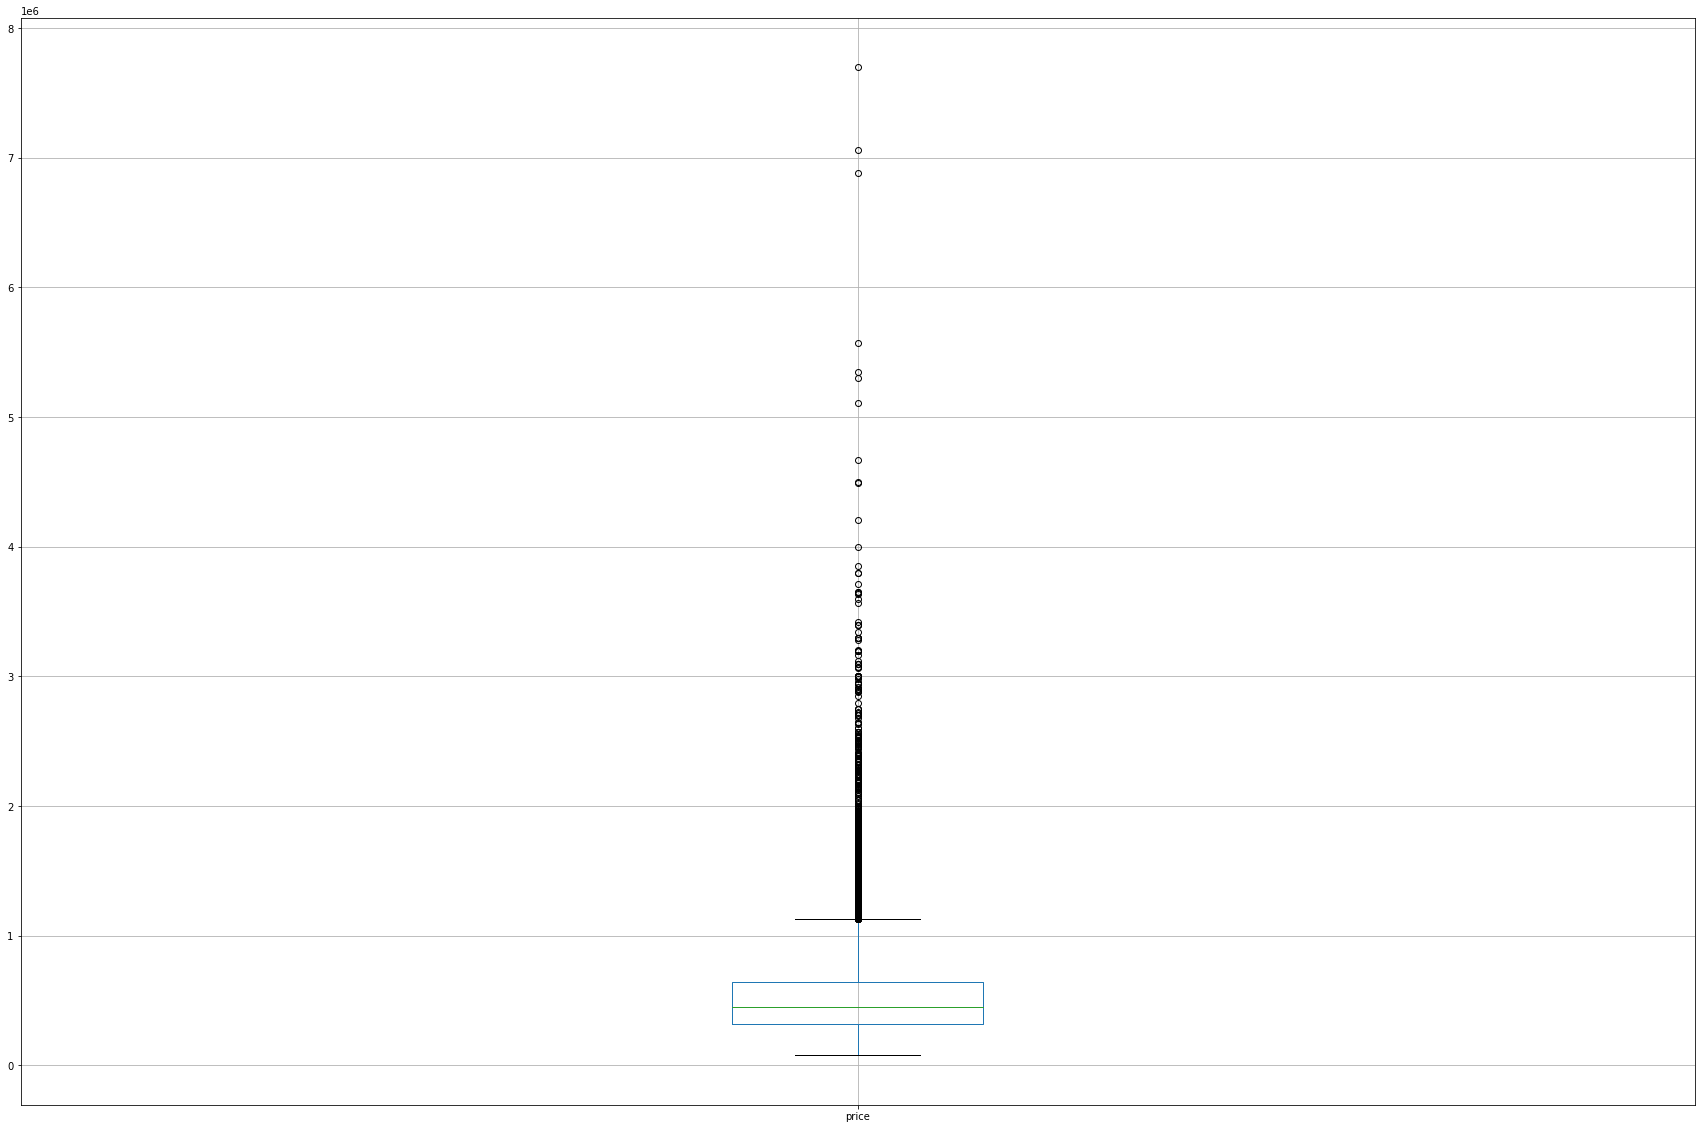

In [18]:
EDA_target2(df, target)

## Independent Dependent Variables

### Independent Dependent Variables (Object Variables) 

+----+--------------+
|    |   waterfront |
|----+--------------|
|  0 |        21434 |
|  1 |          163 |
+----+--------------+


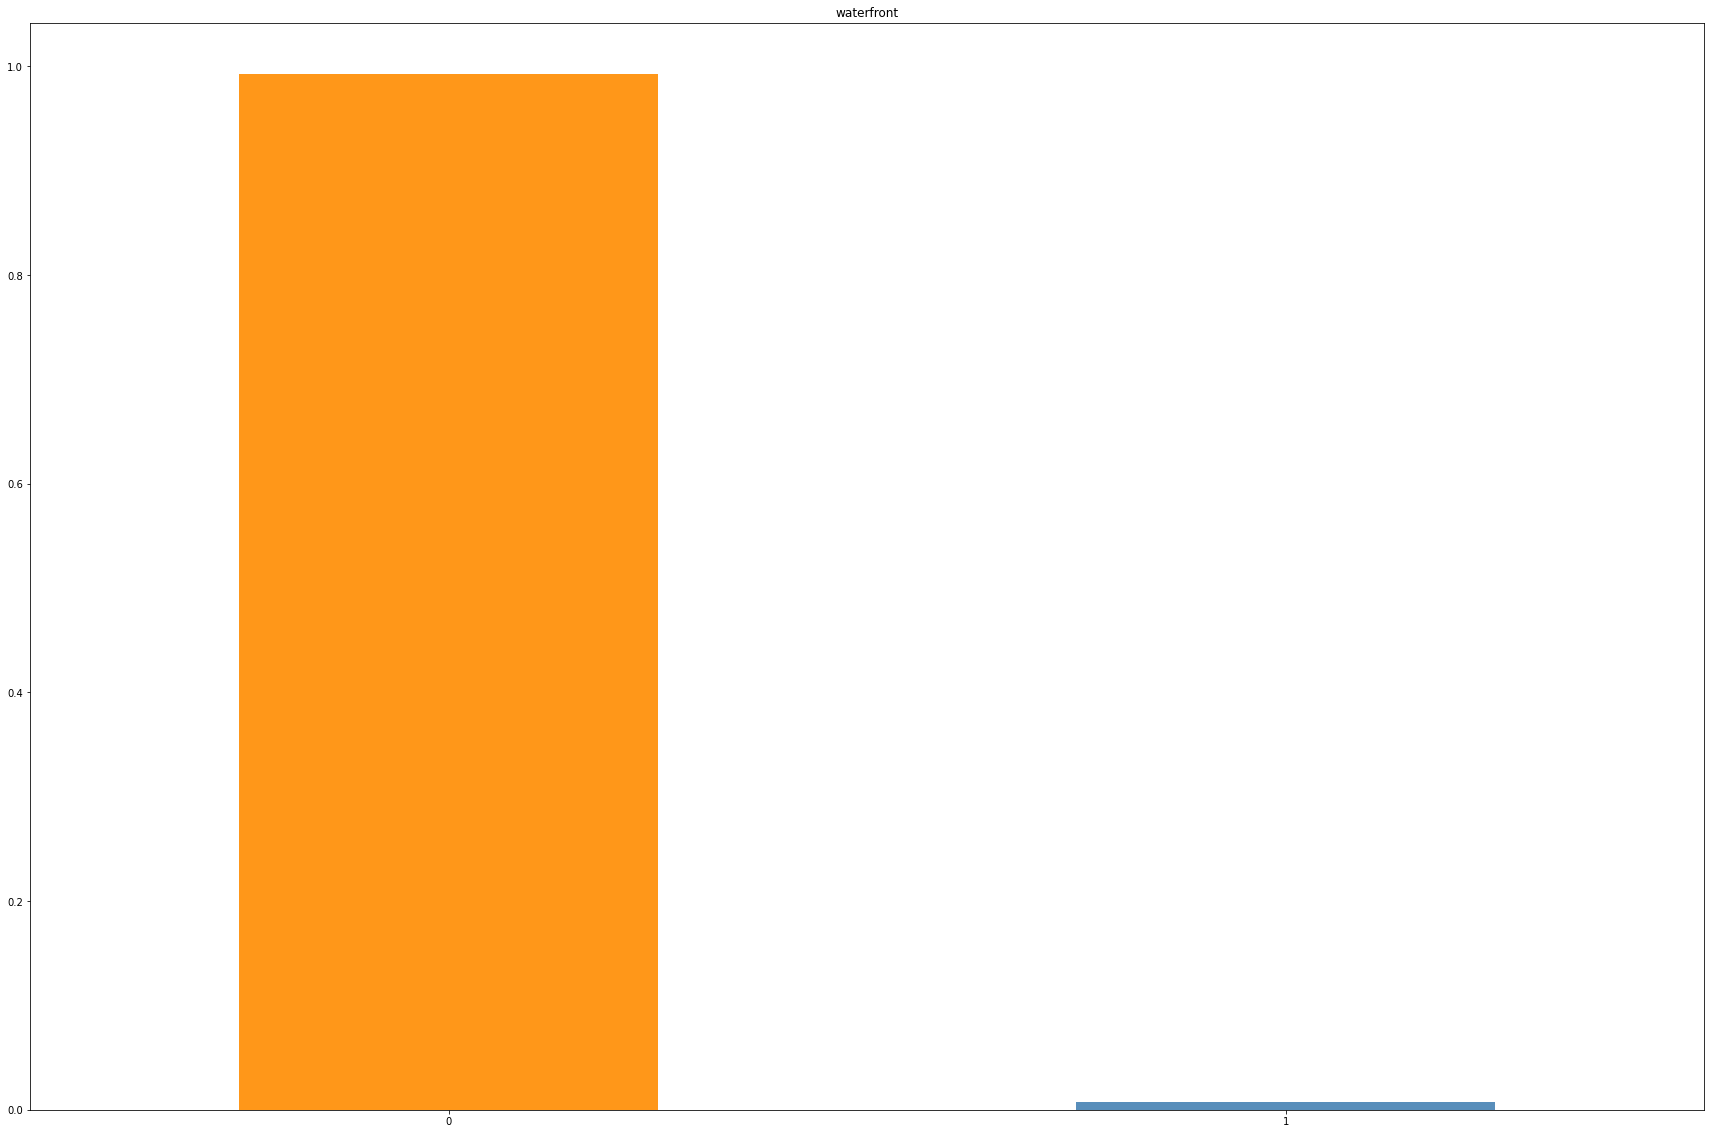

+----+--------+
|    |   view |
|----+--------|
|  0 |  19475 |
|  2 |    961 |
|  3 |    510 |
|  1 |    332 |
|  4 |    319 |
+----+--------+


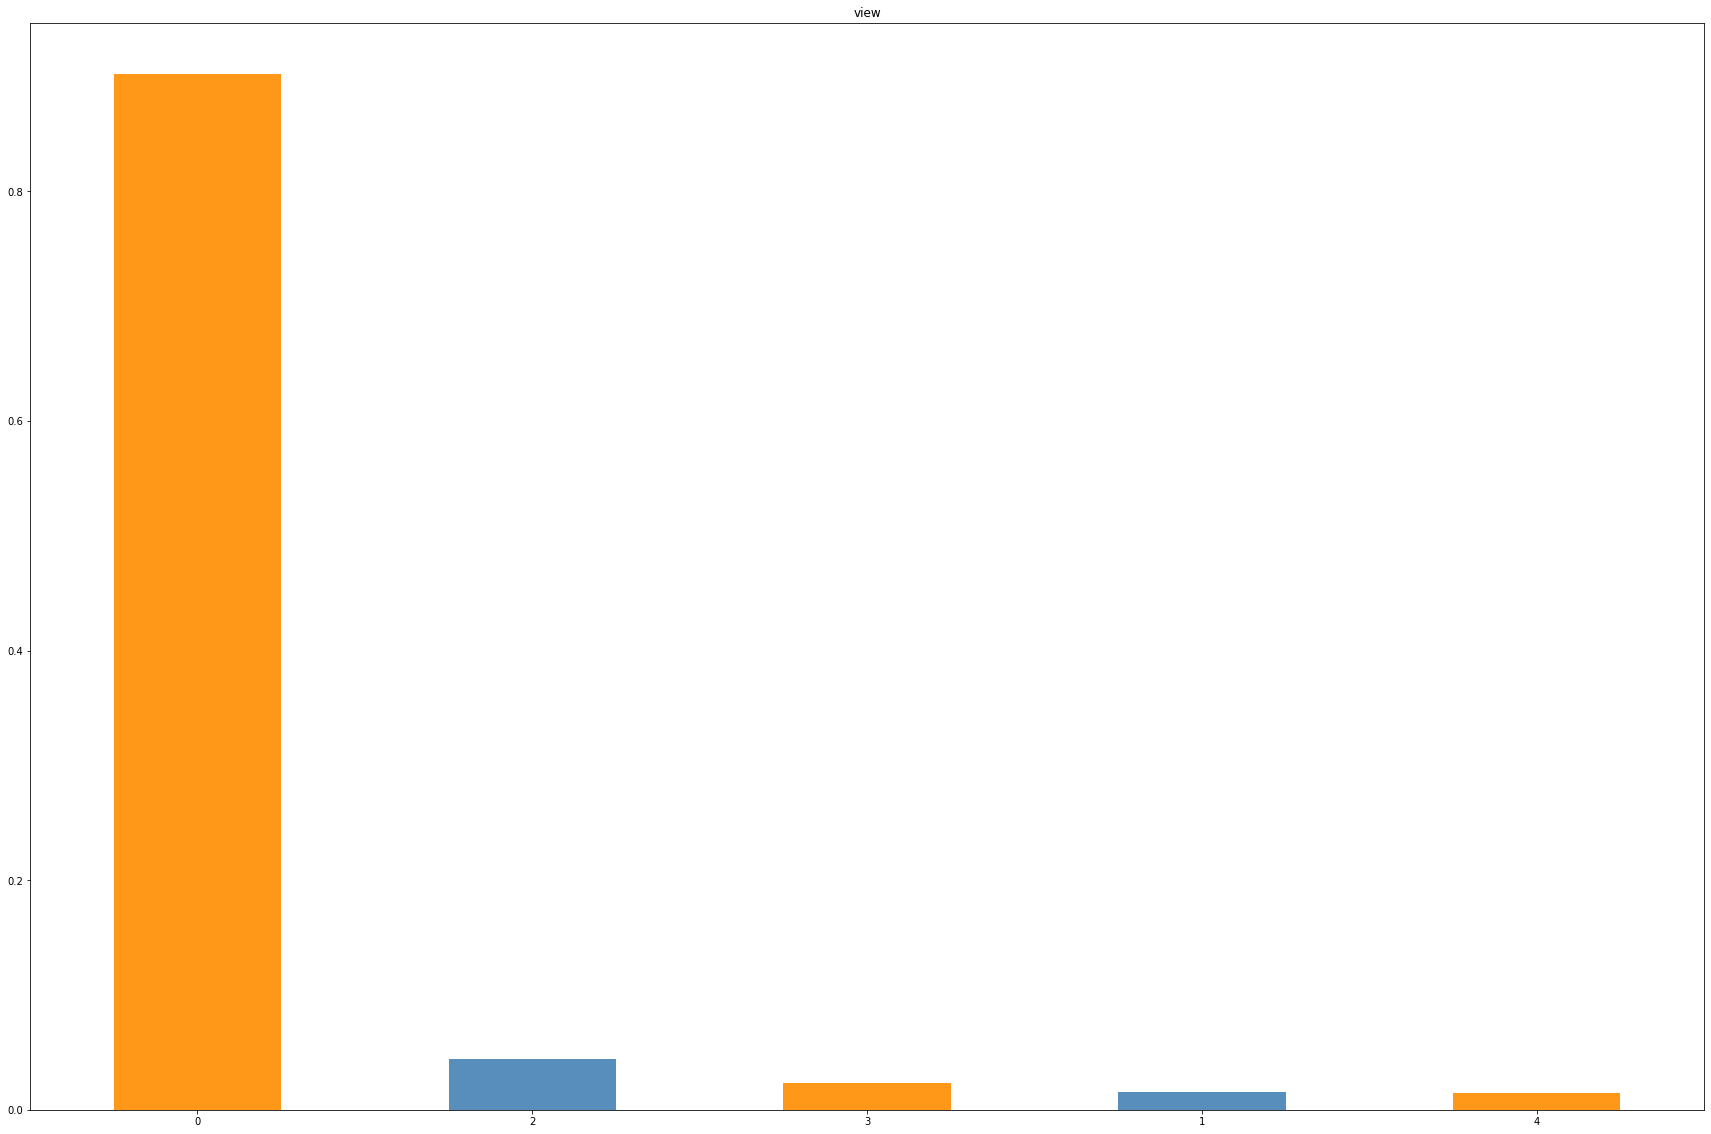

+----+-------------+
|    |   condition |
|----+-------------|
|  3 |       14020 |
|  4 |        5677 |
|  5 |        1701 |
|  2 |         170 |
|  1 |          29 |
+----+-------------+


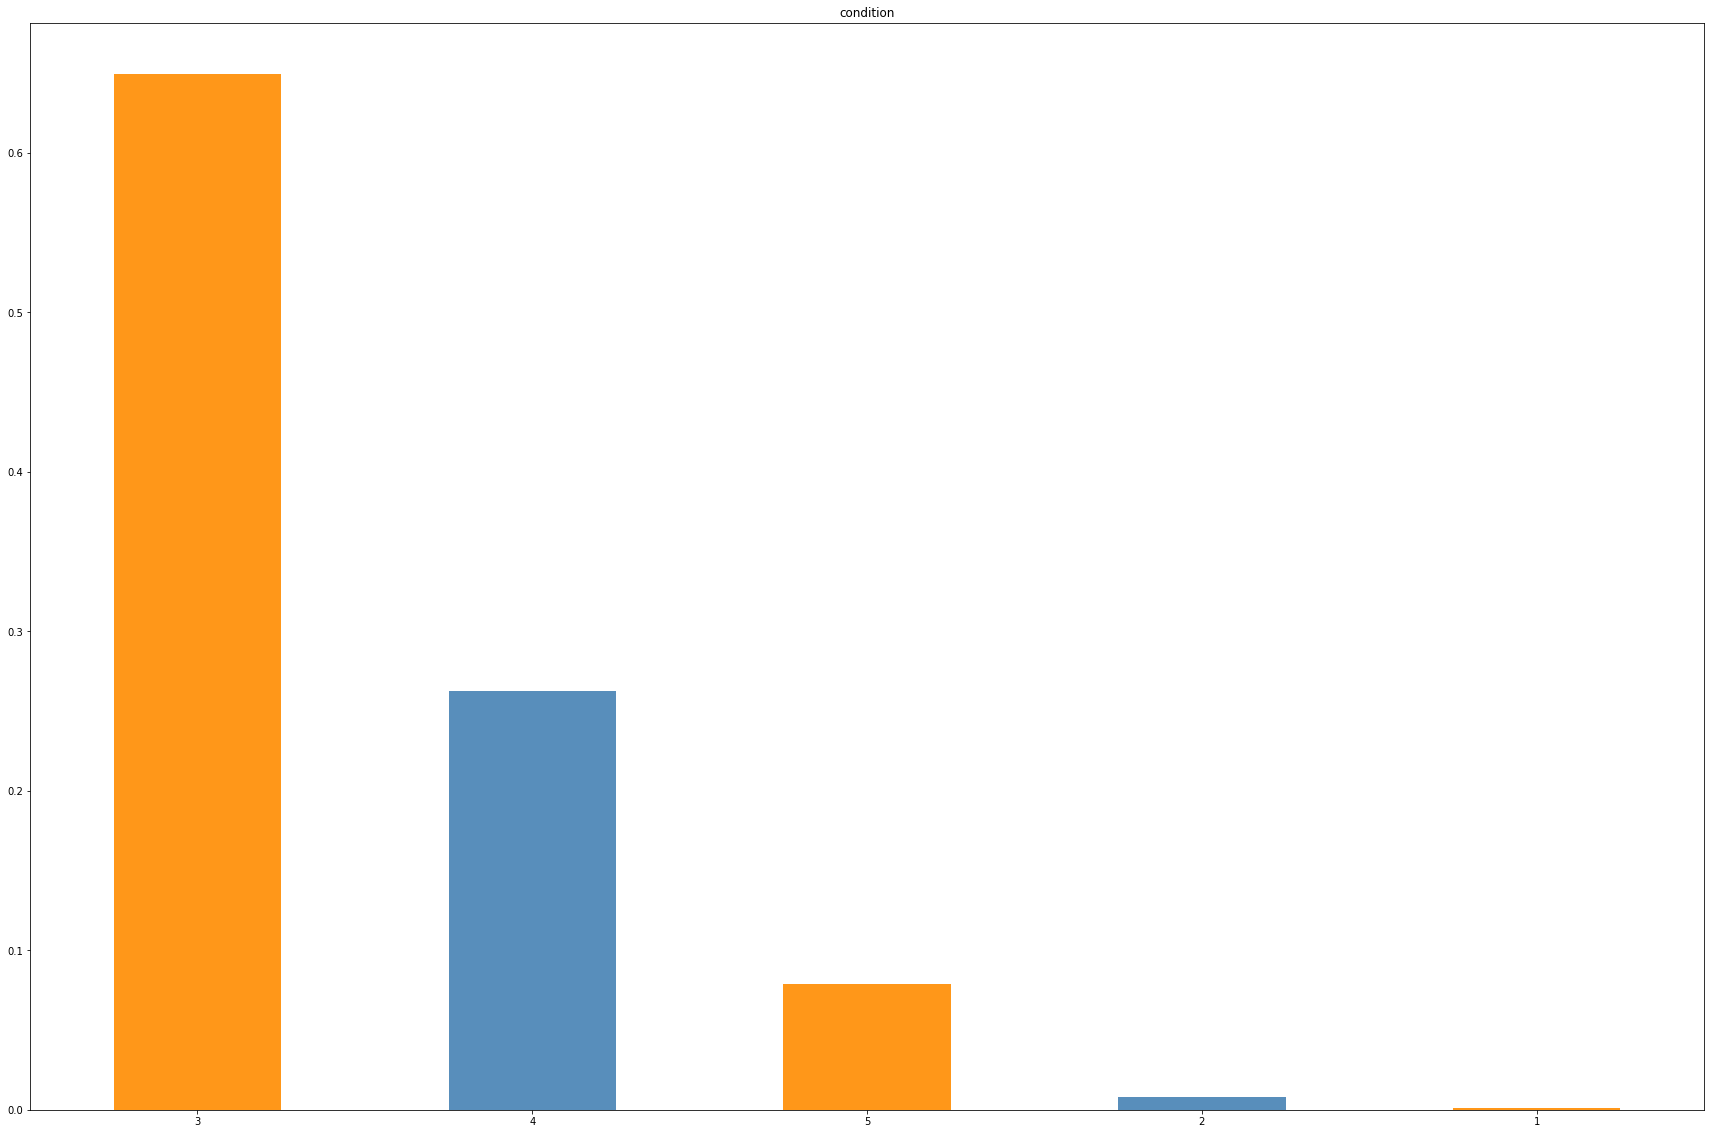

+----+---------+
|    |   grade |
|----+---------|
|  7 |    8974 |
|  8 |    6065 |
|  9 |    2615 |
|  6 |    2038 |
| 10 |    1134 |
| 11 |     399 |
|  5 |     242 |
| 12 |      89 |
|  4 |      27 |
| 13 |      13 |
|  3 |       1 |
+----+---------+


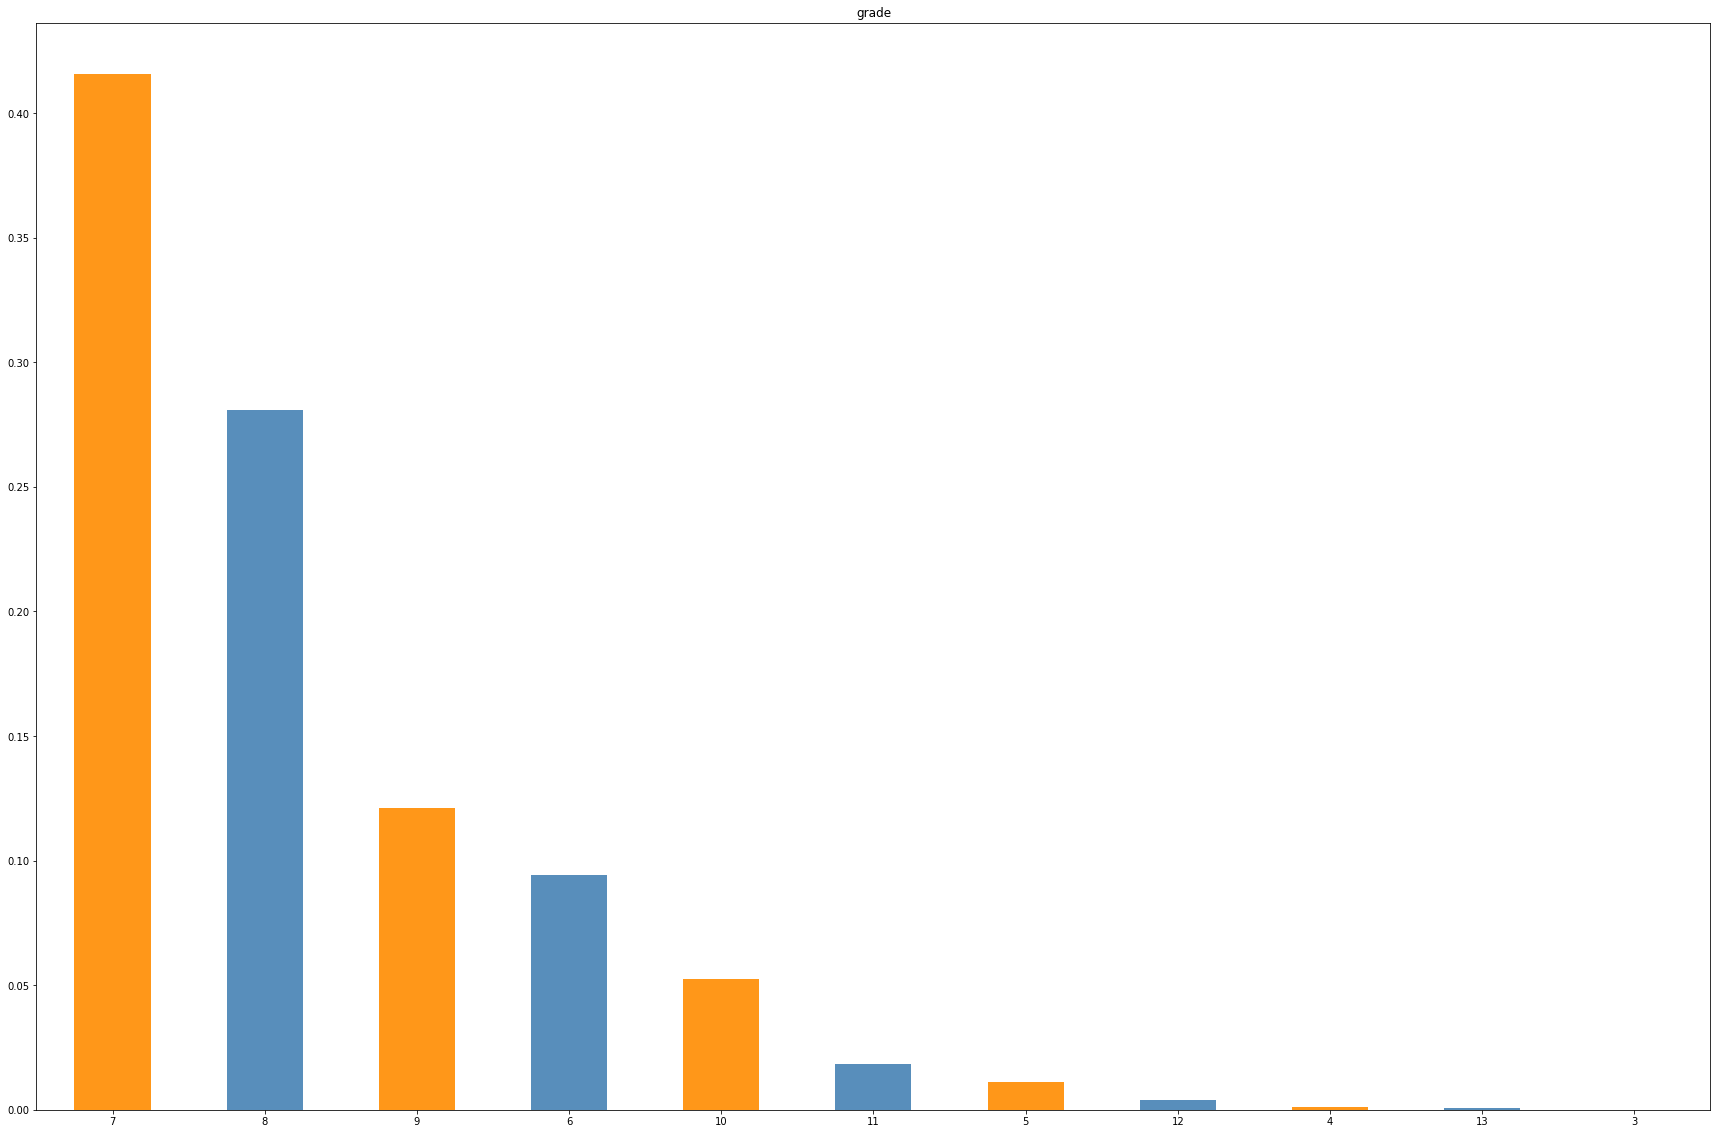

In [19]:
obj_EDA(df, Objcols)

### Independent Dependent Variables (Numerical)

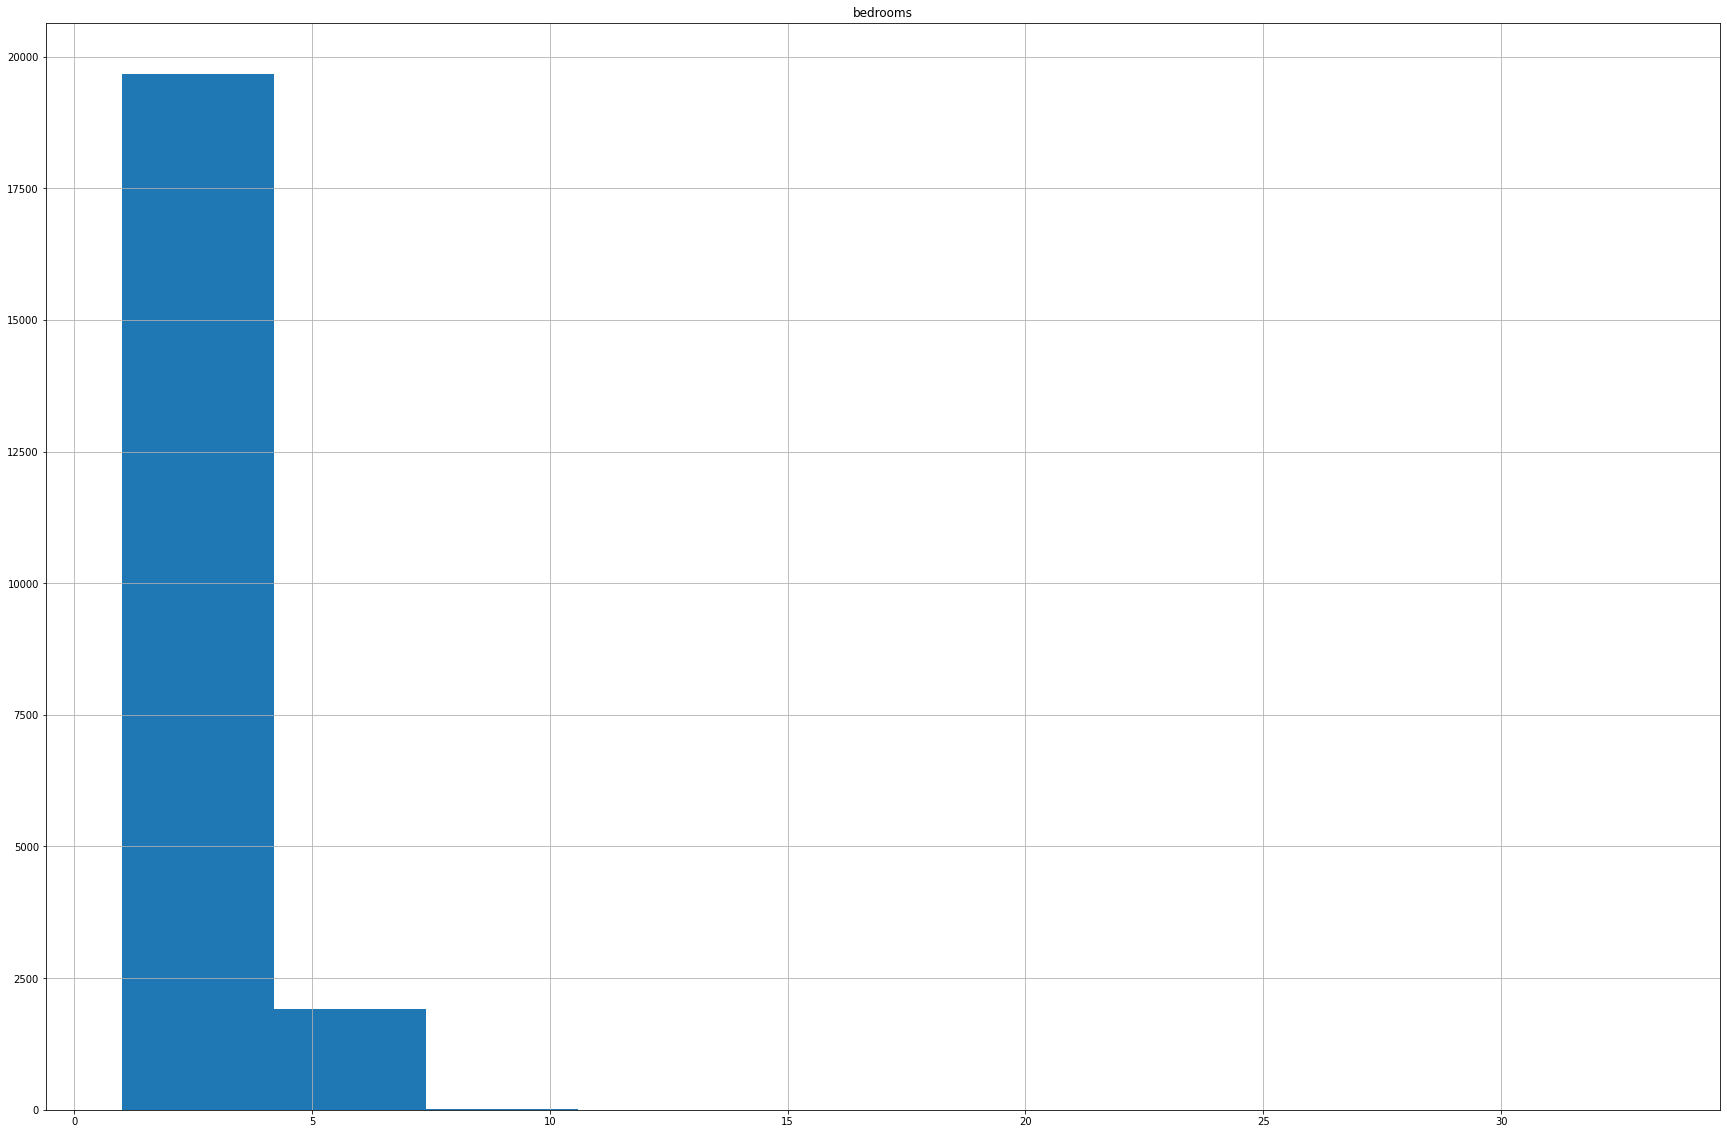

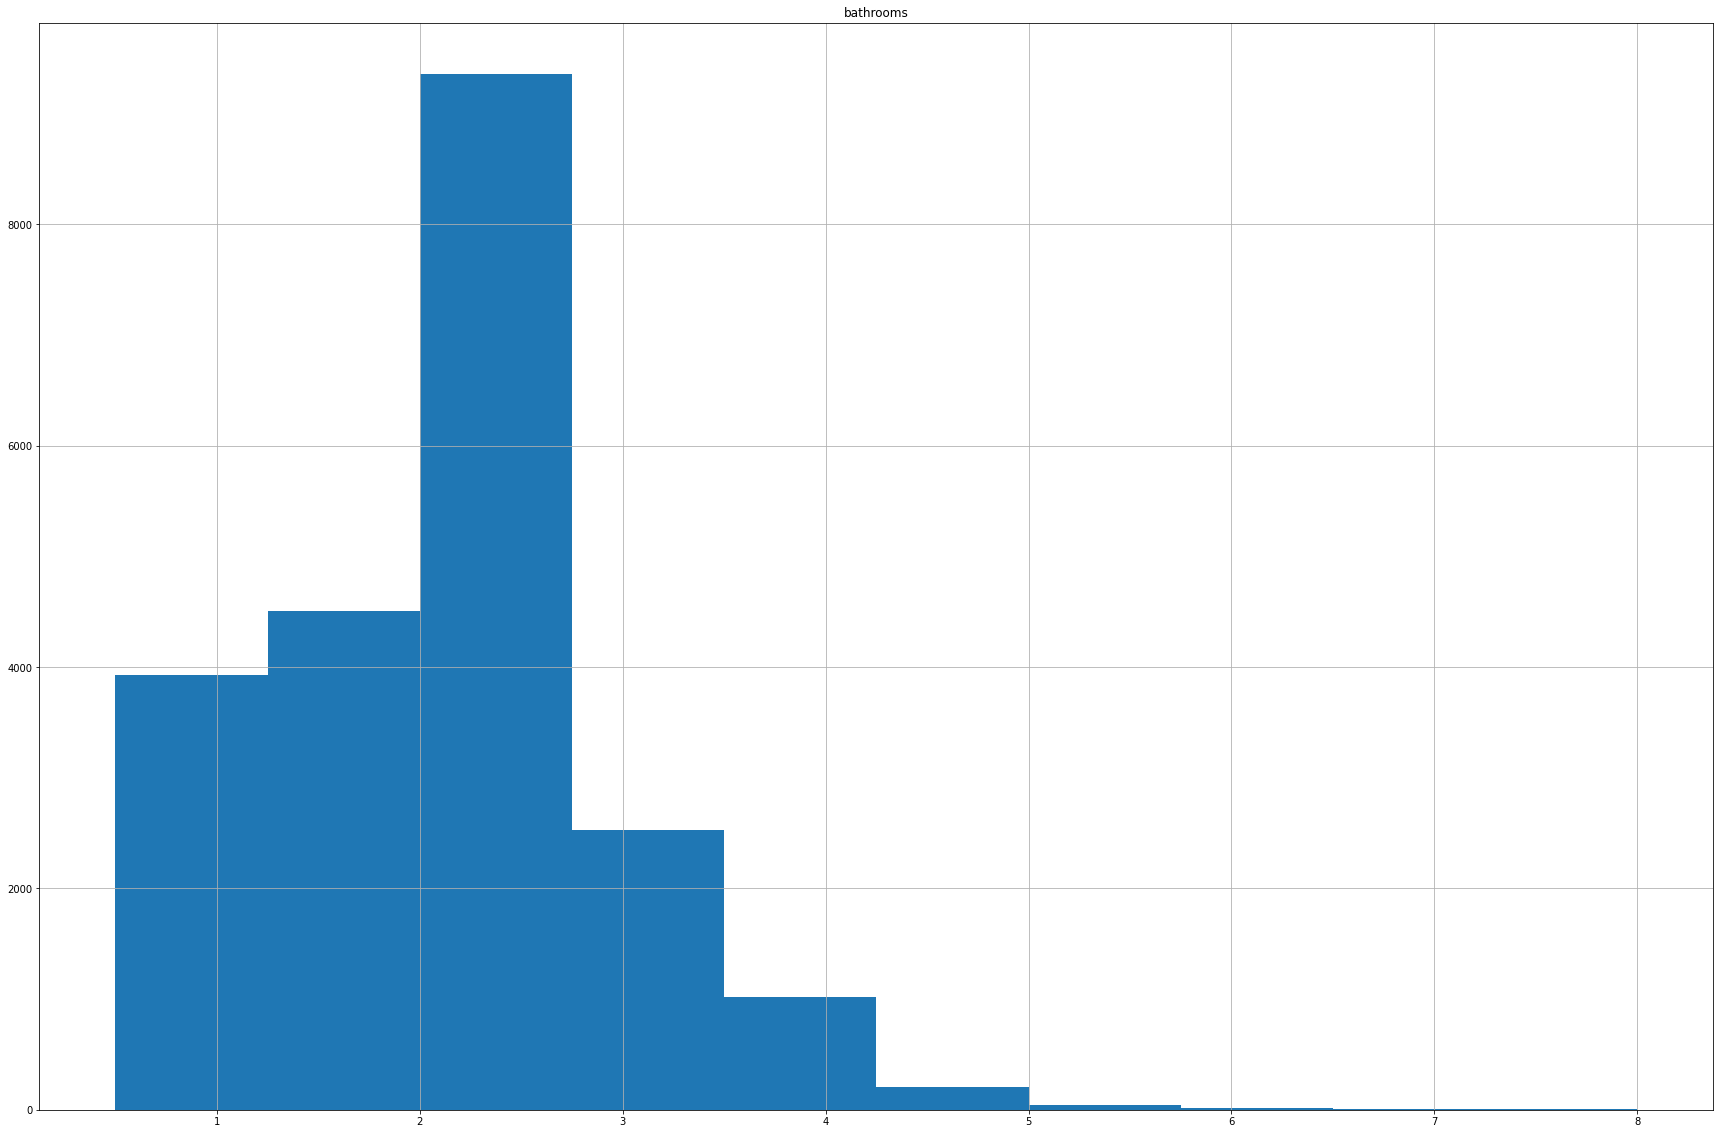

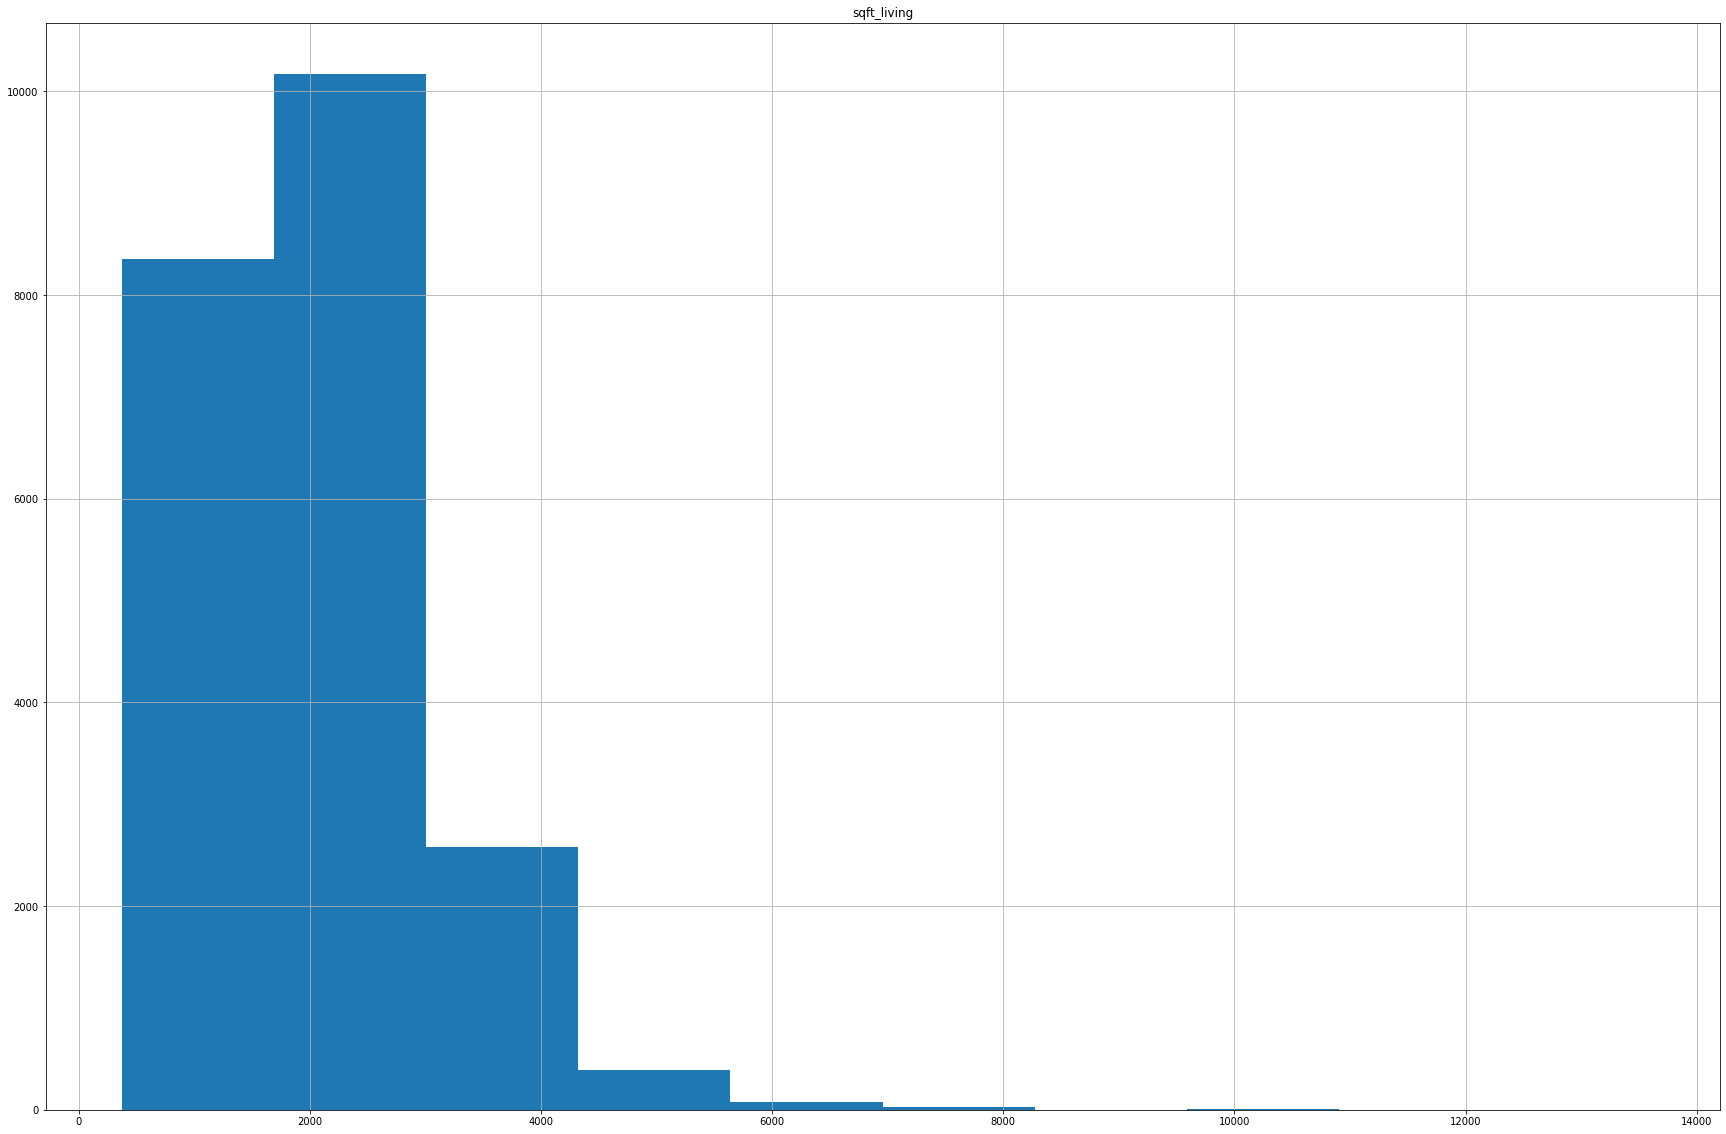

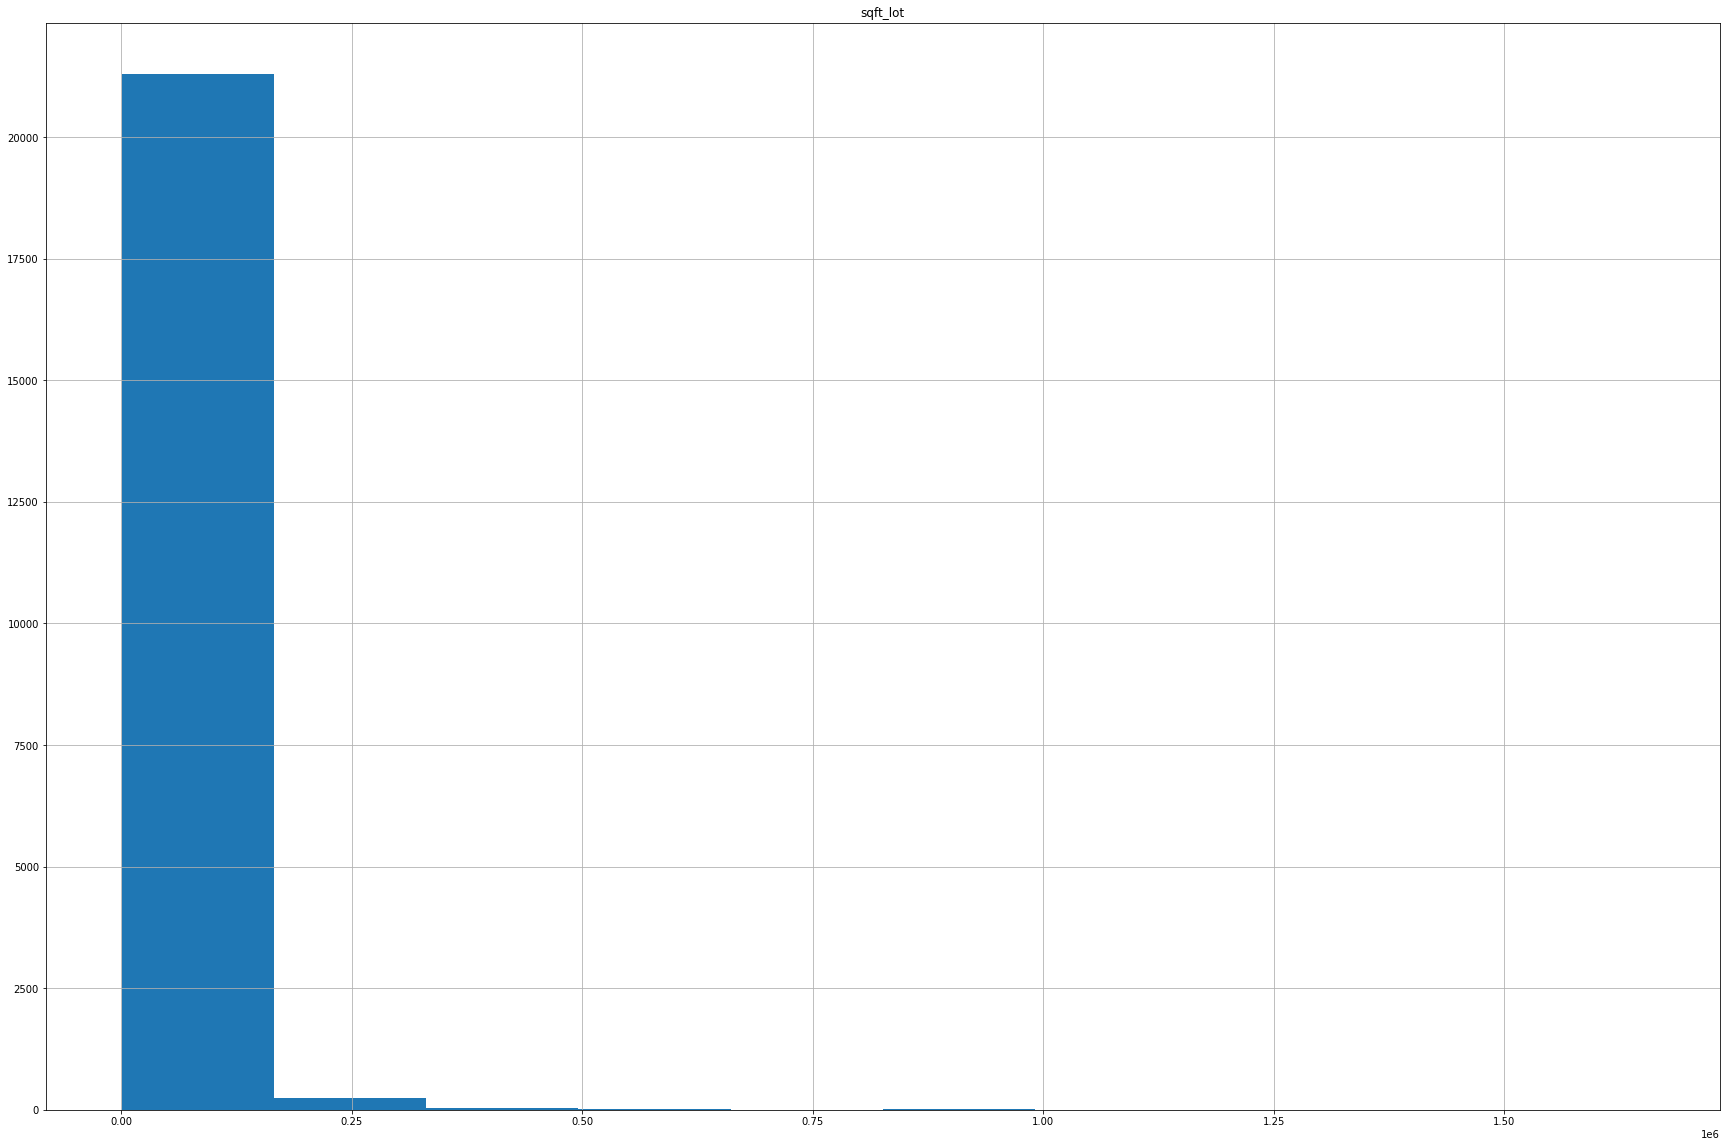

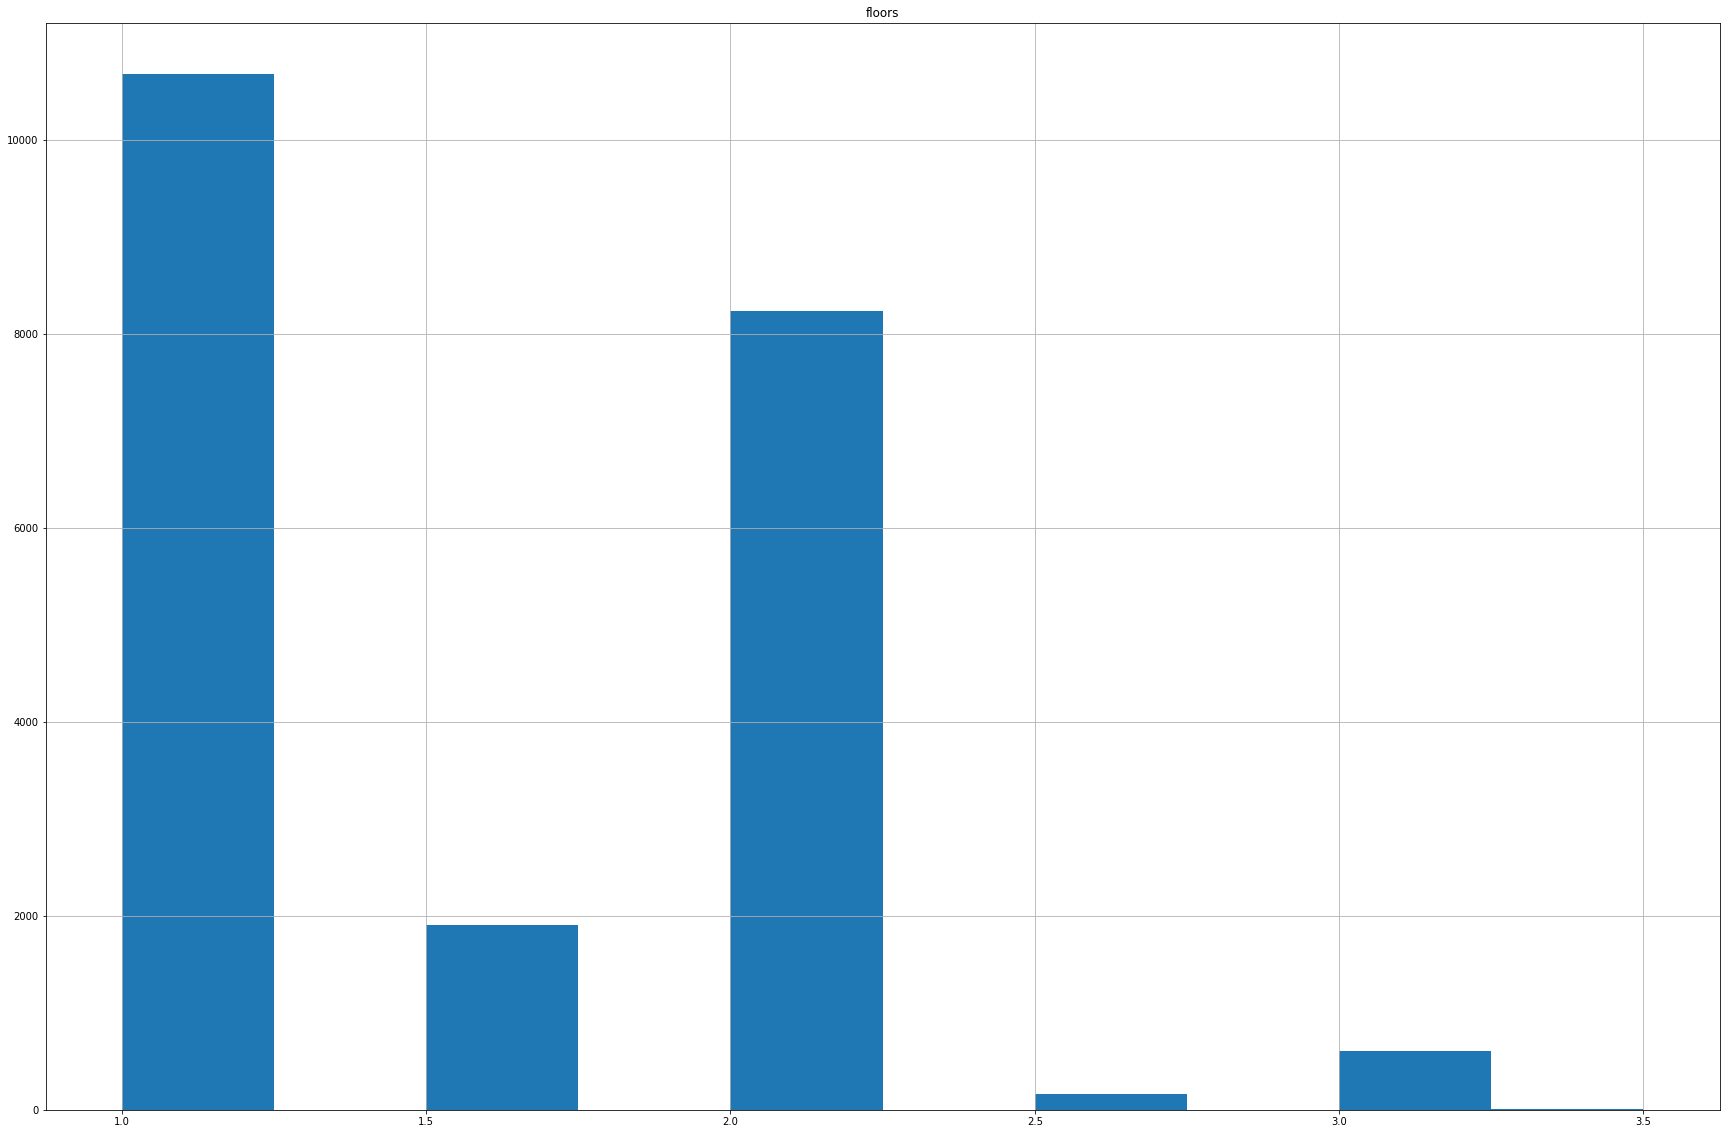

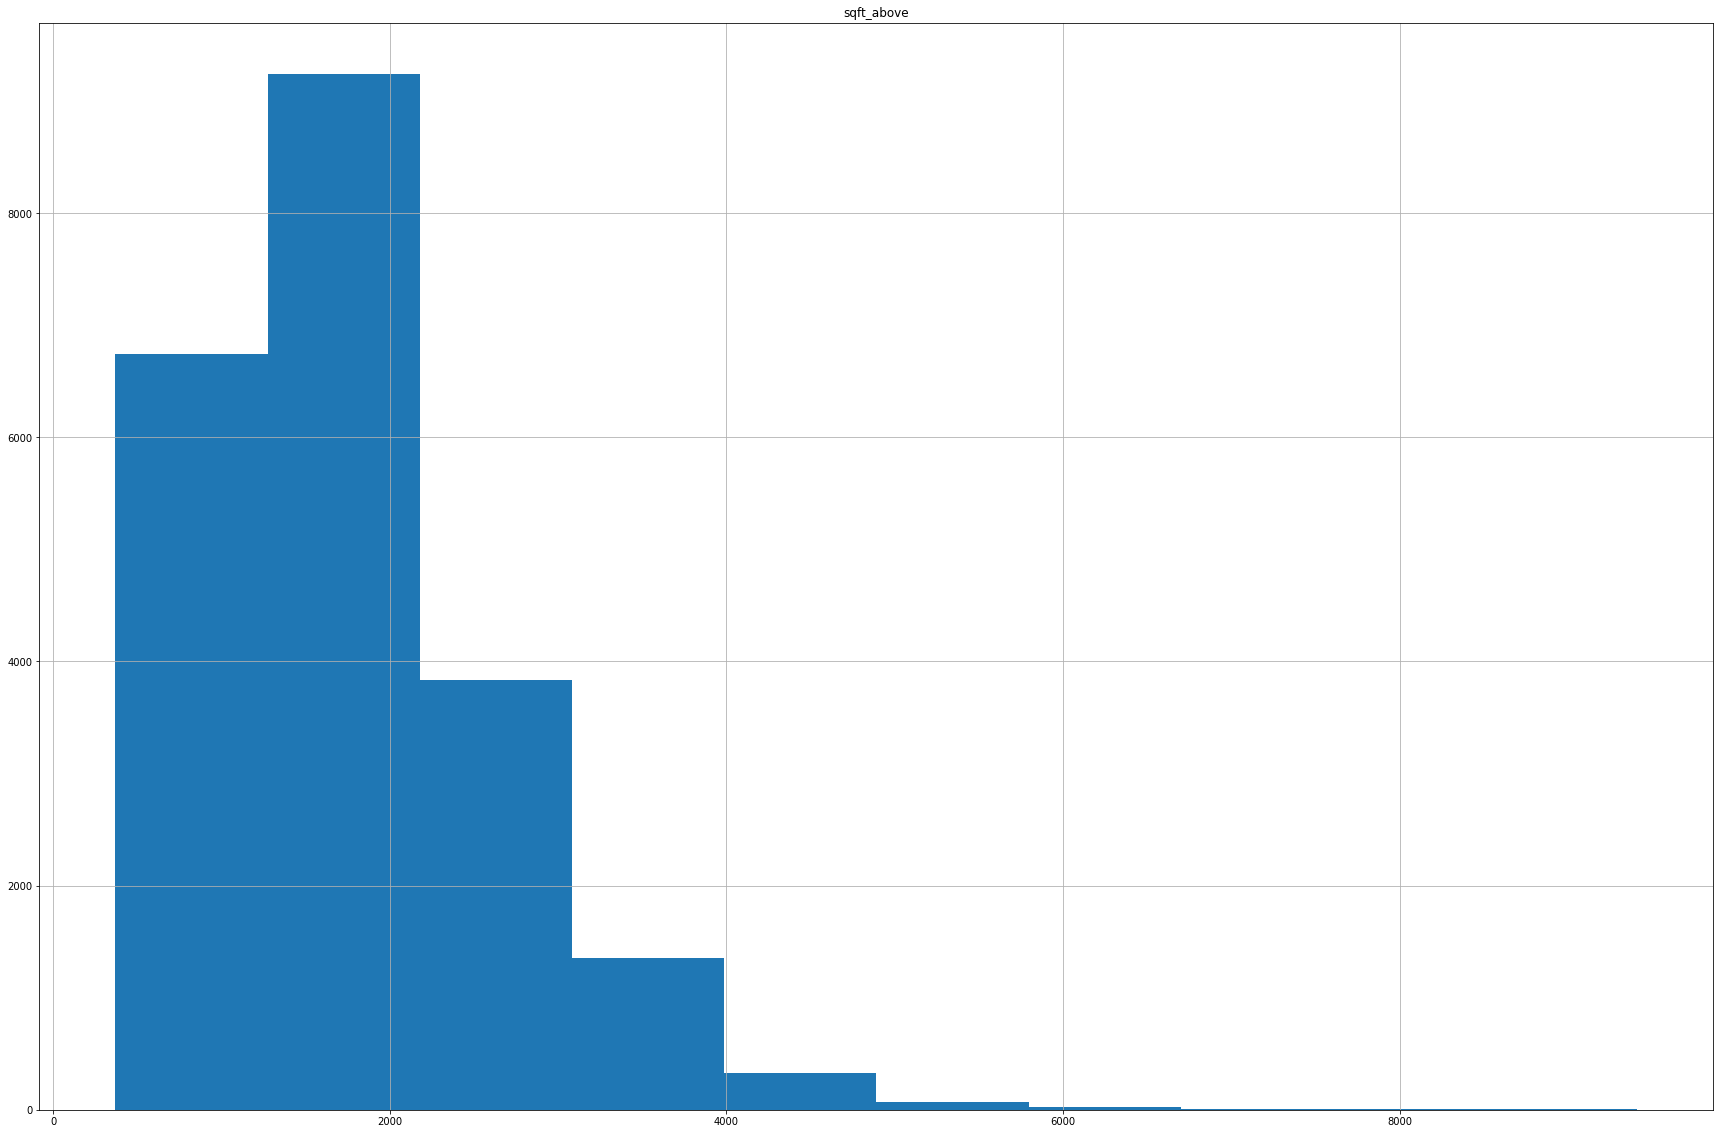

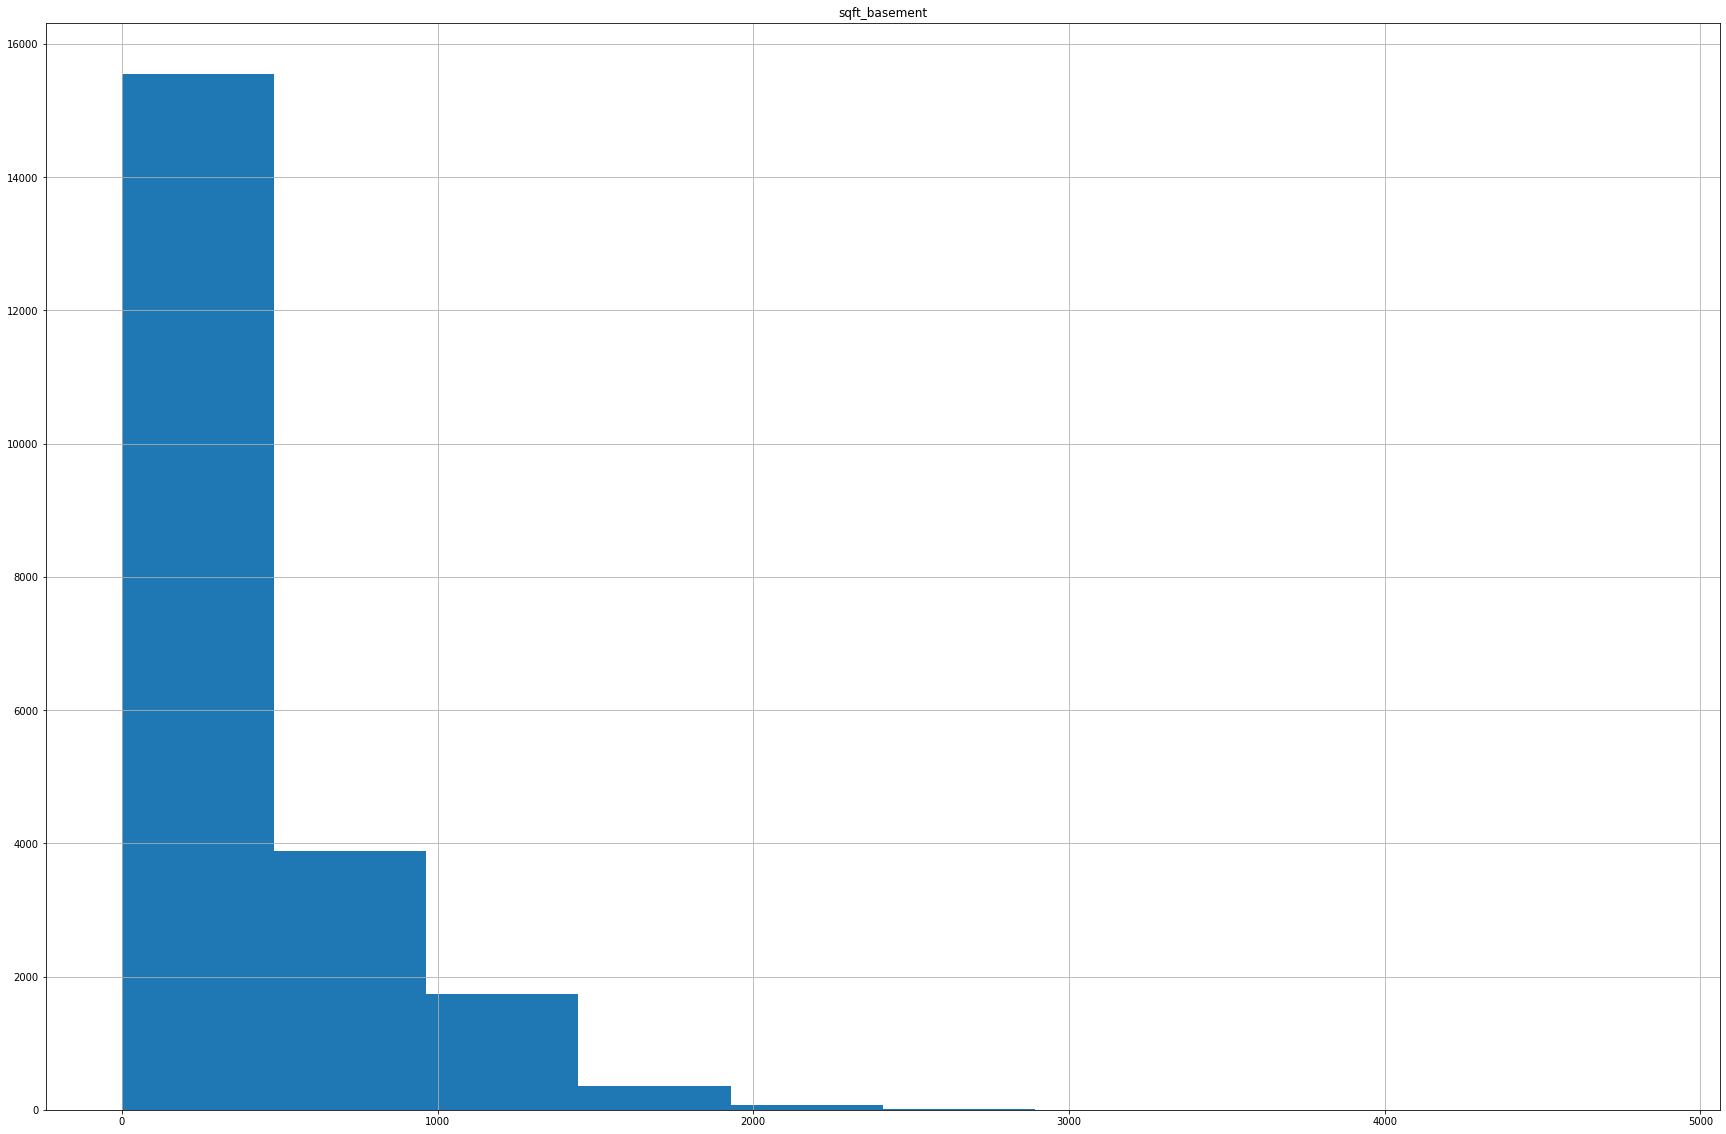

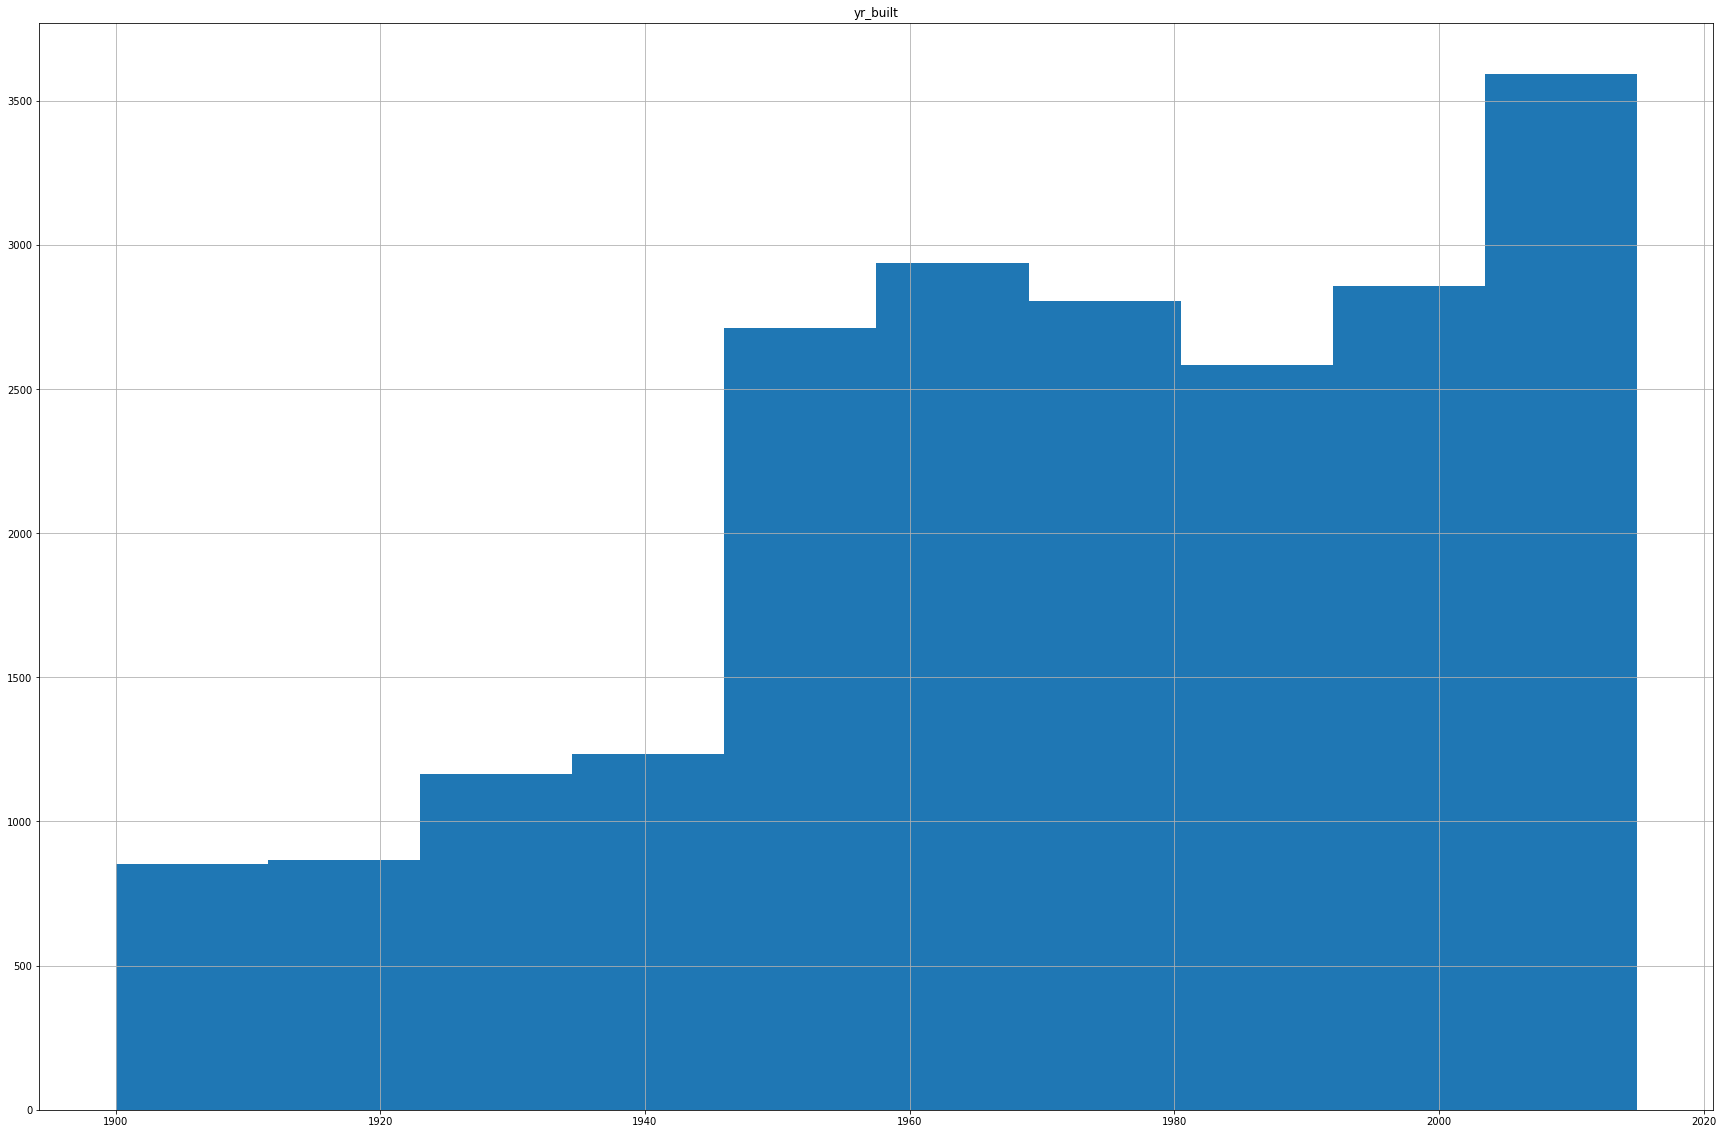

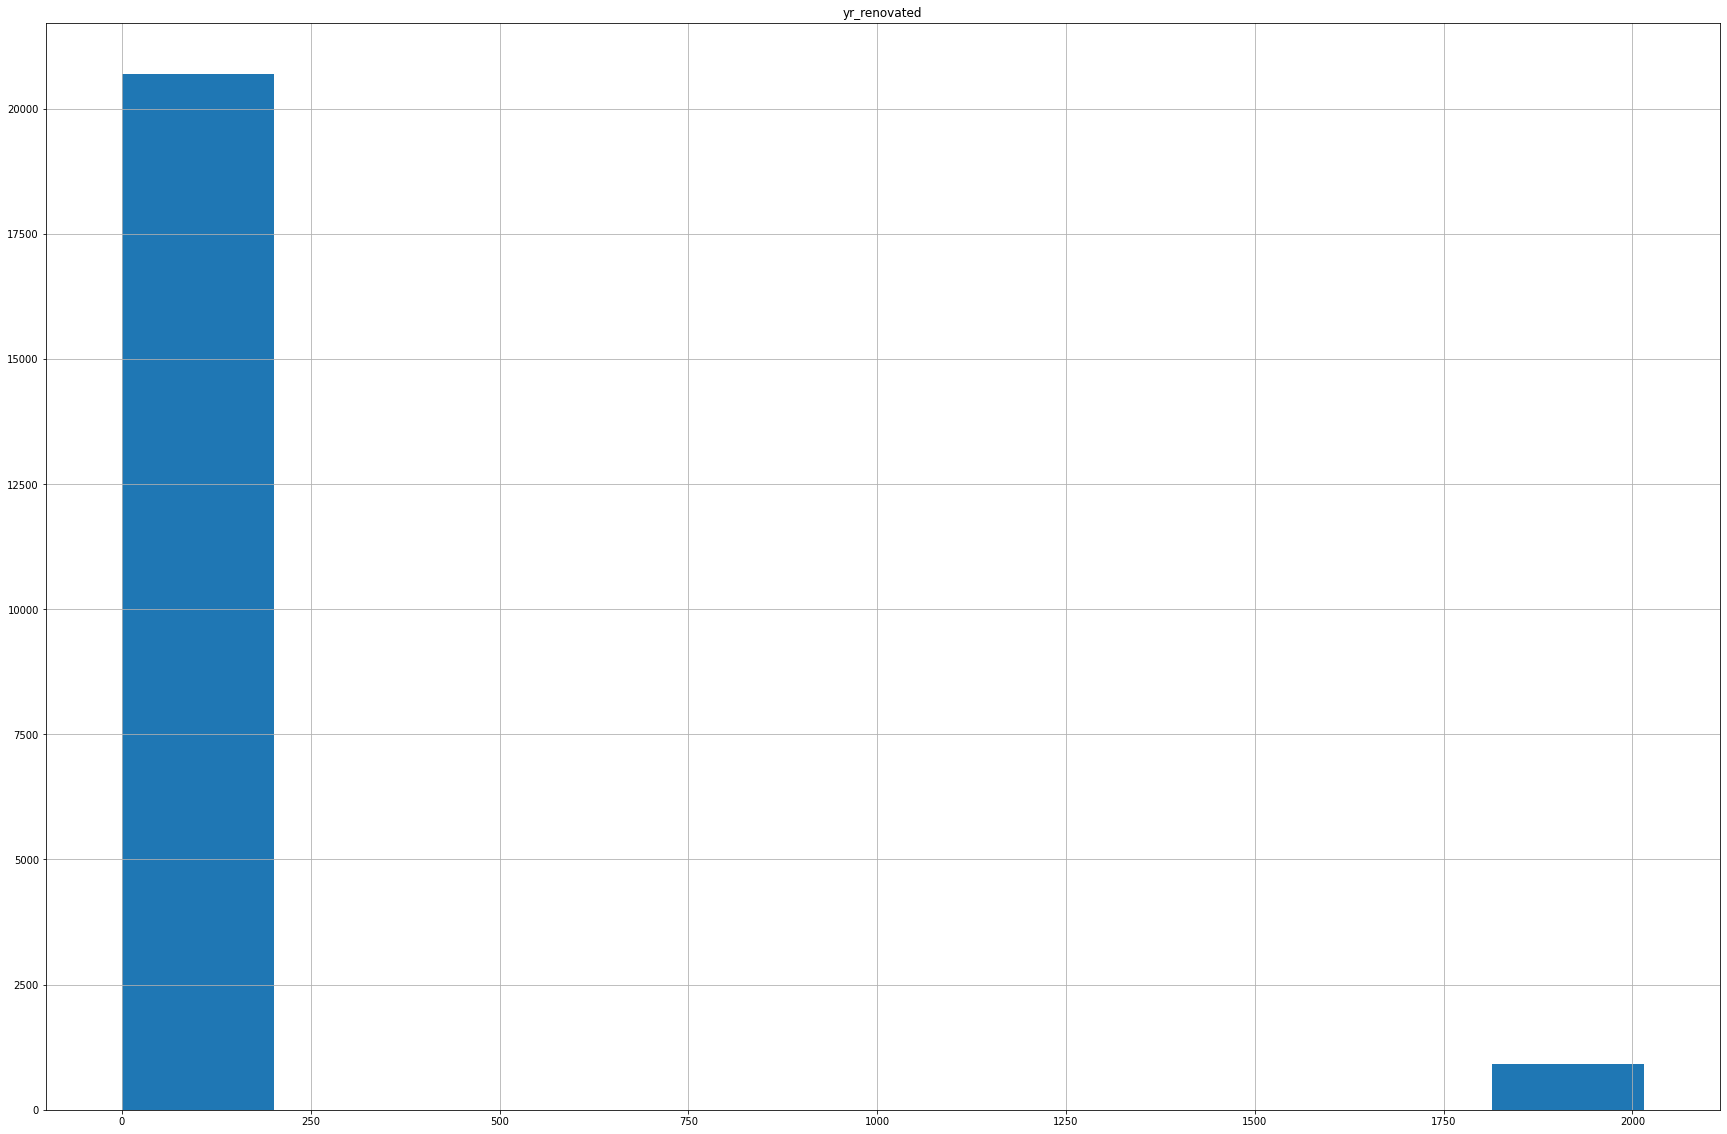

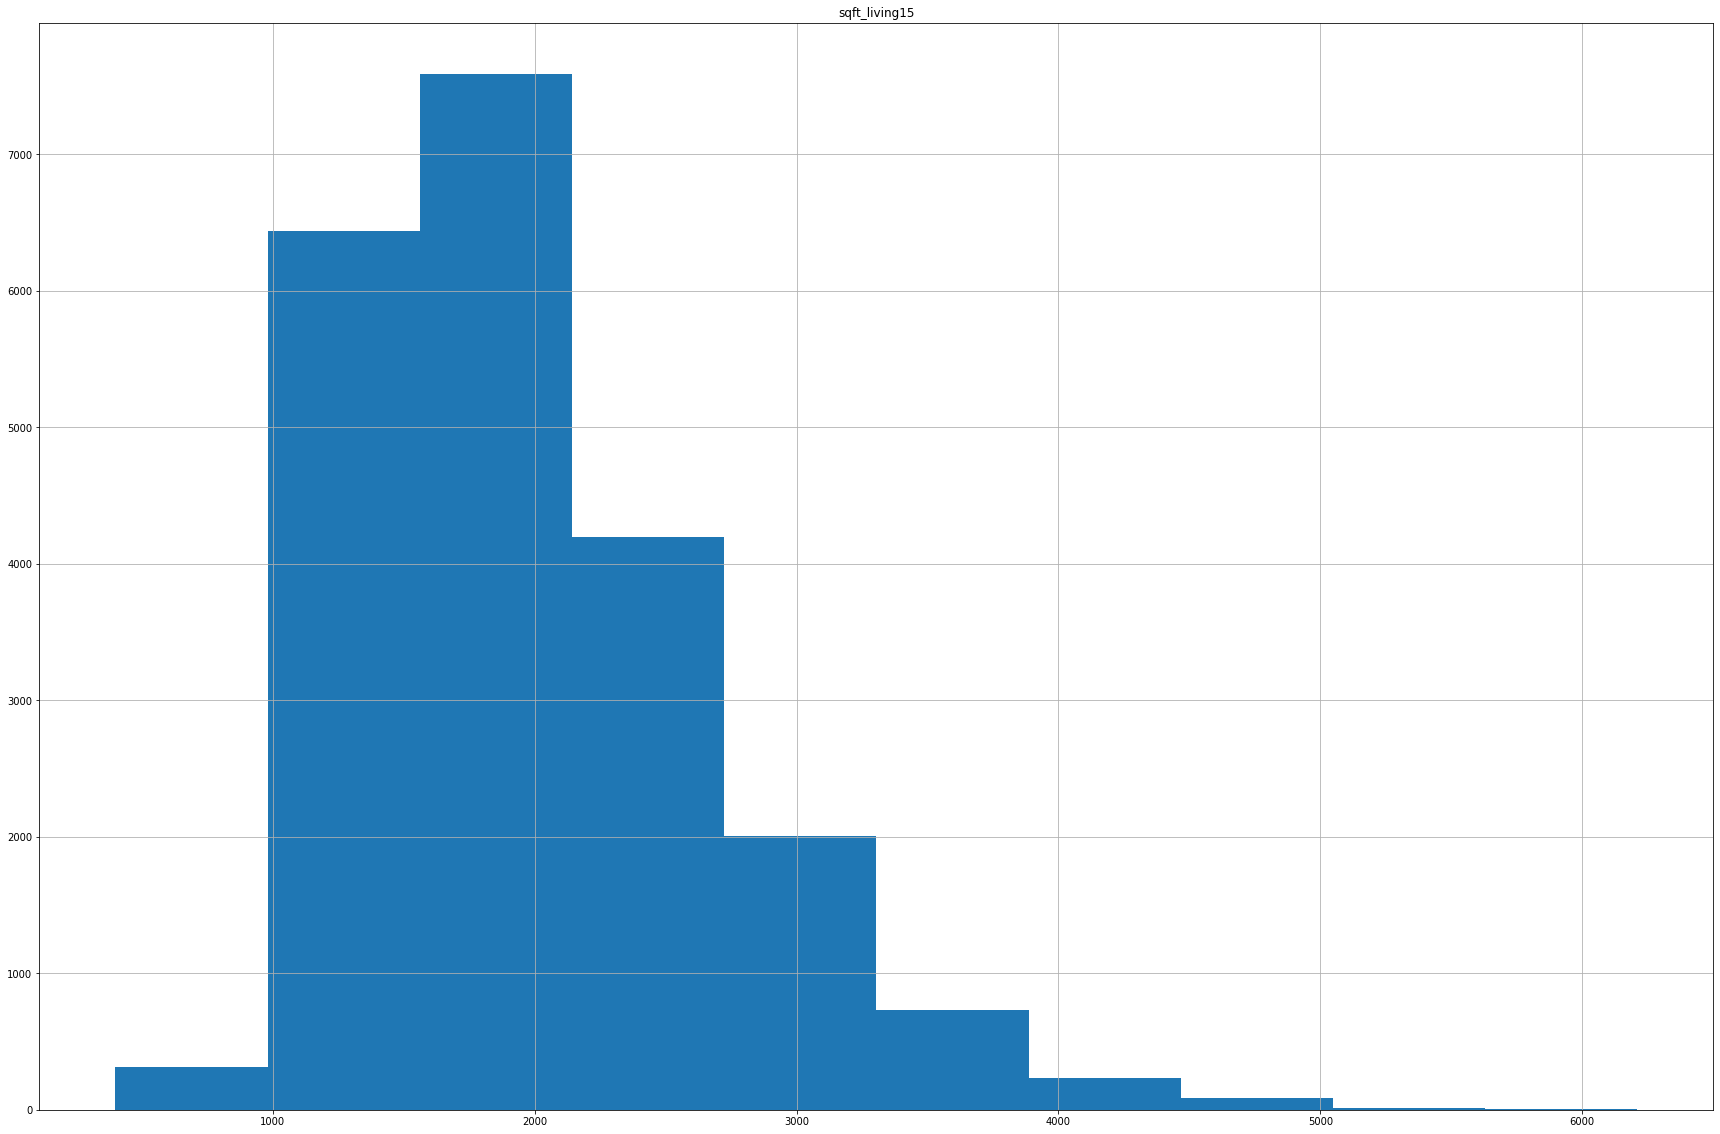

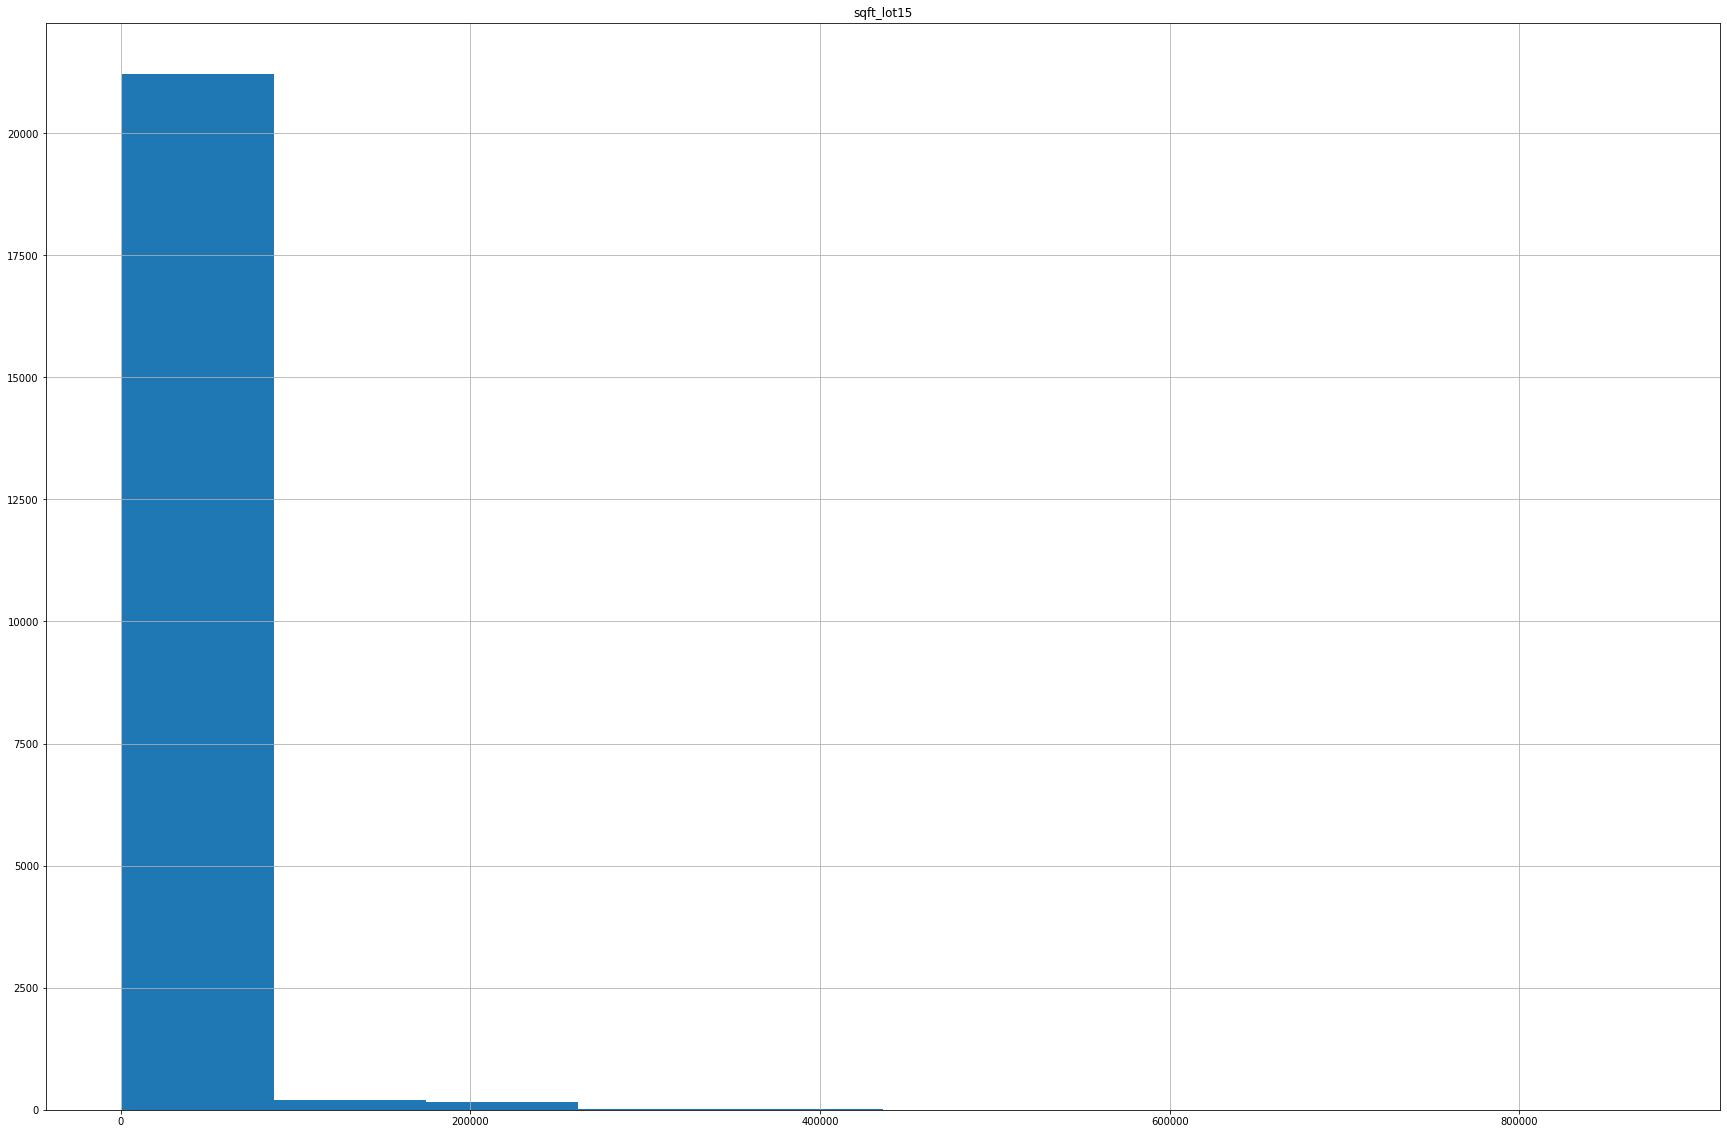

In [20]:
EDA_num(df, NUMcols)

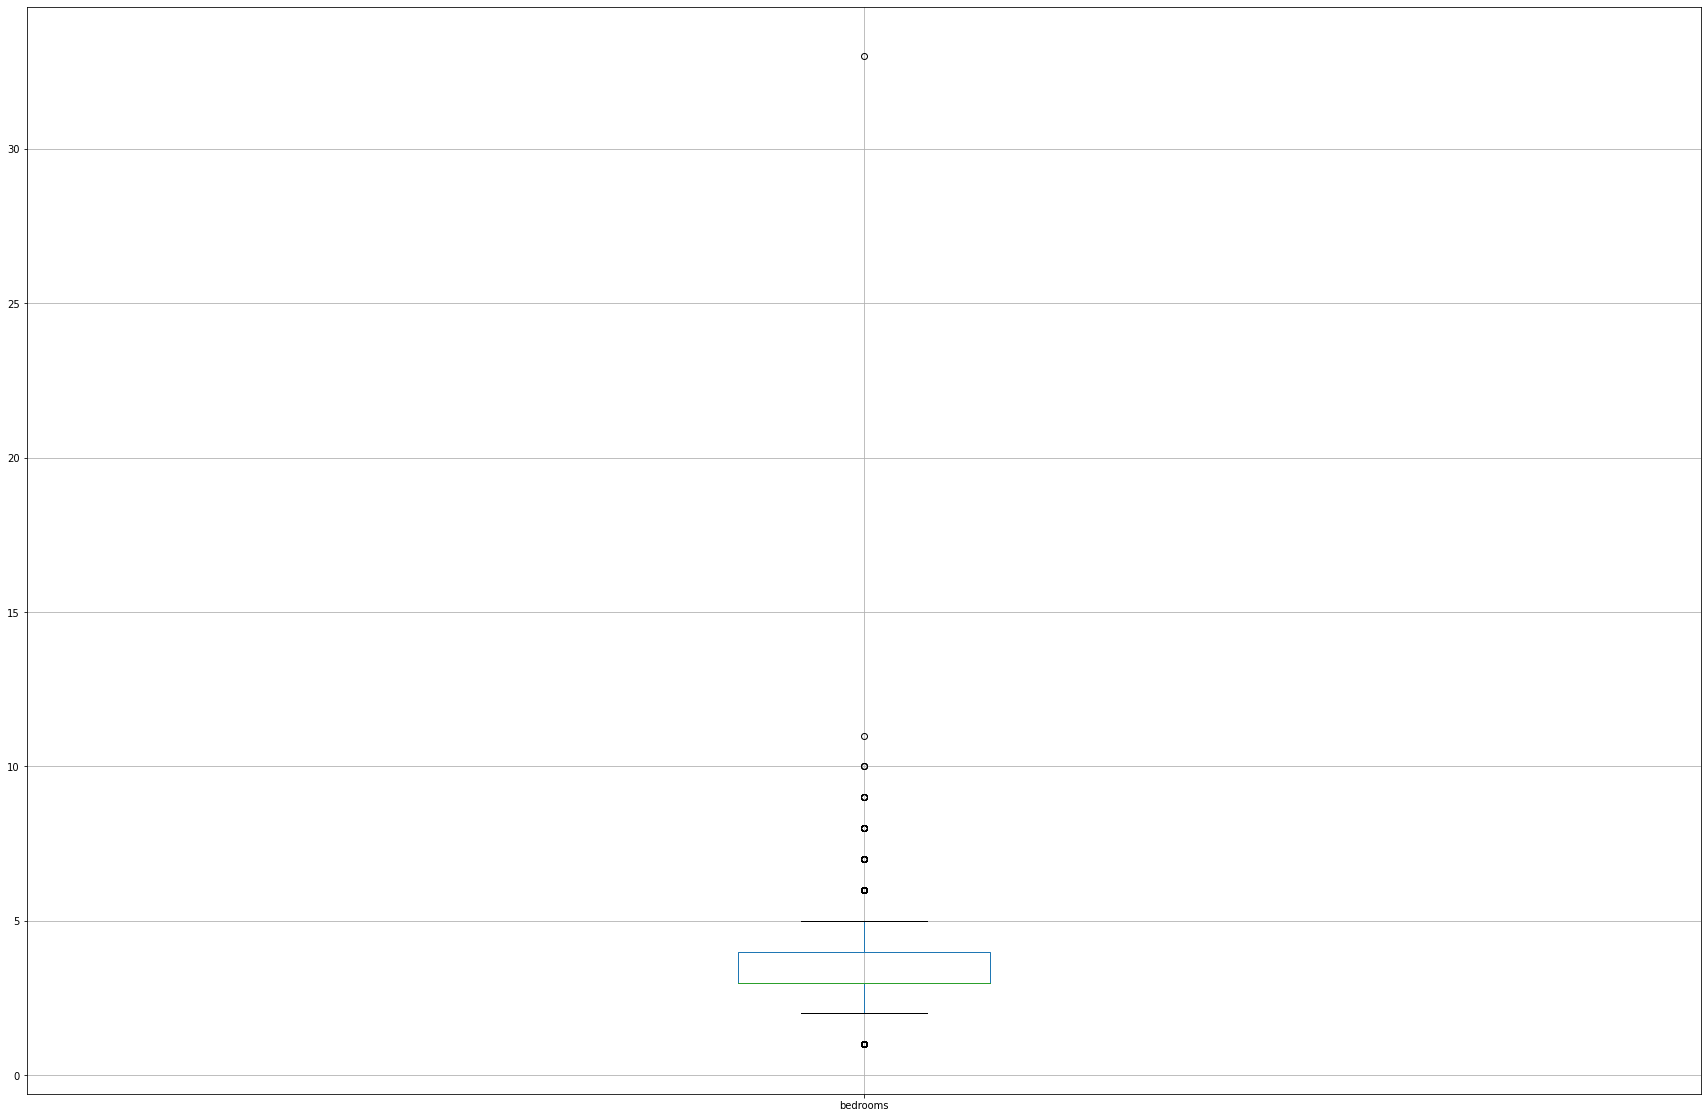

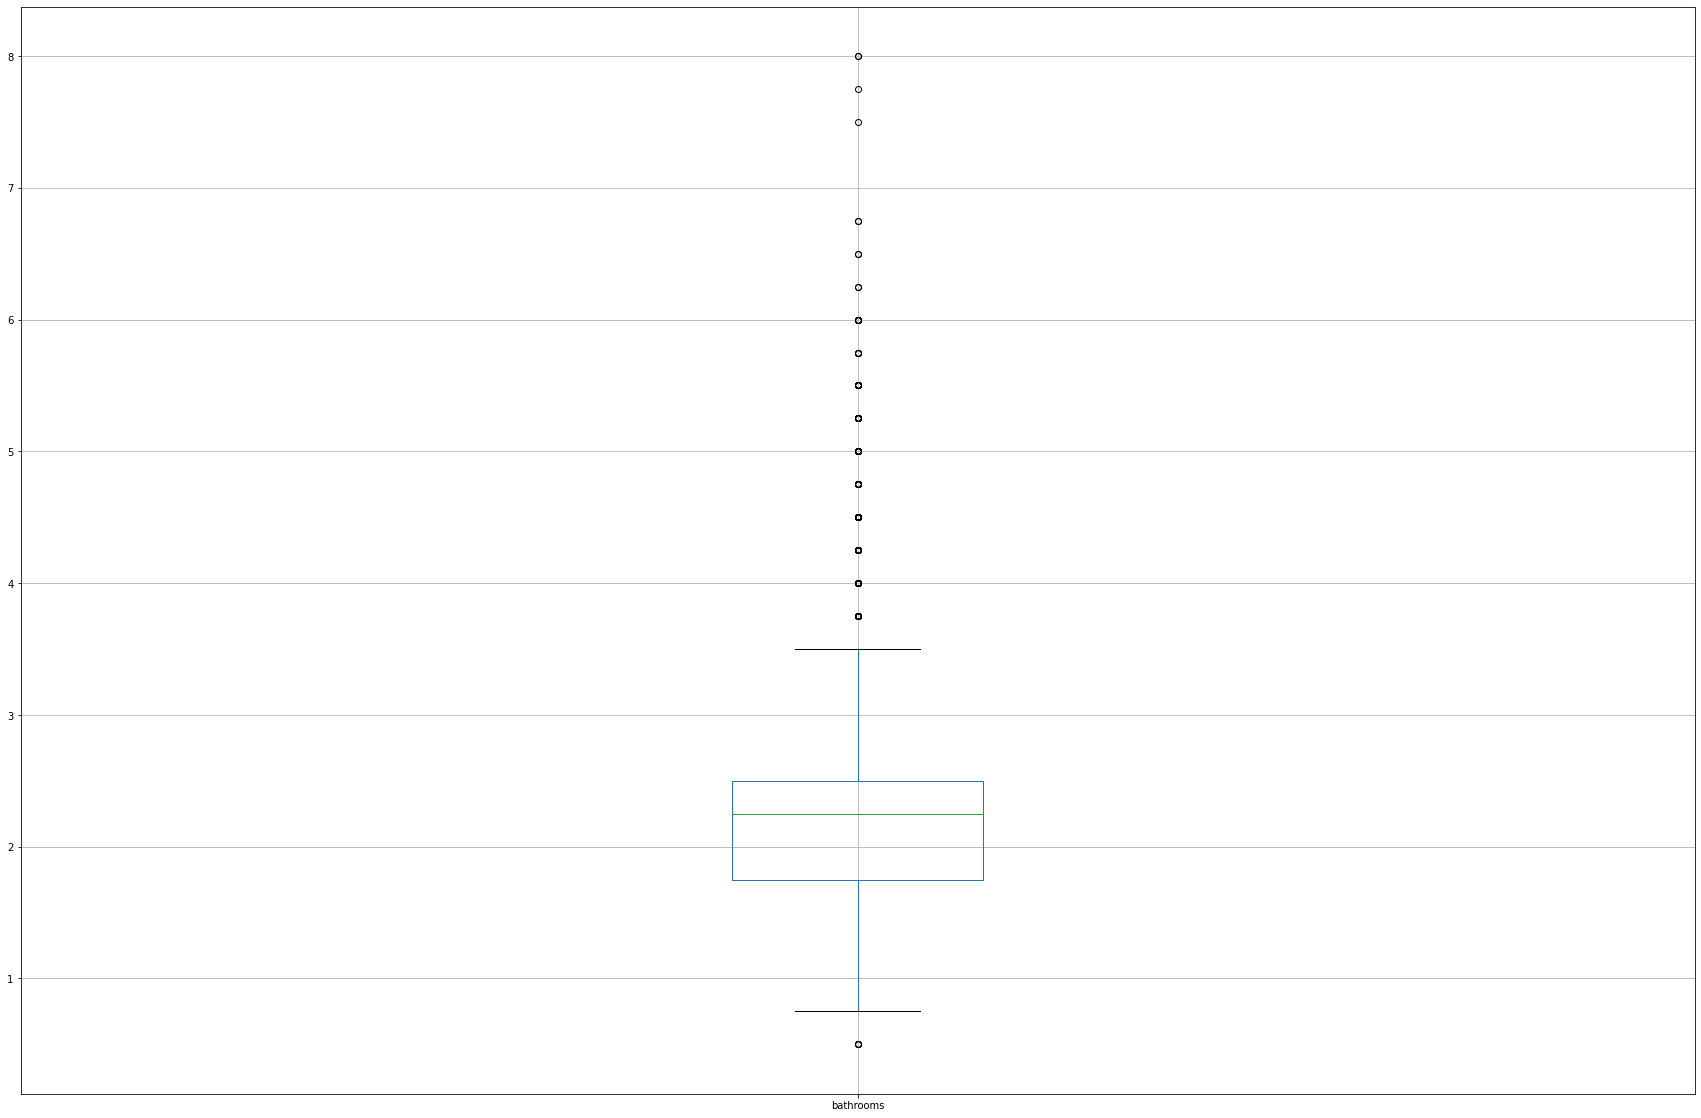

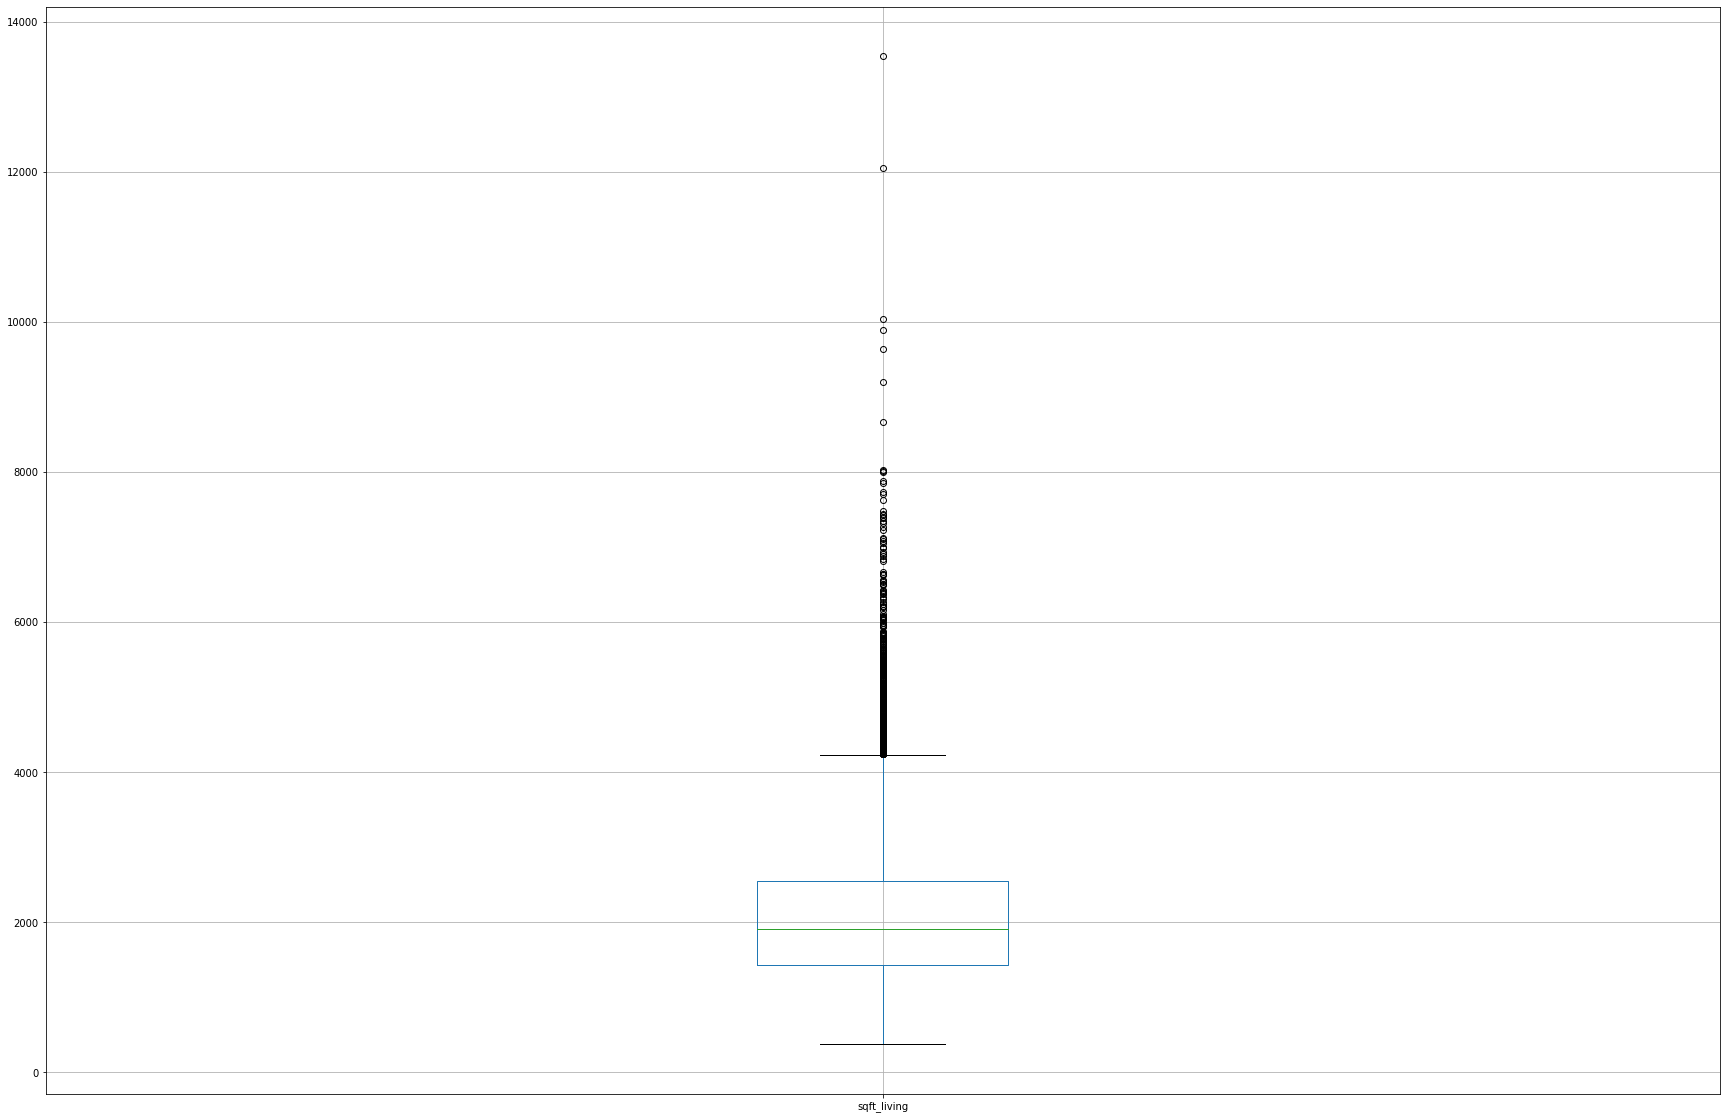

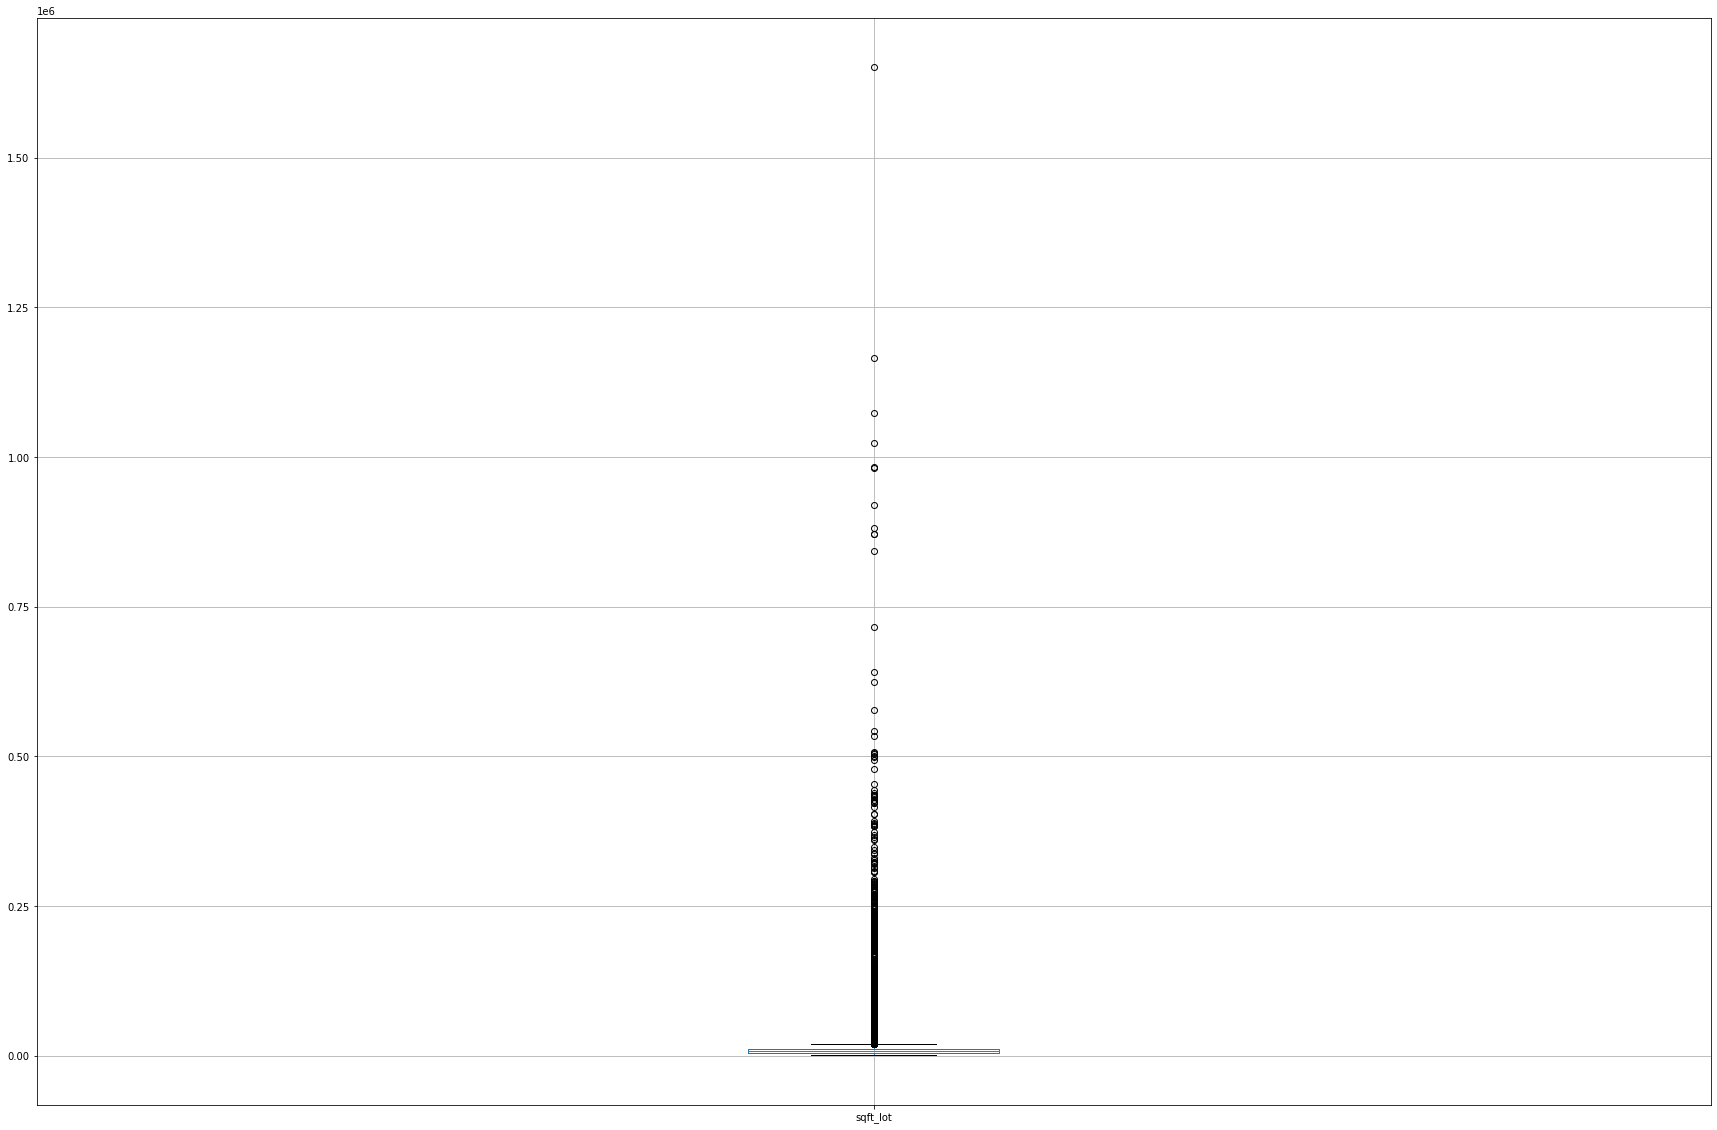

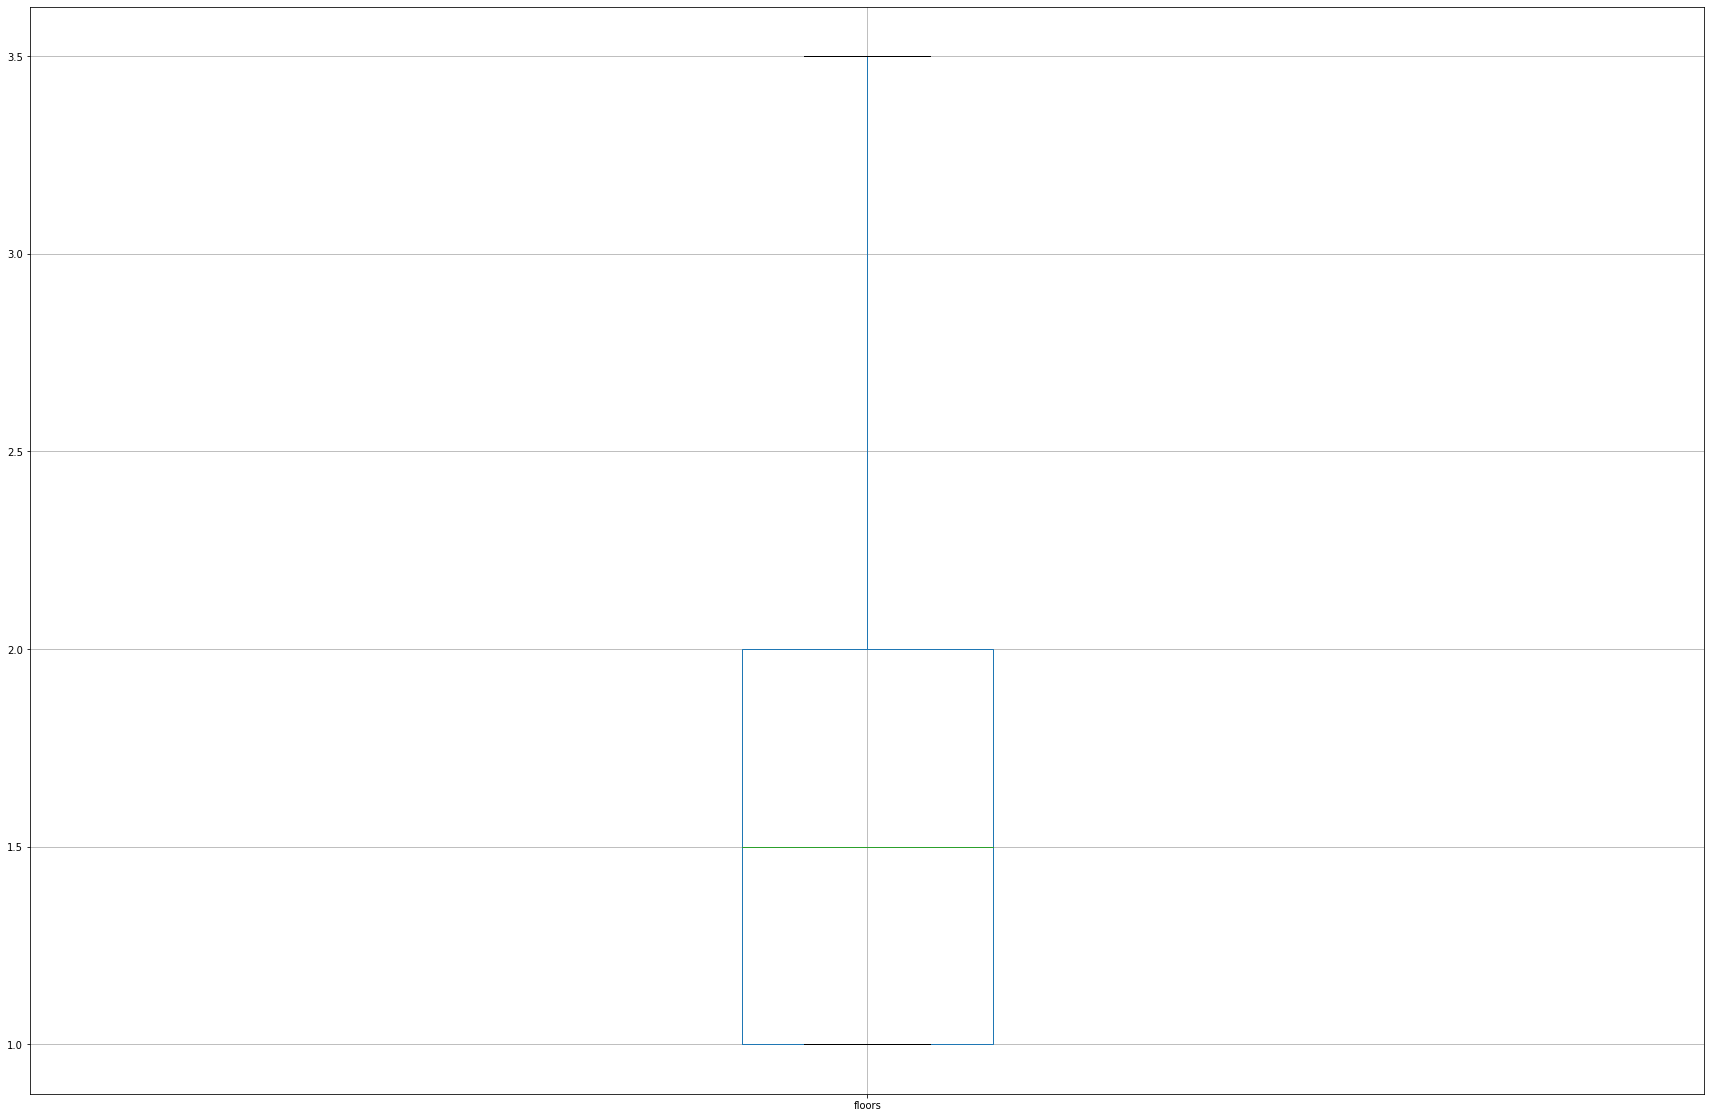

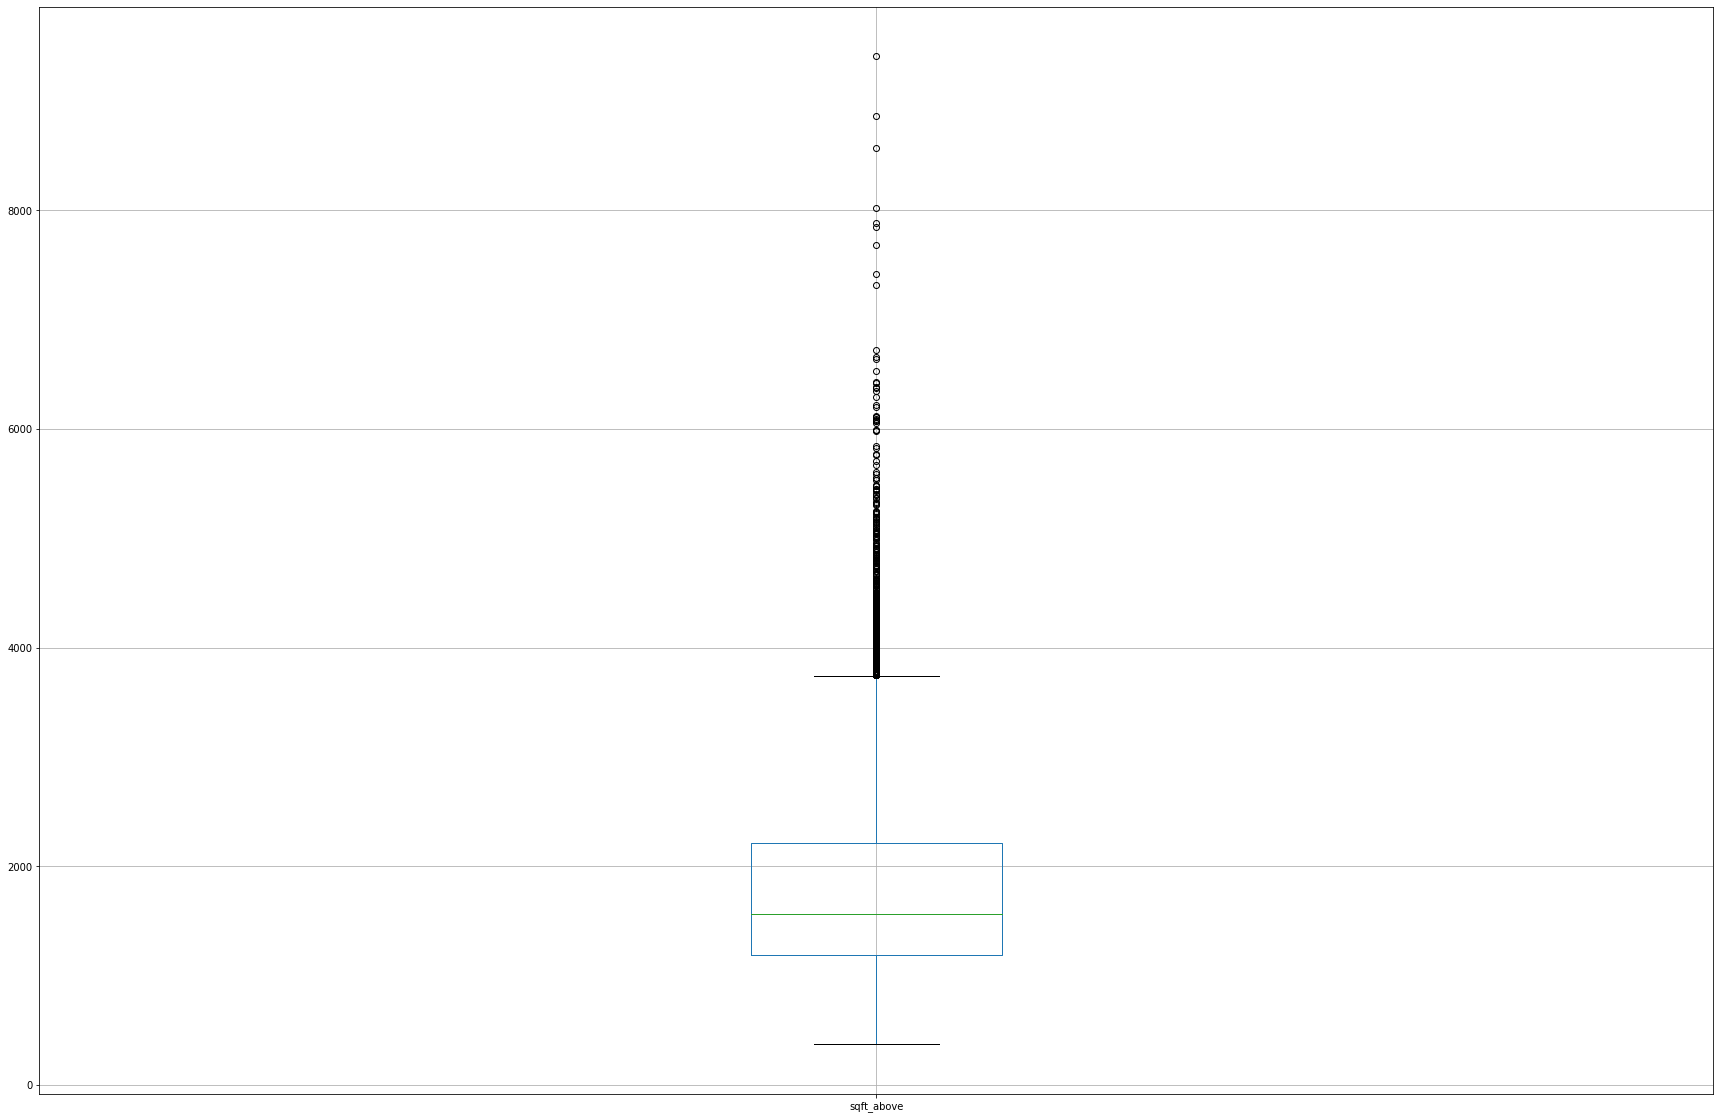

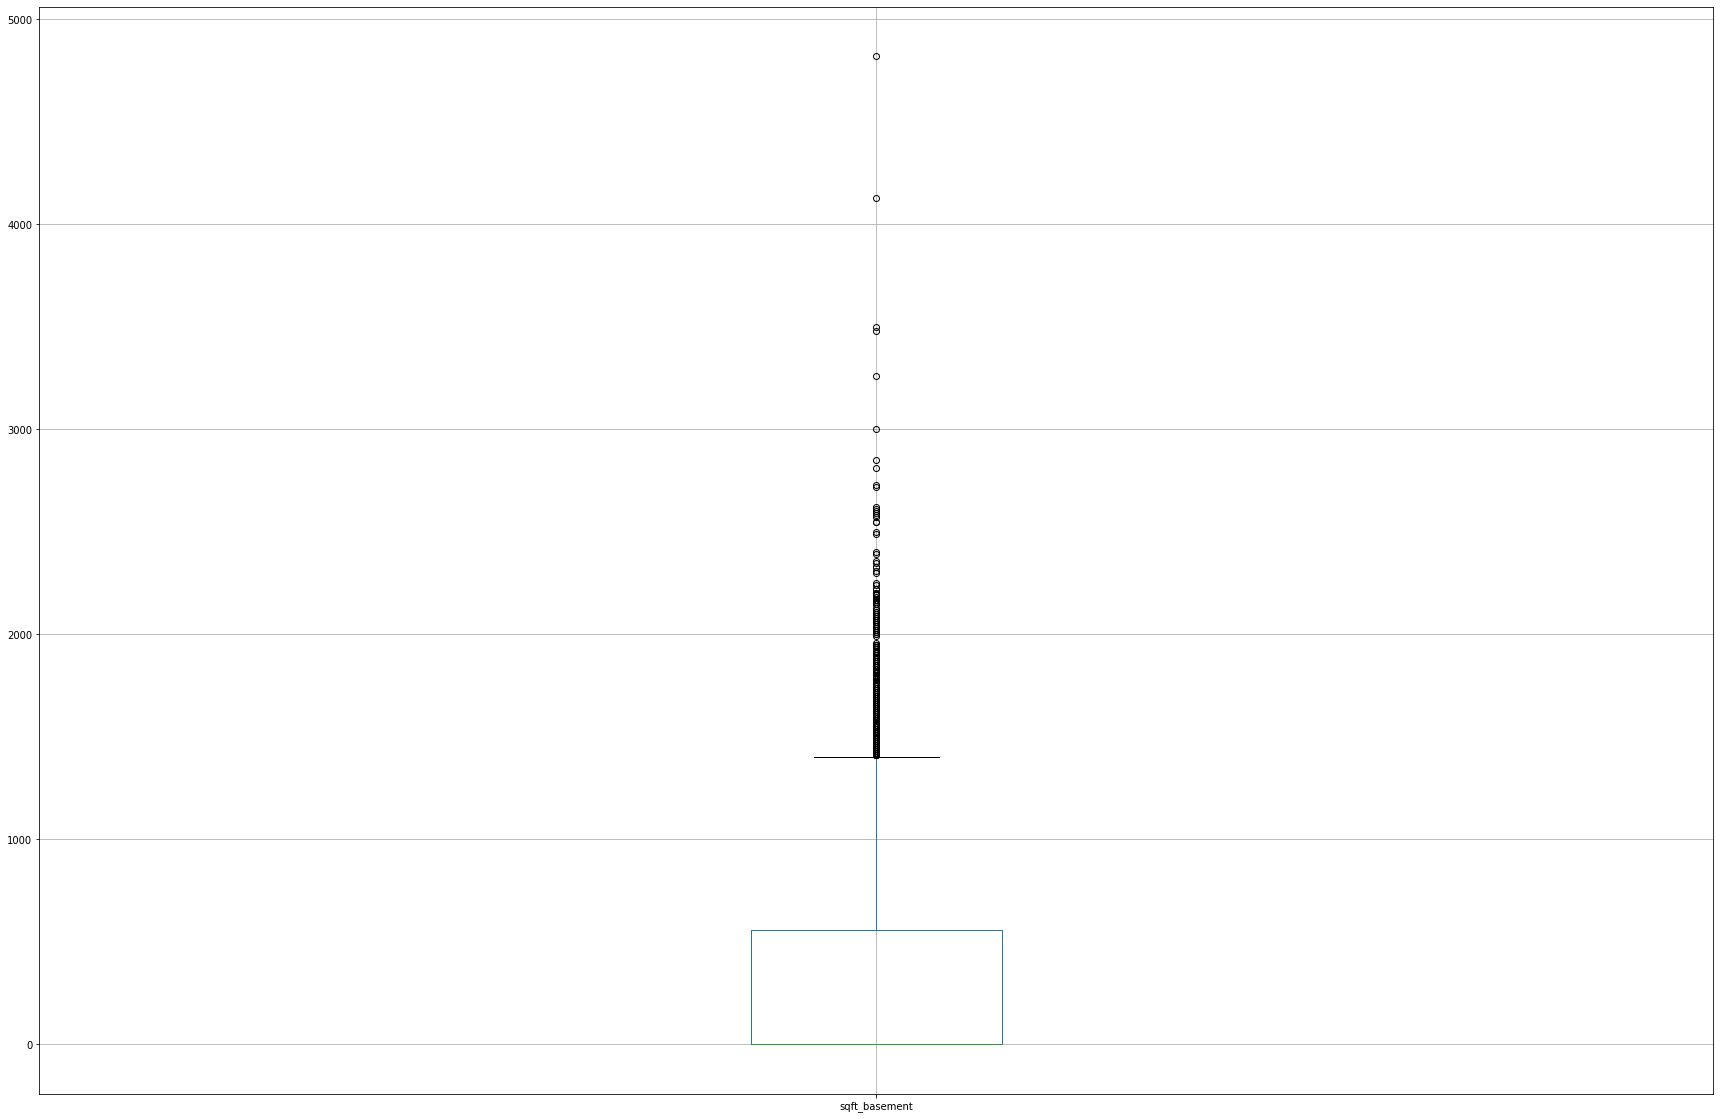

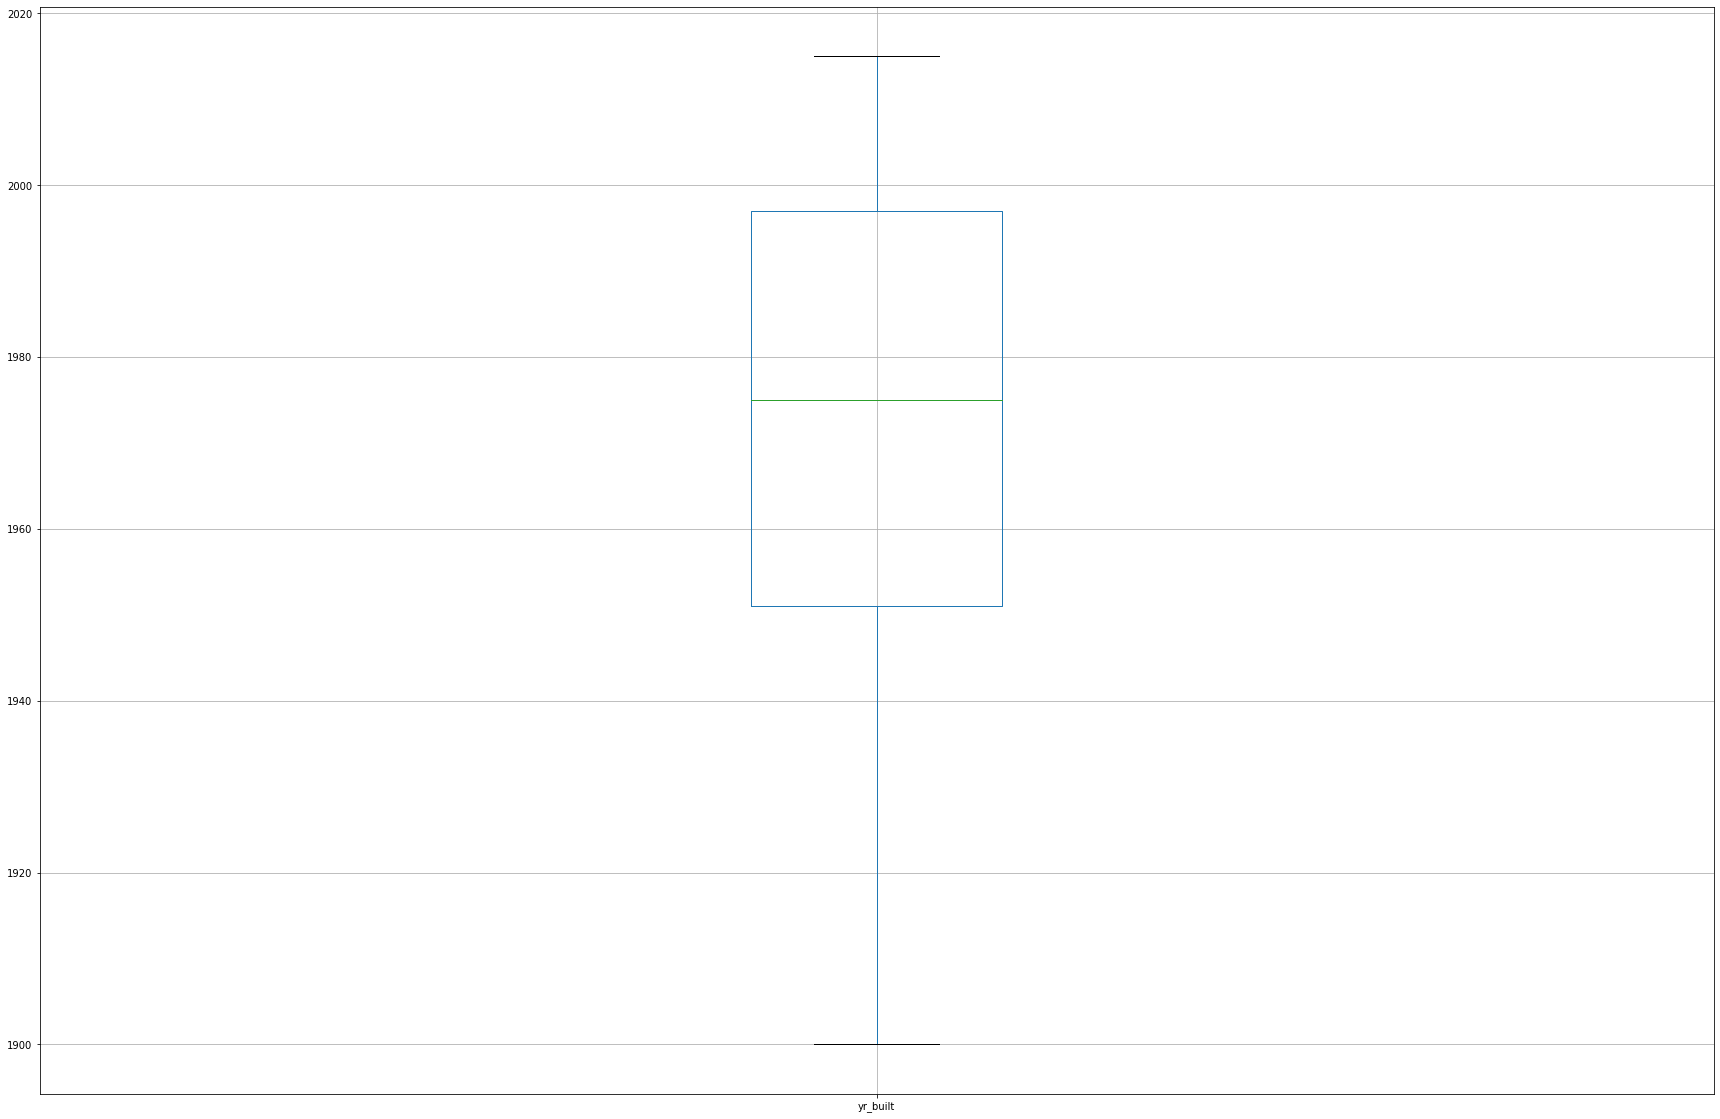

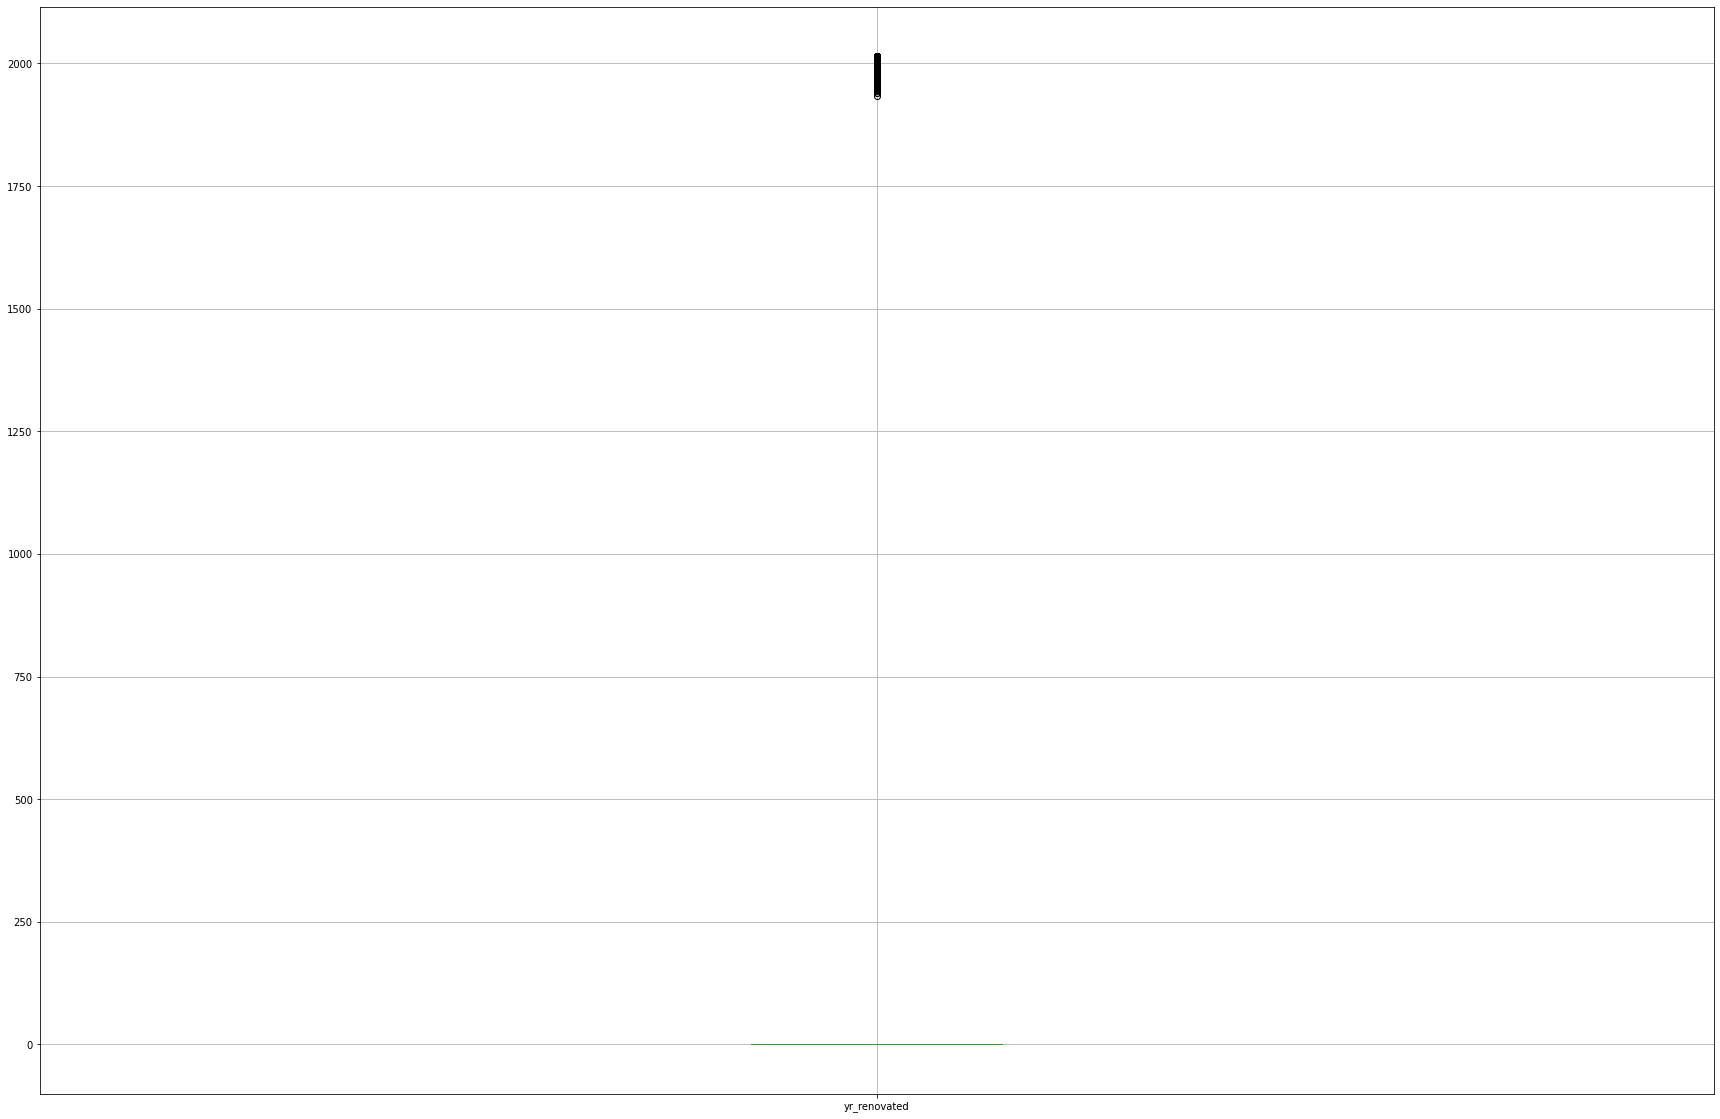

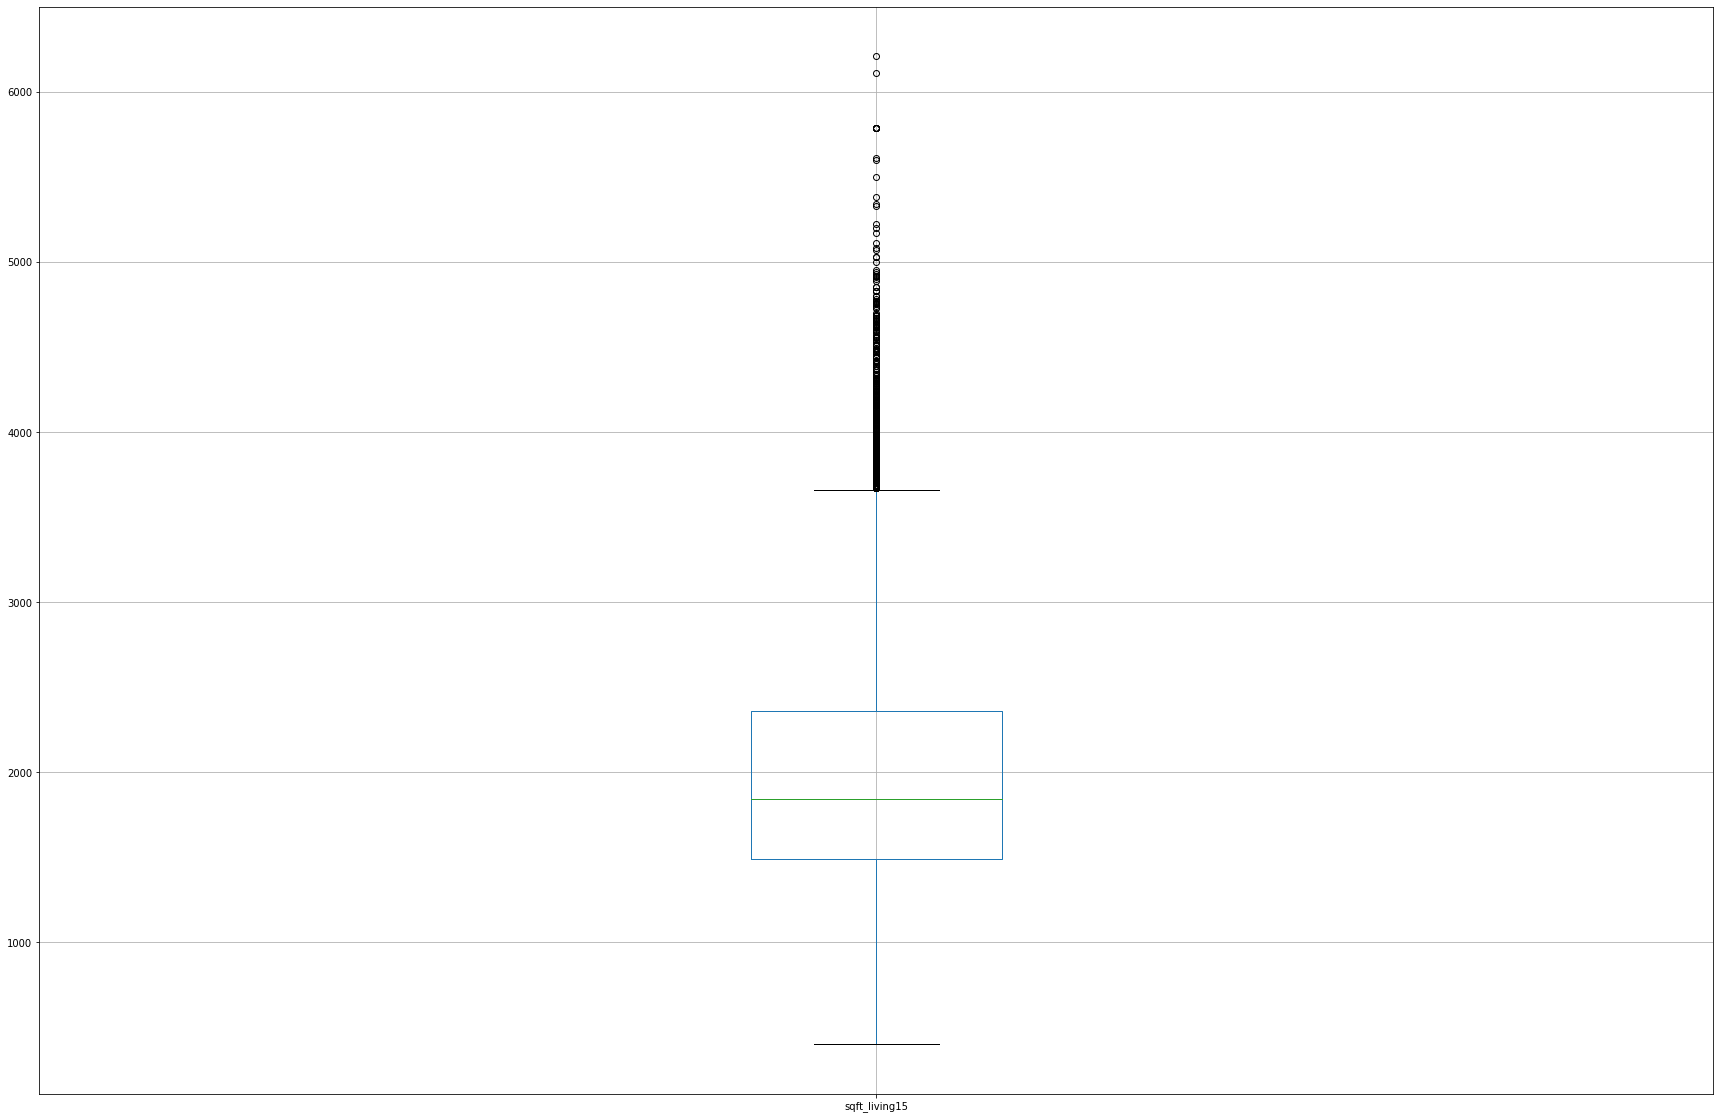

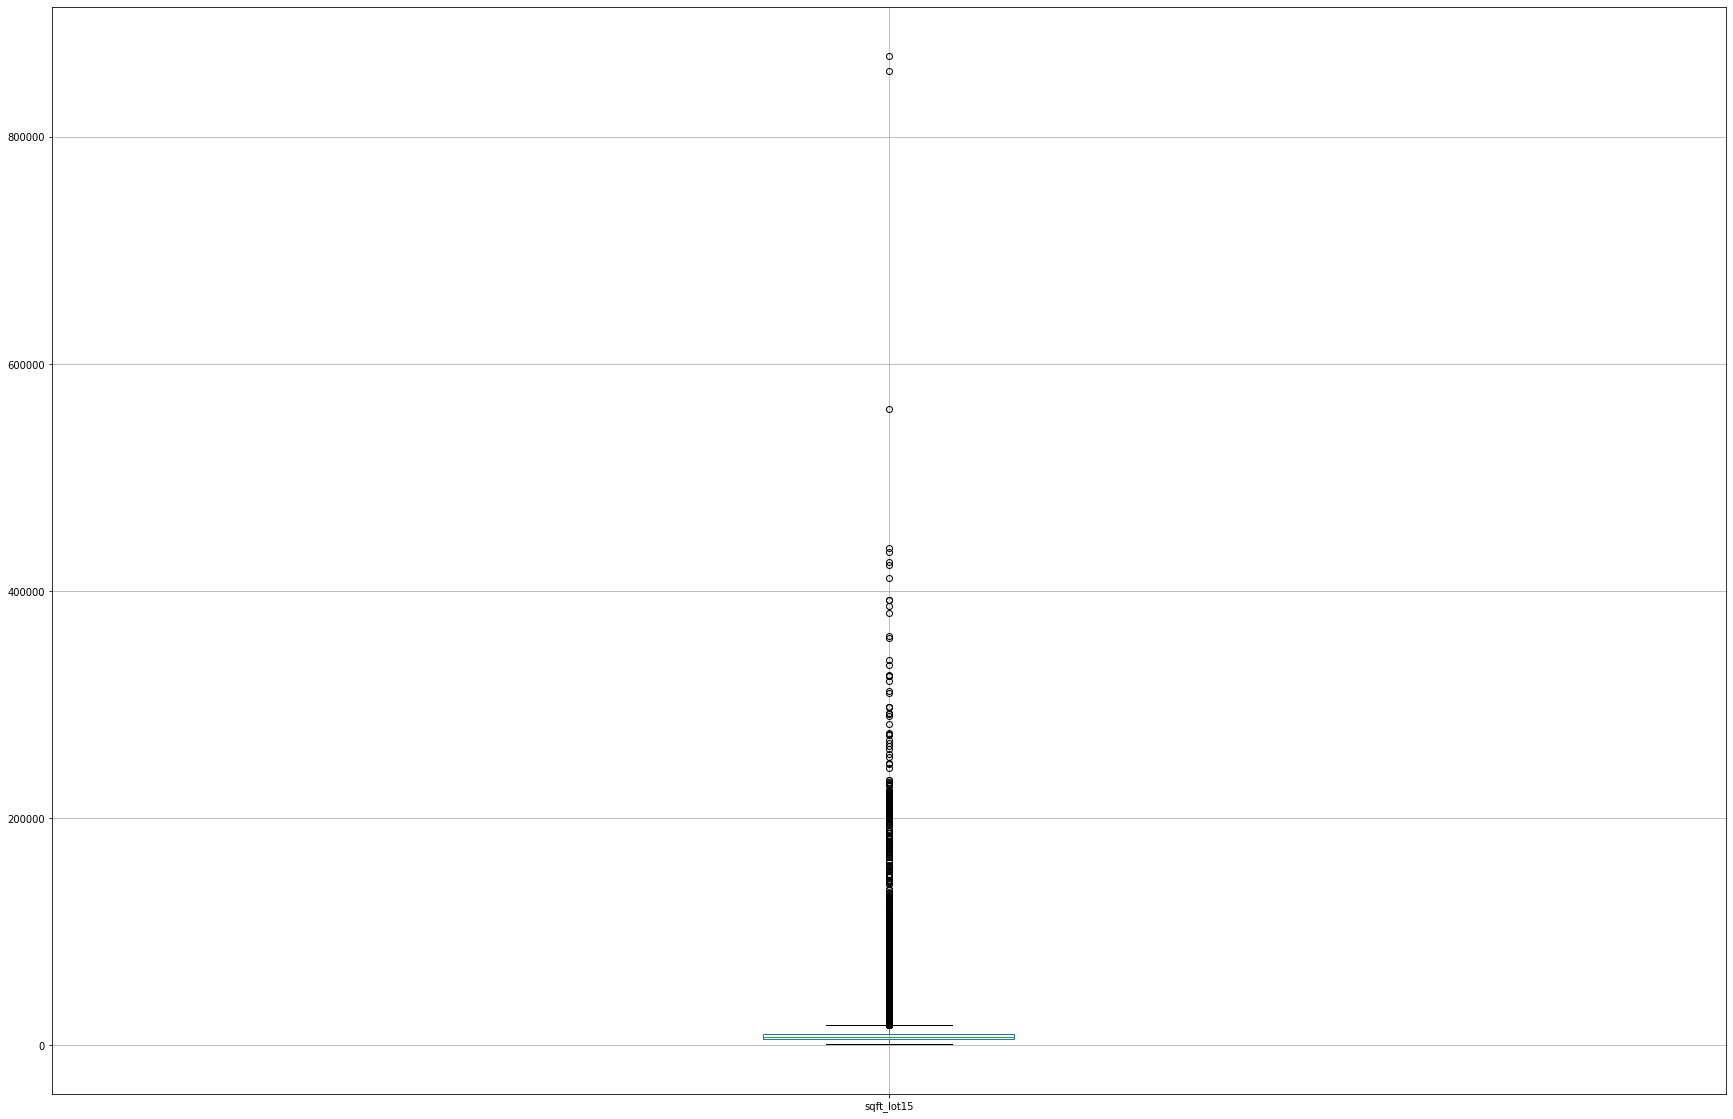

In [21]:
EDA_num_2(df, NUMcols)

# Data Transformation

In [22]:
if DT == 'StandardScaler' : 
    # StandardScaler
    df = NumStandardScaler(df)


Standardization Applied On: price

Standardization Applied On: bedrooms

Standardization Applied On: bathrooms

Standardization Applied On: sqft_living

Standardization Applied On: sqft_lot

Standardization Applied On: floors

Standardization Applied On: sqft_above

Standardization Applied On: sqft_basement

Standardization Applied On: yr_built

Standardization Applied On: yr_renovated

Standardization Applied On: sqft_living15

Standardization Applied On: sqft_lot15


In [23]:
pd.DataFrame(df.head())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,-0.867,-0.403,-1.451,-0.981,-0.228,-0.916,0,0,3,7,-0.735,-0.659,-0.545,-0.210,-0.944,-0.261
1,-0.006,-0.403,0.174,0.533,-0.190,0.937,0,0,3,7,0.461,0.245,-0.681,4.745,-0.433,-0.188
2,-0.981,-1.482,-1.451,-1.427,-0.123,-0.916,0,0,3,6,-1.231,-0.659,-1.294,-0.210,1.070,-0.172
3,0.174,0.677,1.150,-0.131,-0.244,-0.916,0,0,5,7,-0.892,1.397,-0.204,-0.210,-0.914,-0.284
4,-0.082,-0.403,-0.151,-0.436,-0.170,-0.916,0,0,3,8,-0.131,-0.659,0.545,-0.210,-0.272,-0.193


# Feature Engineering 

In [24]:
if FE == 'LableEncodeing':
    df = df.apply(lambda x: AllObjLabelEncoder(x))


Lable Encoding Applied On: waterfront
New Value for waterfront  Variable: [0 1]
Old Value for waterfront Variable: ['0' '1']

Lable Encoding Applied On: view
New Value for view  Variable: [0 1 2 3 4]
Old Value for view Variable: ['0' '1' '2' '3' '4']

Lable Encoding Applied On: condition
New Value for condition  Variable: [0 1 2 3 4]
Old Value for condition Variable: ['1' '2' '3' '4' '5']

Lable Encoding Applied On: grade
New Value for grade  Variable: [ 0  1  2  3  4  5  6  7  8  9 10]
Old Value for grade Variable: ['10' '11' '12' '13' '3' '4' '5' '6' '7' '8' '9']


In [25]:
pd.DataFrame(df.head())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,-0.867,-0.403,-1.451,-0.981,-0.228,-0.916,0,0,2,8,-0.735,-0.659,-0.545,-0.210,-0.944,-0.261
1,-0.006,-0.403,0.174,0.533,-0.190,0.937,0,0,2,8,0.461,0.245,-0.681,4.745,-0.433,-0.188
2,-0.981,-1.482,-1.451,-1.427,-0.123,-0.916,0,0,2,7,-1.231,-0.659,-1.294,-0.210,1.070,-0.172
3,0.174,0.677,1.150,-0.131,-0.244,-0.916,0,0,4,8,-0.892,1.397,-0.204,-0.210,-0.914,-0.284
4,-0.082,-0.403,-0.151,-0.436,-0.170,-0.916,0,0,2,9,-0.131,-0.659,0.545,-0.210,-0.272,-0.193


# Feature Selection

In [26]:
fs = None

if FS == 'Forward':
    df, fs = Feature_selection_BackWard(df, target)

In [27]:
pd.DataFrame(fs)

""


In [28]:
pd.DataFrame(df.head())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,-0.867,-0.403,-1.451,-0.981,-0.228,-0.916,0,0,2,8,-0.735,-0.659,-0.545,-0.210,-0.944,-0.261
1,-0.006,-0.403,0.174,0.533,-0.190,0.937,0,0,2,8,0.461,0.245,-0.681,4.745,-0.433,-0.188
2,-0.981,-1.482,-1.451,-1.427,-0.123,-0.916,0,0,2,7,-1.231,-0.659,-1.294,-0.210,1.070,-0.172
3,0.174,0.677,1.150,-0.131,-0.244,-0.916,0,0,4,8,-0.892,1.397,-0.204,-0.210,-0.914,-0.284
4,-0.082,-0.403,-0.151,-0.436,-0.170,-0.916,0,0,2,9,-0.131,-0.659,0.545,-0.210,-0.272,-0.193


# Statistics Analytics

## Correlation between Independent Dependent Variables and Dependent Variables

In [29]:
pd.DataFrame(df.corr()[target].sort_values(ascending = False).reset_index())

,index,price
0,price,1.000
1,sqft_living,0.702
2,sqft_above,0.605
3,sqft_living15,0.585
4,bathrooms,0.526
5,view,0.397
6,sqft_basement,0.324
7,bedrooms,0.309
8,waterfront,0.266
9,floors,0.257


## Correlation between all the Variables

In [30]:
pd.DataFrame(df.corr())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000,0.309,0.526,0.702,0.090,0.257,0.266,0.397,0.036,-0.366,0.605,0.324,0.054,0.126,0.585,0.083
bedrooms,0.309,1.000,0.515,0.578,0.032,0.178,-0.007,0.080,0.026,-0.062,0.479,0.303,0.156,0.018,0.393,0.031
bathrooms,0.526,0.515,1.000,0.756,0.088,0.503,0.064,0.188,-0.126,-0.170,0.687,0.283,0.507,0.051,0.570,0.088
sqft_living,0.702,0.578,0.756,1.000,0.173,0.354,0.104,0.285,-0.059,-0.317,0.876,0.435,0.318,0.055,0.756,0.184
sqft_lot,0.090,0.032,0.088,0.173,1.000,-0.005,0.022,0.075,-0.009,-0.090,0.184,0.015,0.053,0.008,0.145,0.718
floors,0.257,0.178,0.503,0.354,-0.005,1.000,0.024,0.029,-0.264,-0.047,0.524,-0.246,0.489,0.006,0.280,-0.011
waterfront,0.266,-0.007,0.064,0.104,0.022,0.024,1.000,0.402,0.017,-0.077,0.072,0.081,-0.026,0.093,0.087,0.031
view,0.397,0.080,0.188,0.285,0.075,0.029,0.402,1.000,0.046,-0.143,0.168,0.277,-0.054,0.104,0.281,0.073
condition,0.036,0.026,-0.126,-0.059,-0.009,-0.264,0.017,0.046,1.000,0.030,-0.159,0.174,-0.362,-0.061,-0.093,-0.003
grade,-0.366,-0.062,-0.170,-0.317,-0.090,-0.047,-0.077,-0.143,0.030,1.000,-0.318,-0.062,-0.009,0.005,-0.285,-0.086


In [31]:
df.corr().style.background_gradient(cmap="Blues") # YlOrBr Greys GnBu

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308794,0.525905,0.701909,0.089882,0.256814,0.266437,0.397318,0.036025,-0.366319,0.605371,0.323776,0.053984,0.126415,0.585247,0.082837
bedrooms,0.308794,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,-0.061553,0.479386,0.302808,0.155670,0.018389,0.393406,0.030690
bathrooms,0.525905,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,-0.170167,0.686668,0.283440,0.507173,0.050544,0.569884,0.088303
sqft_living,0.701909,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,-0.316768,0.876448,0.435130,0.318152,0.055308,0.756402,0.184342
sqft_lot,0.089882,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,-0.090127,0.184139,0.015418,0.052946,0.007686,0.144763,0.718204
floors,0.256814,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,-0.047015,0.523989,-0.245715,0.489193,0.006427,0.280102,-0.010722
waterfront,0.266437,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,-0.076929,0.072109,0.080559,-0.026153,0.092873,0.086507,0.030781
view,0.397318,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,-0.142863,0.167609,0.277078,-0.053636,0.103951,0.280681,0.072904
condition,0.036025,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,0.029531,-0.158904,0.173849,-0.361592,-0.060788,-0.093072,-0.003126
grade,-0.366319,-0.061553,-0.170167,-0.316768,-0.090127,-0.047015,-0.076929,-0.142863,0.029531,1.000000,-0.318437,-0.061532,-0.008806,0.005123,-0.284532,-0.086009


# Data Splitting 

In [32]:
X = df.drop(target, axis=1)
y = df[target]

if Random == 'Enable': 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=Split_size, random_state=Randon_state_size)

print('X_train Rows size: ', X_train.shape[0])
print('X_train Columns size: ', X_train.shape[1])
print('\ny_train Rows size: ', y_train.shape[0])
print('\nX_test Rows size: ', X_test.shape[0])
print('X_test Columns size: ', X_test.shape[1])
print('\ny_test Rows size: ', y_test.shape[0])

X_train Rows size:  17277
X_train Columns size:  15

y_train Rows size:  17277

X_test Rows size:  4320
X_test Columns size:  15

y_test Rows size:  4320


# Machine Learning Models 

## Build the Machine Learning Models on 

In [33]:
if ML_ST == 'Enable':

    # Random Forest Regressor
    rf_ST = RandomForestRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nRandom Forest Regressor model trained')

    # Gradient Boosting Regressor
    gb_ST = GradientBoostingRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nGradient Boosting Regressor model trained')

    # Histogram-based Gradient Boosting Regression
    hgb_ST = HistGradientBoostingRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nHistogram-based Gradient Boosting Regression model trained')

    # AdaBoost Regressor
    ad_ST = AdaBoostRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nAdaBoost Regressor model trained')

    # Extra Trees Regressor
    et_ST = ExtraTreesRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nExtra Trees Regressor model trained')

    # K Neighbors Regressor
    knn_ST = KNeighborsRegressor().fit(X_train, y_train)
    print ('\nK Neighbors Regressor model trained')

    # Decision Tree Regressor
    dt_ST = DecisionTreeRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nDecision Tree Regressor model trained')

    # XGBoost Regressors
    xgb_ST = XGBRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nXGBoost Regressors model trained')

    # Support Vector Machines Regressors
    svm_ST = SVR().fit(X_train, y_train)
    print ('\nSupport Vector Machines Regressors model trained')

    # Linear Support Vector Regression
    lsvm_ST = LinearSVR(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nLinear Support Vector Regression model trained')

    # Multilayer Perceptron Regressor
    mlp_ST = MLPRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nMultilayer Perceptron Regressor model trained')


Random Forest Regressor model trained

Gradient Boosting Regressor model trained

Histogram-based Gradient Boosting Regression model trained

AdaBoost Regressor model trained

Extra Trees Regressor model trained

K Neighbors Regressor model trained

Decision Tree Regressor model trained
[05:06:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBoost Regressors model trained

Support Vector Machines Regressors model trained

Linear Support Vector Regression model trained

Multilayer Perceptron Regressor model trained


## Predict y_test Using Machine Learning  Models

In [34]:
if ML_ST == 'Enable':

    # Random Forest Regressor
    rf_ST_pred = rf_ST.predict(X_test)
    print ('\nPredict y_test using Random Forest Regressor model')

    # Gradient Boosting Regressor
    gb_ST_pred = gb_ST.predict(X_test)
    print ('\nPredict y_test using Gradient Boosting Regressor model done')

    # Histogram-based Gradient Boosting Regression Tree
    hgb_ST_pred = hgb_ST.predict(X_test)
    print ('\nPredict y_test using Histogram-based Gradient Boosting Regression model done')

    # AdaBoost Regressor
    ad_ST_pred = ad_ST.predict(X_test)
    print ('\nPredict y_test using AdaBoost Regressor model done')

    # Extra Trees Regressor
    et_ST_pred = et_ST.predict(X_test)
    print ('\nPredict y_test using Extra Trees Regressor model done')

    # K Neighbors Regressor
    knn_ST_pred = knn_ST.predict(X_test)
    print ('\nPredict y_test using K Neighbors Regressor model done')

    # Decision Tree Regressor
    dt_ST_pred = dt_ST.predict(X_test)
    print ('\nPredict y_test using Decision Tree Regressor model done')

    # XGBoost Regressors
    xgb_ST_pred = xgb_ST.predict(X_test)
    print ('\nPredict y_test using XGBoost Regressors model done')

    # Support Vector Machines Regressors
    svm_ST_pred = svm_ST.predict(X_test)
    print ('\nPredict y_test using Support Vector Machines Regressors model done')

    # Linear Support Vector Regression
    lsvm_ST_pred = lsvm_ST.predict(X_test)
    print ('\nPredict y_test using Linear Support Vector Regression model done')

    # Multilayer Perceptron Regressor
    mlp_ST_pred = mlp_ST.predict(X_test)
    print ('\nPredict y_test using Multilayer Perceptron Regressor model done')


Predict y_test using Random Forest Regressor model

Predict y_test using Gradient Boosting Regressor model done

Predict y_test using Histogram-based Gradient Boosting Regression model done

Predict y_test using AdaBoost Regressor model done

Predict y_test using Extra Trees Regressor model done

Predict y_test using K Neighbors Regressor model done

Predict y_test using Decision Tree Regressor model done

Predict y_test using XGBoost Regressors model done

Predict y_test using Support Vector Machines Regressors model done

Predict y_test using Linear Support Vector Regression model done

Predict y_test using Multilayer Perceptron Regressor model done


## Evaluate the Models 

### Random Forest Regressor

In [35]:
if ML_ST == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_rf_ST = mean_absolute_error(y_test, rf_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_rf_ST = mean_squared_error(y_test, rf_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_rf_ST = mean_squared_error(y_test, rf_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_rf_ST = explained_variance_score(y_test, rf_ST_pred)

    # Max Error
    max_error_rf_ST = max_error(y_test, rf_ST_pred)

    # Median Absolute Error
    median_absolute_error_rf_ST = median_absolute_error(y_test, rf_ST_pred)

    # R^2
    r2_score_rf_ST = r2_score(y_test, rf_ST_pred)

    _rf_ST_valid_compare = pd.DataFrame({"Random Forest Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_rf_ST, 
                                                mean_squared_error_rf_ST,
                                                Root_mean_squared_error_rf_ST,
                                                explained_variance_score_rf_ST,
                                                max_error_rf_ST,
                                                median_absolute_error_rf_ST,
                                                r2_score_rf_ST,
                                                ],
                                        })  
    print(tabulate(_rf_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------------------------+------------+
|    | Random Forest Regressor Standered Models   |   Accuracy |
|----+--------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                  |   0.312628 |
|  1 | Mean Squared Error (MSE)                   |   0.240144 |
|  2 | Root Mean Squared Error (RMSE)             |   0.490045 |
|  3 | Explained Variance Score                   |   0.751498 |
|  4 | Max Error                                  |   6.74008  |
|  5 | Median Absolute Error                      |   0.21749  |
|  6 | R^2                                        |   0.751204 |
+----+--------------------------------------------+------------+


### Gradient Boosting Regressor

In [36]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_gb_ST = mean_absolute_error(y_test, gb_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_gb_ST = mean_squared_error(y_test, gb_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_gb_ST = mean_squared_error(y_test, gb_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_gb_ST = explained_variance_score(y_test, gb_ST_pred)

    # Max Error
    max_error_gb_ST = max_error(y_test, gb_ST_pred)

    # Median Absolute Error
    median_absolute_error_gb_ST = median_absolute_error(y_test, gb_ST_pred)

    # R^2
    r2_score_gb_ST = r2_score(y_test, gb_ST_pred)

    _gb_ST_valid_compare = pd.DataFrame({"Gradient Boosting Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_gb_ST, 
                                                mean_squared_error_gb_ST,
                                                Root_mean_squared_error_gb_ST,
                                                explained_variance_score_gb_ST,
                                                max_error_gb_ST,
                                                median_absolute_error_gb_ST,
                                                r2_score_gb_ST,
                                                ],
                                        })  
    print(tabulate(_gb_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------------+------------+
|    | Gradient Boosting Regressor Standered Models   |   Accuracy |
|----+------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                      |   0.333998 |
|  1 | Mean Squared Error (MSE)                       |   0.253011 |
|  2 | Root Mean Squared Error (RMSE)                 |   0.503002 |
|  3 | Explained Variance Score                       |   0.738068 |
|  4 | Max Error                                      |   6.67894  |
|  5 | Median Absolute Error                          |   0.242835 |
|  6 | R^2                                            |   0.737874 |
+----+------------------------------------------------+------------+


### Histogram-based Gradient Boosting Regressor

In [37]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_hgb_ST = mean_absolute_error(y_test, hgb_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_hgb_ST = mean_squared_error(y_test, hgb_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_hgb_ST = mean_squared_error(y_test, hgb_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_hgb_ST = explained_variance_score(y_test, hgb_ST_pred)

    # Max Error
    max_error_hgb_ST = max_error(y_test, hgb_ST_pred)

    # Median Absolute Error
    median_absolute_error_hgb_ST = median_absolute_error(y_test, hgb_ST_pred)

    # R^2
    r2_score_hgb_ST = r2_score(y_test, hgb_ST_pred)

    _hgb_ST_valid_compare = pd.DataFrame({"Histogram-based Gradient Boosting Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_hgb_ST, 
                                                mean_squared_error_hgb_ST,
                                                Root_mean_squared_error_hgb_ST,
                                                explained_variance_score_hgb_ST,
                                                max_error_hgb_ST,
                                                median_absolute_error_hgb_ST,
                                                r2_score_hgb_ST,
                                                ],
                                        })  
    print(tabulate(_hgb_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+----------------------------------------------------------------+------------+
|    | Histogram-based Gradient Boosting Regressor Standered Models   |   Accuracy |
|----+----------------------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                                      |   0.325068 |
|  1 | Mean Squared Error (MSE)                                       |   0.273427 |
|  2 | Root Mean Squared Error (RMSE)                                 |   0.522902 |
|  3 | Explained Variance Score                                       |   0.716801 |
|  4 | Max Error                                                      |  11.5503   |
|  5 | Median Absolute Error                                          |   0.233463 |
|  6 | R^2                                                            |   0.716723 |
+----+----------------------------------------------------------------+------------+


### AdaBoost Regressor

In [38]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_ad_ST = mean_absolute_error(y_test, ad_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_ad_ST = mean_squared_error(y_test, ad_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_ad_ST = mean_squared_error(y_test, ad_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_ad_ST = explained_variance_score(y_test, ad_ST_pred)

    # Max Error
    max_error_ad_ST = max_error(y_test, ad_ST_pred)

    # Median Absolute Error
    median_absolute_error_ad_ST = median_absolute_error(y_test, ad_ST_pred)

    # R^2
    r2_score_ad_ST = r2_score(y_test, ad_ST_pred)

    _ad_ST_valid_compare = pd.DataFrame({"AdaBoost Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_ad_ST, 
                                                mean_squared_error_ad_ST,
                                                Root_mean_squared_error_ad_ST,
                                                explained_variance_score_ad_ST,
                                                max_error_ad_ST,
                                                median_absolute_error_ad_ST,
                                                r2_score_ad_ST,
                                                ],
                                        })  
    print(tabulate(_ad_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------+------------+
|    | AdaBoost Regressor Standered Models   |   Accuracy |
|----+---------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)             |   0.693484 |
|  1 | Mean Squared Error (MSE)              |   0.709507 |
|  2 | Root Mean Squared Error (RMSE)        |   0.842323 |
|  3 | Explained Variance Score              |   0.592031 |
|  4 | Max Error                             |   6.22234  |
|  5 | Median Absolute Error                 |   0.673669 |
|  6 | R^2                                   |   0.264932 |
+----+---------------------------------------+------------+


### Extra Trees Regressor

In [39]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_et_ST = mean_absolute_error(y_test, et_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_et_ST = mean_squared_error(y_test, et_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_et_ST = mean_squared_error(y_test, et_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_et_ST = explained_variance_score(y_test, et_ST_pred)

    # Max Error
    max_error_et_ST = max_error(y_test, et_ST_pred)

    # Median Absolute Error
    median_absolute_error_et_ST = median_absolute_error(y_test, et_ST_pred)

    # R^2
    r2_score_et_ST = r2_score(y_test, et_ST_pred)

    _et_ST_valid_compare = pd.DataFrame({"Extra Trees Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_et_ST, 
                                                mean_squared_error_et_ST,
                                                Root_mean_squared_error_et_ST,
                                                explained_variance_score_et_ST,
                                                max_error_et_ST,
                                                median_absolute_error_et_ST,
                                                r2_score_et_ST,
                                                ],
                                        })  
    print(tabulate(_et_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------+------------+
|    | Extra Trees Regressor Standered Models   |   Accuracy |
|----+------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                |   0.316038 |
|  1 | Mean Squared Error (MSE)                 |   0.257692 |
|  2 | Root Mean Squared Error (RMSE)           |   0.507633 |
|  3 | Explained Variance Score                 |   0.733347 |
|  4 | Max Error                                |   9.56124  |
|  5 | Median Absolute Error                    |   0.219774 |
|  6 | R^2                                      |   0.733025 |
+----+------------------------------------------+------------+


### K Neighbors Regressor

In [40]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_knn_ST = mean_absolute_error(y_test, knn_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_knn_ST = mean_squared_error(y_test, knn_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_knn_ST = mean_squared_error(y_test, knn_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_knn_ST = explained_variance_score(y_test, knn_ST_pred)

    # Max Error
    max_error_knn_ST = max_error(y_test, knn_ST_pred)

    # Median Absolute Error
    median_absolute_error_knn_ST = median_absolute_error(y_test, knn_ST_pred)

    # R^2
    r2_score_knn_ST = r2_score(y_test, knn_ST_pred)

    _knn_ST_valid_compare = pd.DataFrame({"K Neighbors Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_knn_ST, 
                                                mean_squared_error_knn_ST,
                                                Root_mean_squared_error_knn_ST,
                                                explained_variance_score_knn_ST,
                                                max_error_knn_ST,
                                                median_absolute_error_knn_ST,
                                                r2_score_knn_ST,
                                                ],
                                        })  
    print(tabulate(_knn_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------+------------+
|    | K Neighbors Regressor Standered Models   |   Accuracy |
|----+------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                |   0.350746 |
|  1 | Mean Squared Error (MSE)                 |   0.297062 |
|  2 | Root Mean Squared Error (RMSE)           |   0.545034 |
|  3 | Explained Variance Score                 |   0.69256  |
|  4 | Max Error                                |   7.95369  |
|  5 | Median Absolute Error                    |   0.243023 |
|  6 | R^2                                      |   0.692237 |
+----+------------------------------------------+------------+


### Decision Tree Regressor

In [41]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_dt_ST = mean_absolute_error(y_test, dt_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_dt_ST = mean_squared_error(y_test, dt_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_dt_ST = mean_squared_error(y_test, dt_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_dt_ST = explained_variance_score(y_test, dt_ST_pred)

    # Max Error
    max_error_dt_ST = max_error(y_test, dt_ST_pred)

    # Median Absolute Error
    median_absolute_error_dt_ST = median_absolute_error(y_test, dt_ST_pred)

    # R^2
    r2_score_dt_ST = r2_score(y_test, dt_ST_pred)

    _dt_ST_valid_compare = pd.DataFrame({"Decision Tree Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_dt_ST, 
                                                mean_squared_error_dt_ST,
                                                Root_mean_squared_error_dt_ST,
                                                explained_variance_score_dt_ST,
                                                max_error_dt_ST,
                                                median_absolute_error_dt_ST,
                                                r2_score_dt_ST,
                                                ],
                                        })  
    print(tabulate(_dt_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------------------------+------------+
|    | Decision Tree Regressor Standered Models   |   Accuracy |
|----+--------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                  |   0.416399 |
|  1 | Mean Squared Error (MSE)                   |   0.43021  |
|  2 | Root Mean Squared Error (RMSE)             |   0.655904 |
|  3 | Explained Variance Score                   |   0.554335 |
|  4 | Max Error                                  |   6.5223   |
|  5 | Median Absolute Error                      |   0.272155 |
|  6 | R^2                                        |   0.554291 |
+----+--------------------------------------------+------------+


### XGBoost Regressor

In [42]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_xgb_ST = mean_absolute_error(y_test, xgb_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_xgb_ST = mean_squared_error(y_test, xgb_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_xgb_ST = mean_squared_error(y_test, xgb_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_xgb_ST = explained_variance_score(y_test, xgb_ST_pred)

    # Max Error
    max_error_xgb_ST = max_error(y_test, xgb_ST_pred)

    # Median Absolute Error
    median_absolute_error_xgb_ST = median_absolute_error(y_test, xgb_ST_pred)

    # R^2
    r2_score_xgb_ST = r2_score(y_test, xgb_ST_pred)

    _xgb_ST_valid_compare = pd.DataFrame({"XGBoost Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_xgb_ST, 
                                                mean_squared_error_xgb_ST,
                                                Root_mean_squared_error_xgb_ST,
                                                explained_variance_score_xgb_ST,
                                                max_error_xgb_ST,
                                                median_absolute_error_xgb_ST,
                                                r2_score_xgb_ST,
                                                ],
                                        })  
    print(tabulate(_xgb_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------------------+------------+
|    | XGBoost Regressor Standered Models   |   Accuracy |
|----+--------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)            |   0.33294  |
|  1 | Mean Squared Error (MSE)             |   0.252941 |
|  2 | Root Mean Squared Error (RMSE)       |   0.502932 |
|  3 | Explained Variance Score             |   0.738091 |
|  4 | Max Error                            |   6.45888  |
|  5 | Median Absolute Error                |   0.24156  |
|  6 | R^2                                  |   0.737947 |
+----+--------------------------------------+------------+


### Support Vector Regressor

In [43]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_svm_ST = mean_absolute_error(y_test, svm_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_svm_ST = mean_squared_error(y_test, svm_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_svm_ST = mean_squared_error(y_test, svm_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_svm_ST = explained_variance_score(y_test, svm_ST_pred)

    # Max Error
    max_error_svm_ST = max_error(y_test, svm_ST_pred)

    # Median Absolute Error
    median_absolute_error_svm_ST = median_absolute_error(y_test, svm_ST_pred)

    # R^2
    r2_score_svm_ST = r2_score(y_test, svm_ST_pred)

    _svm_ST_valid_compare = pd.DataFrame({"Support Vector Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_svm_ST, 
                                                mean_squared_error_svm_ST,
                                                Root_mean_squared_error_svm_ST,
                                                explained_variance_score_svm_ST,
                                                max_error_svm_ST,
                                                median_absolute_error_svm_ST,
                                                r2_score_svm_ST,
                                                ],
                                        })  
    print(tabulate(_svm_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------------+------------+
|    | Support Vector Regressor Standered Models   |   Accuracy |
|----+---------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                   |   0.33457  |
|  1 | Mean Squared Error (MSE)                    |   0.287155 |
|  2 | Root Mean Squared Error (RMSE)              |   0.535868 |
|  3 | Explained Variance Score                    |   0.703724 |
|  4 | Max Error                                   |  11.235    |
|  5 | Median Absolute Error                       |   0.237495 |
|  6 | R^2                                         |   0.7025   |
+----+---------------------------------------------+------------+


### Linear Support Vector Regressor

In [44]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_lsvm_ST = mean_absolute_error(y_test, lsvm_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_lsvm_ST = mean_squared_error(y_test, lsvm_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_lsvm_ST = mean_squared_error(y_test, lsvm_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_lsvm_ST = explained_variance_score(y_test, lsvm_ST_pred)

    # Max Error
    max_error_lsvm_ST = max_error(y_test, lsvm_ST_pred)

    # Median Absolute Error
    median_absolute_error_lsvm_ST = median_absolute_error(y_test, lsvm_ST_pred)

    # R^2
    r2_score_lsvm_ST = r2_score(y_test, lsvm_ST_pred)

    _lsvm_ST_valid_compare = pd.DataFrame({"Linear Support Vector Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_lsvm_ST, 
                                                mean_squared_error_lsvm_ST,
                                                Root_mean_squared_error_lsvm_ST,
                                                explained_variance_score_lsvm_ST,
                                                max_error_lsvm_ST,
                                                median_absolute_error_lsvm_ST,
                                                r2_score_lsvm_ST,
                                                ],
                                        })  
    print(tabulate(_lsvm_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+----------------------------------------------------+------------+
|    | Linear Support Vector Regressor Standered Models   |   Accuracy |
|----+----------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                          |   0.402501 |
|  1 | Mean Squared Error (MSE)                           |   0.414901 |
|  2 | Root Mean Squared Error (RMSE)                     |   0.644128 |
|  3 | Explained Variance Score                           |   0.570729 |
|  4 | Max Error                                          |  11.8192   |
|  5 | Median Absolute Error                              |   0.28639  |
|  6 | R^2                                                |   0.570152 |
+----+----------------------------------------------------+------------+


### Multilayer Perceptron Regressor

In [45]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_mlp_ST = mean_absolute_error(y_test, mlp_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_mlp_ST = mean_squared_error(y_test, mlp_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_mlp_ST = mean_squared_error(y_test, mlp_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_mlp_ST = explained_variance_score(y_test, mlp_ST_pred)

    # Max Error
    max_error_mlp_ST = max_error(y_test, mlp_ST_pred)

    # Median Absolute Error
    median_absolute_error_mlp_ST = median_absolute_error(y_test, mlp_ST_pred)

    # R^2
    r2_score_mlp_ST = r2_score(y_test, mlp_ST_pred)

    _mlp_ST_valid_compare = pd.DataFrame({"Multilayer Perceptron Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_mlp_ST, 
                                                mean_squared_error_mlp_ST,
                                                Root_mean_squared_error_mlp_ST,
                                                explained_variance_score_mlp_ST,
                                                max_error_mlp_ST,
                                                median_absolute_error_mlp_ST,
                                                r2_score_mlp_ST,
                                                ],
                                        })  
    print(tabulate(_mlp_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+----------------------------------------------------+------------+
|    | Multilayer Perceptron Regressor Standered Models   |   Accuracy |
|----+----------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                          |   0.332519 |
|  1 | Mean Squared Error (MSE)                           |   0.255859 |
|  2 | Root Mean Squared Error (RMSE)                     |   0.505825 |
|  3 | Explained Variance Score                           |   0.736403 |
|  4 | Max Error                                          |   7.0217   |
|  5 | Median Absolute Error                              |   0.243904 |
|  6 | R^2                                                |   0.734924 |
+----+----------------------------------------------------+------------+


# Machine Learning Models Optimization

##  random grid for  Models

### Random Forest Regressor

In [46]:
if ML_OP == 'Enable':

    n_estimators = [int(x) for x in np.linspace(50, 500, num = 30)] # int, default=100 (The number of trees in the forest)
    criterion = ['squared_error', 'absolute_error', 'poisson'] # {“squared_error”, “absolute_error”, “poisson”}, default=”squared_error”
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=None
    max_depth.append(None)
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 20)] # int or float, default=2
    min_samples_leaf = [int(x) for x in np.linspace(1, 100, num = 20)] # int or float, default=1
    min_weight_fraction_leaf = [0.0] # float, default=0.0
    max_features = ['sqrt', 'log2', 'auto'] # {“sqrt”, “log2”, 'auto' ,None}, int or float, default=1.0
    max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)] # int, default=None
    max_leaf_nodes.append(None)
    min_impurity_decrease = [0.0, 0.2, 0.5, 0.75] # float, default=0.0
    bootstrap = [True, False] # bool, default=True
    oob_score = [False, True] # bool, default=False
    n_jobs = [-1] # int, default=None
    random_state = [42] # int, RandomState instance or None, default=None
    verbose = [0] # int, default=0
    warm_start = [False] # bool, default=False
    ccp_alpha = [0.0] # non-negative float, default=0.0
    max_samples = [None] # int or float, default=None

    # Create the random grid
    random_grid_rf = {'n_estimators': n_estimators,
                'criterion': criterion,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                'max_features': max_features,
                'max_leaf_nodes' : max_leaf_nodes, 
                'min_impurity_decrease' : min_impurity_decrease,
                'bootstrap' : bootstrap,
                'oob_score' : oob_score,
                'n_jobs' : n_jobs, 
                'random_state' : random_state,
                'verbose' : verbose,
                'warm_start' : warm_start, 
                'ccp_alpha' : ccp_alpha,
                'max_samples' : max_samples
                }
                
    for key, value in random_grid_rf.items():
        print(key, ' : ', value)

### Gradient Boosting Regressor

In [47]:
if ML_OP == 'Enable':
    
    loss = ['squared_error', 'absolute_error', 'huber', 'quantile', 'quantile'] # {‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}, default=’squared_error’
    learning_rate = [0.0, 0.1, 0.2, 0.5, 0.75] # float, default=0.1 (Values must be in the range (0.0, inf))
    n_estimators = [int(x) for x in np.linspace(50, 500, num = 20)] # int, default=100 (Values must be in the range [1, inf))
    subsample = [0.5, 1.0] # float, default=1.0 (Values must be in the range (0.0, 1.0])
    criterion = ['friedman_mse', 'friedman_mse', 'squared_error', 'mse'] # {‘friedman_mse’, ‘squared_error’, ‘mse’}, default=’friedman_mse’
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=2 (If float, values must be in the range (0.0, 1.0] and If int, values must be in the range [2, inf))
    min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=1 (If float, values must be in the range (0.0, 1.0] and If int, values must be in the range [1, inf))
    min_weight_fraction_leaf = [0.0, 0.1, 0.2, 0.5] # float, default=0.0 (Values must be in the range [0.0, 0.5])
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=3
    min_impurity_decrease = [0.0, 0.1, 0.2, 0.5, 0.75] # float, default=0.0
    init = [None] # estimator or ‘zero’, default=None
    random_state = [42] # int, RandomState instance or None, default=None
    max_features = ['sqrt', 'log2', 'auto'] # {‘auto’, ‘sqrt’, ‘log2’}, int or float, default=None
    alpha = [0.9] # float, default=0.9 (Values must be in the range (0.0, 1.0))
    verbose = [0] # int, default=0
    max_leaf_nodes = [None] # int, default=None
    warm_start = [False] # bool, default=False
    validation_fraction = [0.1] # float, default=0.1 (Values must be in the range (0.0, 1.0))
    n_iter_no_change = [None] # int, default=None
    tol = [0.0001] # float, default=1e-4
    ccp_alpha = [0.0] # non-negative float, default=0.0

    # Create the random grid
    random_grid_gb = {'loss': loss,
                'learning_rate': learning_rate,
                'n_estimators': n_estimators,
                'subsample': subsample,
                'criterion': criterion,
                'min_samples_split': min_samples_split,
                'min_samples_leaf' : min_samples_leaf, 
                'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                'max_depth' : max_depth,
                'min_impurity_decrease' : min_impurity_decrease,
                'init' : init, 
                'random_state' : random_state,
                'max_features' : max_features,
                'alpha' : alpha,
                'verbose' : verbose, 
                'max_leaf_nodes' : max_leaf_nodes,
                'warm_start' : warm_start,
                'validation_fraction' : validation_fraction,
                'n_iter_no_change' : n_iter_no_change, 
                'tol' : tol,
                'ccp_alpha' : ccp_alpha
                }
                
    for key, value in random_grid_gb.items():
        print(key, ' : ', value)

### Histogram-based Gradient Boosting Regressor

In [48]:
if ML_OP == 'Enable':
    
    loss= ['squared_error', 'absolute_error', 'poisson', 'quantile'] # {‘squared_error’, ‘absolute_error’, ‘poisson’, ‘quantile’}, default=’squared_error’
    quantile = [None] # float, default=None (If loss is “quantile”, this parameter specifies which quantile to be estimated and must be between 0 and 1)
    learning_rate=[0.05, 0.1, 0.2, 0.3, 0.9] # float, default=0.1
    max_iter= [int(x) for x in np.linspace(50, 150, num = 10)] # int, default=100 (the maximum number of trees.)
    max_leaf_nodes=[int(x) for x in np.linspace(20, 60, num = 20)] # int or None, default=31 (Must be strictly greater than 1. If None, there is no maximum limit.)
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int or None, default=None 
    min_samples_leaf=[int(x) for x in np.linspace(10, 40, num = 10)] # int, default=20
    l2_regularization=[0.0, 0.1, 0.6] # float, default=0
    max_bins=[int(x) for x in np.linspace(100, 255, num = 20)] # int, default=255 (Must be no larger than 255) 

    categorical_features=[None] # array-like of {bool, int} of shape (n_features) or shape (n_categorical_features,), default=None (None : no feature will be considered categorical , boolean array-like : boolean mask indicating categorical features and integer array-like : integer indices indicating categorical features)
    monotonic_cst=[None] # array-like of int of shape (n_features), default=None
    warm_start=[False] # bool, default=False
    early_stopping=['auto'] # ‘auto’ or bool, default=’auto’
    scoring=['loss'] # str or callable or None, default=’loss’
    validation_fraction=[0.1] # int or float or None, default=0.1
    n_iter_no_change=[int(x) for x in np.linspace(10, 40, num = 10)] # int, default=10
    tol=[1e-07] # float, default=1e-7
    verbose=[0] # int, default=0
    random_state=[42] # int, RandomState instance or None, default=None

    random_grid_hgb = {'loss' : loss,
                    'learning_rate' : learning_rate,
                    'max_iter' : max_iter,
                    'max_leaf_nodes' : max_leaf_nodes,
                    'max_depth' : max_depth,
                    'min_samples_leaf' : min_samples_leaf,
                    'l2_regularization' : l2_regularization,
                    'max_bins' : max_bins,
                    'categorical_features' : categorical_features,
                    'monotonic_cst' : monotonic_cst,
                    'warm_start' : warm_start,
                    'early_stopping' : early_stopping,
                    'scoring' : scoring,
                    'validation_fraction' : validation_fraction,
                    'n_iter_no_change' : n_iter_no_change,
                    'tol' : tol,
                    'verbose' : verbose,
                    'random_state' : random_state
                        }
                        
    for key, value in random_grid_hgb.items():
        print(key, ' : ', value)

### AdaBoost Regressor

In [49]:
if ML_OP == 'Enable':
    
    base_estimator=[DecisionTreeRegressor(max_depth=3)] # object, default=None, None is a DecisionTreeRegressor initialized with max_depth=3.
    # , RandomForestRegressor(), HistGradientBoostingRegressor(), GradientBoostingRegressor(), SVR(), ExtraTreesRegressor()
    n_estimators= [int(x) for x in np.linspace(50, 500, num = 20)] # int, default=50 (Values must be in the range [1, inf))
    learning_rate=[1.0] # float, default=1.0 (Values must be in the range (0.0, inf))
    loss =['linear','square', 'exponential'] # {‘linear’, ‘square’, ‘exponential’}, default=’linear’
    random_state=[42] # int, RandomState instance or None, default=None

    random_grid_ad = {'base_estimator' : base_estimator,
                    'n_estimators' : n_estimators,
                    'learning_rate' : learning_rate,
                    'loss' : loss,
                    'random_state' : random_state
    }

    for key, value in random_grid_ad.items():
        print(key, ' : ', value)

### Extra Trees Regressor

In [50]:
if ML_OP == 'Enable':
    
    n_estimators = [int(x) for x in np.linspace(100, 500, num = 20)] # int, default=100
    criterion = ['squared_error', 'absolute_error'] # {“squared_error”, “absolute_error”}, default=”squared_error”
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=None
    max_depth.append(None)
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=2
    min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=1
    min_weight_fraction_leaf = [0.0, 0.05, 0.1, 0.3] # float, default=0.0
    max_features = ['sqrt', 'log2', None, 1.0] # {“sqrt”, “log2”, None}, int or float, default=1.0
    max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)] # int, default=None
    #max_leaf_nodes.append(None)
    min_impurity_decrease=[0.0] # float, default=0.0

    bootstrap=[False] # bool, default=False
    oob_score=[True,False] # bool, default=False
    n_jobs=[None] # int, default=None
    random_state=[42] # int, RandomState instance or None, default=None
    verbose=[0] # int, default=0
    warm_start=[False] #bool, default=False
    ccp_alpha=[0.0] # non-negative float, default=0.0
    max_samples = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=None
    max_samples.append(None)

    random_grid_et = {'n_estimators' : n_estimators,
                    'criterion' : criterion,
                    'max_depth' : max_depth,
                    'min_samples_split' : min_samples_split,
                    'min_samples_leaf' : min_samples_leaf,
                    'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                    'max_features' : max_features,
                    'max_leaf_nodes' : max_leaf_nodes,
                    'min_impurity_decrease' : min_impurity_decrease,
                    'bootstrap' : bootstrap,
                    'oob_score' : oob_score,
                    'n_jobs' : n_jobs,
                    'random_state' : random_state,
                    'verbose' : verbose,
                    'warm_start': warm_start,
                    'ccp_alpha' : ccp_alpha,
                    'max_samples' : max_samples
    }

    for key, value in random_grid_et.items():
        print(key, ' : ', value)

### K Neighbors Regressor

In [51]:
if ML_OP == 'Enable':
    
    n_neighbors = [int(x) for x in np.linspace(1, 10, num = 10)] # int, default=5
    weights = ['uniform', 'distance'] # {‘uniform’, ‘distance’} or callable, default=’uniform’
    algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'] # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
    leaf_size = [int(x) for x in np.linspace(10, 50, num = 10)] # int, default=30
    p = [int(x) for x in np.linspace(1, 10, num = 10)] # int, default=2
    metric = ['minkowski'] # str or callable, default=’minkowski’
    metric_params=[None] 
    n_jobs=[None]

    random_grid_knn = {'n_neighbors' : n_neighbors,
                    'weights' : weights,
                    'algorithm' : algorithm,
                    'leaf_size' : leaf_size,
                    'p' : p,
                    'metric' : metric,
                    'metric_params' : metric_params,
                    'n_jobs' : n_jobs
    }

    for key, value in random_grid_knn.items():
        print(key, ' : ', value)

### Decision Tree Regressor

In [52]:
if ML_OP == 'Enable':
    
    criterion = ['squared_error','friedman_mse', 'absolute_error', 'poisson'] # {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
    splitter = ['best', 'random'] # {“best”, “random”}, default=”best”
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=None (max number of levels in each decision tree)
    max_depth.append(None)
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=2
    min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=1
    min_weight_fraction_leaf = [0.0] # float, default=0.0
    max_features = ['sqrt', 'auto', 'log2'] # int, float or {“auto”, “sqrt”, “log2”}, default=None
    random_state = [42] # int, RandomState instance or None, default=None
    max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)] # int, default=None
    max_leaf_nodes.append(None)
    min_impurity_decrease=[0.0] # float, default=0.0
    ccp_alpha=[0.0] # non-negative float, default=0.0

    random_grid_dt = {'criterion' : criterion,
                    'splitter' : splitter,
                    'max_depth' : max_depth,
                    'min_samples_split' : min_samples_split,
                    'min_samples_leaf' : min_samples_leaf,
                    'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                    'max_features' : max_features,
                    'random_state' : random_state,
                    'max_leaf_nodes' : max_leaf_nodes, 
                    'min_impurity_decrease' : min_impurity_decrease,
                    'ccp_alpha' : ccp_alpha                
    }

    for key, value in random_grid_dt.items():
        print(key, ' : ', value)

### Support Vector Regressor

In [53]:
if ML_OP == 'Enable':
    
    kernel=['rbf', 'linear', 'poly', 'sigmoid'] # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
    degree = [int(x) for x in np.linspace(1, 15, num = 10)] # int, default=3
    gamma = ['scale', 'auto'] # {‘scale’, ‘auto’} or float, default=’scale’
    coef0=[0.0] # float, default=0.0
    tol=[0.001]# float, default=1e-3
    C=[1.0] # float, default=1.0
    epsilon = [0.1] # float, default=0.1
    shrinking=[True, False] # bool, default=True
    cache_size=[int(x) for x in np.linspace(750, 600, num = 20)] # float, default=200
    verbose=[False] # bool, default=False
    max_iter=  [int(x) for x in np.linspace(-5, 5, num = 8)] # int, default=-1


    random_grid_svm = {'C' : C,
                    'kernel' : kernel,
                    'degree' : degree,
                    'gamma' : gamma,
                    'coef0' : coef0,
                    'tol' : tol,
                    'epsilon' : epsilon,
                    'shrinking' : shrinking,
                    'cache_size' : cache_size,
                    'verbose' : verbose,
                    'max_iter' : max_iter
    }

    for key, value in random_grid_svm.items():
        print(key, ' : ', value)

### Linear Support Vector Regression

In [54]:
if ML_OP == 'Enable':
    
    epsilon = [0.0] # float, default=0.0
    tol=[0.0001] # float, default=1e-4
    C=[1.0] # float, default=1.0
    loss = ['epsilon_insensitive', 'squared_epsilon_insensitive'] # {‘epsilon_insensitive’, ‘squared_epsilon_insensitive’}, default=’epsilon_insensitive’
    fit_intercept=[True, False] # bool, default=True
    intercept_scaling = [int(x) for x in np.linspace(1, 10, num = 10)] # float, default=1
    dual=[True, False] # bool, default=True    
    verbose=[0 ]# int, default=0
    random_state=[42] # int, RandomState instance or None, default=None
    max_iter=[int(x) for x in np.linspace(600, 8000, num = 30)] # int, default=1000

    random_grid_lsvm = {'epsilon' : epsilon,
                    'loss' : loss, 
                    'dual' : dual,
                    'tol' : tol,
                    'C' : C,
                    'fit_intercept' : fit_intercept,
                    'intercept_scaling' : intercept_scaling,
                    'verbose' : verbose,
                    'random_state' : random_state,
                    'max_iter' : max_iter
    }

    for key, value in random_grid_lsvm.items():
        print(key, ' : ', value)

## Hyperparameters Testing & Build the Optmization Models Using  

In [55]:
'''
        Random Forest Regressor
'''
if ML_OP == 'Enable':

        rf = RandomForestRegressor()
        rf_random = RandomizedSearchCV(rf, random_grid_rf, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        rf_op = rf_random.best_estimator_

        print('Parameters currently in use:\n')
        print(rf_op.get_params())


In [56]:
'''
        Gradient Boosting Regressor
'''
if ML_OP == 'Enable':
        
        gb = GradientBoostingRegressor()
        gb_random = RandomizedSearchCV(gb, random_grid_gb, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        gb_op = gb_random.best_estimator_

        print('Parameters currently in use:\n')
        print(gb_op.get_params())

In [57]:
'''
        Histogram-based Gradient Boosting Regression Tree
'''
if ML_OP == 'Enable':
        
        hgb = HistGradientBoostingRegressor()
        hgb_random = RandomizedSearchCV(hgb, random_grid_hgb, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        hgb_op = hgb_random.best_estimator_

        print('Parameters currently in use:\n')
        print(hgb_op.get_params())

In [58]:
'''
        AdaBoost Regressor
'''
if ML_OP == 'Enable':
        
        ad = AdaBoostRegressor()
        ad_random = RandomizedSearchCV(ad, random_grid_ad, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        ad_op = ad_random.best_estimator_

        print('Parameters currently in use:\n')
        print(ad_op.get_params())

In [59]:
'''   
        Extra Trees Regressor
'''
if ML_OP == 'Enable':
        
        et = ExtraTreesRegressor()
        et_random = RandomizedSearchCV(et, random_grid_et, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        et_op = et_random.best_estimator_

        print('Parameters currently in use:\n')
        print(et_op.get_params())

In [60]:
'''   
        K Neighbors Regressor
'''
if ML_OP == 'Enable':
        
        knn = KNeighborsRegressor()
        knn_random = RandomizedSearchCV(knn, random_grid_knn, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        knn_op = knn_random.best_estimator_

        print('Parameters currently in use:\n')
        print(knn_op.get_params())

In [61]:
'''
            Decision Tree Regressor
'''
if ML_OP == 'Enable':
    
    dt = DecisionTreeRegressor()
    dt_random = RandomizedSearchCV(dt, random_grid_dt, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
    dt_op = dt_random.best_estimator_

    print('Parameters currently in use:\n')
    print(dt_op.get_params())

In [62]:
'''
            Support Vector Machines Regressor
'''
if ML_OP == 'Enable':
    
    svm = SVR()
    svm_random = RandomizedSearchCV(svm, random_grid_svm, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
    svm_op = svm_random.best_estimator_

    print('Parameters currently in use:\n')
    print(svm_op.get_params())

In [63]:
'''
            Linear Support Vector Regressor
'''
if ML_OP == 'Enable':

    lsvm = LinearSVR()
    lsvm_random = RandomizedSearchCV(lsvm, random_grid_lsvm, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
    lsvm_op = lsvm_random.best_estimator_

    print('Parameters currently in use:\n')
    print(lsvm_op.get_params())

## Predict y_test Using 

In [64]:
if ML_OP == 'Enable':
    # Random Forest Regressor
    rf_op_pred = rf_op.predict(X_test)
    print ('\nPredict y_test using Random Forest Regressor model done')

In [65]:
if ML_OP == 'Enable':
    # Gradient Boosting Regressor
    gb_op_pred = gb_op.predict(X_test)
    print ('\nPredict y_test using Gradient Boosting Regressor model done')

In [66]:
if ML_OP == 'Enable':
    # Histogram-based Gradient Boosting Regression Tree
    hgb_op_pred = hgb_op.predict(X_test)
    print ('\nPredict y_test using Histogram-based Gradient Boosting Regression model done')

In [67]:
if ML_OP == 'Enable':
    # AdaBoost Regressor
    ad_op_pred = ad_op.predict(X_test)
    print ('\nPredict y_test using AdaBoost Regressor model done')

In [68]:
if ML_OP == 'Enable':
    # Extra Trees Regressor
    et_op_pred = et_op.predict(X_test)
    print ('\nPredict y_test using Extra Trees Regressor model done')

In [69]:
if ML_OP == 'Enable':
    # K Neighbors Regressor
    knn_op_pred = knn_op.predict(X_test)
    print ('\nPredict y_test using K Neighbors Regressor model done')

In [70]:
if ML_OP == 'Enable':
    # Decision Tree Regressor
    dt_op_pred = dt_op.predict(X_test)
    print ('\nPredict y_test using Decision Tree Regressor model done')

In [71]:
if ML_OP == 'Enable':
    # Support Vector Machines Regressor
    svm_op_pred = svm_op.predict(X_test)
    print ('\nPredict y_test using Support Vector Regressor model done')

In [72]:
if ML_OP == 'Enable':
    # Linear Support Vector Regression
    lsvm_op_pred = lsvm_op.predict(X_test)
    print ('\nPredict y_test using Linear Support Vector Regressor model done')

## Evaluate the Models 

### Random Forest Regressor

In [73]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_rf_op = mean_absolute_error(y_test, rf_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_rf_op = mean_squared_error(y_test, rf_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_rf_op = mean_squared_error(y_test, rf_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_rf_op = explained_variance_score(y_test, rf_op_pred)

    # Max Error
    max_error_rf_op = max_error(y_test, rf_op_pred)

    # Median Absolute Error
    median_absolute_error_rf_op = median_absolute_error(y_test, rf_op_pred)

    # R^2
    r2_score_rf_op = r2_score(y_test, rf_op_pred)

    rf_op_valid_compare = pd.DataFrame({"Random Forest Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_rf_op, 
                                                mean_squared_error_rf_op,
                                                Root_mean_squared_error_rf_op,
                                                explained_variance_score_rf_op,
                                                max_error_rf_op,
                                                median_absolute_error_rf_op,
                                                r2_score_rf_op,
                                                ],
                                        })  
    print(tabulate(rf_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

### Gradient Boosting Regressor

In [74]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_gb_op = mean_absolute_error(y_test, gb_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_gb_op = mean_squared_error(y_test, gb_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_gb_op = mean_squared_error(y_test, gb_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_gb_op = explained_variance_score(y_test, gb_op_pred)

    # Max Error
    max_error_gb_op = max_error(y_test, gb_op_pred)

    # Median Absolute Error
    median_absolute_error_gb_op = median_absolute_error(y_test, gb_op_pred)

    # R^2
    r2_score_gb_op = r2_score(y_test, gb_op_pred)

    gb_op_valid_compare = pd.DataFrame({"Gradient Boosting Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_gb_op, 
                                                mean_squared_error_gb_op,
                                                Root_mean_squared_error_gb_op,
                                                explained_variance_score_gb_op,
                                                max_error_gb_op,
                                                median_absolute_error_gb_op,
                                                r2_score_gb_op,
                                                ],
                                        })  
    print(tabulate(gb_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

### Histogram-based Gradient Boosting Regressor

In [75]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_hgb_op = mean_absolute_error(y_test, hgb_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_hgb_op = mean_squared_error(y_test, hgb_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_hgb_op = mean_squared_error(y_test, hgb_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_hgb_op = explained_variance_score(y_test, hgb_op_pred)

    # Max Error
    max_error_hgb_op = max_error(y_test, hgb_op_pred)

    # Median Absolute Error
    median_absolute_error_hgb_op = median_absolute_error(y_test, hgb_op_pred)

    # R^2
    r2_score_hgb_op = r2_score(y_test, hgb_op_pred)

    hgb_op_valid_compare = pd.DataFrame({"Histogram-based Gradient Boosting Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_hgb_op, 
                                                mean_squared_error_hgb_op,
                                                Root_mean_squared_error_hgb_op,
                                                explained_variance_score_hgb_op,
                                                max_error_hgb_op,
                                                median_absolute_error_hgb_op,
                                                r2_score_hgb_op,
                                                ],
                                        })  
    print(tabulate(hgb_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

### AdaBoost Regressor

In [76]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_ad_op = mean_absolute_error(y_test, ad_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_ad_op = mean_squared_error(y_test, ad_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_ad_op = mean_squared_error(y_test, ad_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_ad_op = explained_variance_score(y_test, ad_op_pred)

    # Max Error
    max_error_ad_op = max_error(y_test, ad_op_pred)

    # Median Absolute Error
    median_absolute_error_ad_op = median_absolute_error(y_test, ad_op_pred)

    # R^2
    r2_score_ad_op = r2_score(y_test, ad_op_pred)

    ad_op_valid_compare = pd.DataFrame({"AdaBoost Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_ad_op, 
                                                mean_squared_error_ad_op,
                                                Root_mean_squared_error_ad_op,
                                                explained_variance_score_ad_op,
                                                max_error_ad_op,
                                                median_absolute_error_ad_op,
                                                r2_score_ad_op,
                                                ],
                                        })  
    print(tabulate(ad_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

### Extra Trees Regressor

In [77]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_et_op = mean_absolute_error(y_test, et_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_et_op = mean_squared_error(y_test, et_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_et_op = mean_squared_error(y_test, et_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_et_op = explained_variance_score(y_test, et_op_pred)

    # Max Error
    max_error_et_op = max_error(y_test, et_op_pred)

    # Median Absolute Error
    median_absolute_error_et_op = median_absolute_error(y_test, et_op_pred)

    # R^2
    r2_score_et_op = r2_score(y_test, et_op_pred)

    et_op_valid_compare = pd.DataFrame({"Extra Trees Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_et_op, 
                                                mean_squared_error_et_op,
                                                Root_mean_squared_error_et_op,
                                                explained_variance_score_et_op,
                                                max_error_et_op,
                                                median_absolute_error_et_op,
                                                r2_score_et_op,
                                                ],
                                        })  
    print(tabulate(et_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

### K Neighbors Regressor

In [78]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_knn_op = mean_absolute_error(y_test, knn_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_knn_op = mean_squared_error(y_test, knn_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_knn_op = mean_squared_error(y_test, knn_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_knn_op = explained_variance_score(y_test, knn_op_pred)

    # Max Error
    max_error_knn_op = max_error(y_test, knn_op_pred)

    # Median Absolute Error
    median_absolute_error_knn_op = median_absolute_error(y_test, knn_op_pred)

    # R^2
    r2_score_knn_op = r2_score(y_test, knn_op_pred)

    knn_op_valid_compare = pd.DataFrame({"K Neighbors Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_knn_op, 
                                                mean_squared_error_knn_op,
                                                Root_mean_squared_error_knn_op,
                                                explained_variance_score_knn_op,
                                                max_error_knn_op,
                                                median_absolute_error_knn_op,
                                                r2_score_knn_op,
                                                ],
                                        })  
    print(tabulate(knn_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

### Decision Tree Regressor

In [79]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_dt_op = mean_absolute_error(y_test, dt_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_dt_op = mean_squared_error(y_test, dt_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_dt_op = mean_squared_error(y_test, dt_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_dt_op = explained_variance_score(y_test, dt_op_pred)

    # Max Error
    max_error_dt_op = max_error(y_test, dt_op_pred)

    # Median Absolute Error
    median_absolute_error_dt_op = median_absolute_error(y_test, dt_op_pred)

    # R^2
    r2_score_dt_op = r2_score(y_test, dt_op_pred)

    dt_op_valid_compare = pd.DataFrame({"Decision Tree Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_dt_op, 
                                                mean_squared_error_dt_op,
                                                Root_mean_squared_error_dt_op,
                                                explained_variance_score_dt_op,
                                                max_error_dt_op,
                                                median_absolute_error_dt_op,
                                                r2_score_dt_op,
                                                ],
                                        })  
    print(tabulate(dt_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

### Support Vector Regressor

In [80]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_svm_op = mean_absolute_error(y_test, svm_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_svm_op = mean_squared_error(y_test, svm_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_svm_op = mean_squared_error(y_test, svm_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_svm_op = explained_variance_score(y_test, svm_op_pred)

    # Max Error
    max_error_svm_op = max_error(y_test, svm_op_pred)

    # Median Absolute Error
    median_absolute_error_svm_op = median_absolute_error(y_test, svm_op_pred)

    # R^2
    r2_score_svm_op = r2_score(y_test, svm_op_pred)

    svm_op_valid_compare = pd.DataFrame({"Support Vector Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_svm_op, 
                                                mean_squared_error_svm_op,
                                                Root_mean_squared_error_svm_op,
                                                explained_variance_score_svm_op,
                                                max_error_svm_op,
                                                median_absolute_error_svm_op,
                                                r2_score_svm_op,
                                                ],
                                        })  
    print(tabulate(svm_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

### Linear Support Vector Regressor

In [81]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_lsvm_op = mean_absolute_error(y_test, lsvm_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_lsvm_op = mean_squared_error(y_test, lsvm_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_lsvm_op = mean_squared_error(y_test, lsvm_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_lsvm_op = explained_variance_score(y_test, lsvm_op_pred)

    # Max Error
    max_error_lsvm_op = max_error(y_test, lsvm_op_pred)

    # Median Absolute Error
    median_absolute_error_lsvm_op = median_absolute_error(y_test, lsvm_op_pred)

    # R^2
    r2_score_lsvm_op = r2_score(y_test, lsvm_op_pred)

    lsvm_op_valid_compare = pd.DataFrame({"Linear Support Vector Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_lsvm_op, 
                                                mean_squared_error_lsvm_op,
                                                Root_mean_squared_error_lsvm_op,
                                                explained_variance_score_lsvm_op,
                                                max_error_lsvm_op,
                                                median_absolute_error_lsvm_op,
                                                r2_score_lsvm_op,
                                                ],
                                        })  
    print(tabulate(lsvm_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

# Data Predication

## Build the DataFrame

In [82]:
# Original Prediction
Predication_result = pd.DataFrame()
Predication_result['Original Score'] = y_test

## Original Prediction Score  Predication Using IDV  Historical Data

In [83]:
if ML_ST == 'Enable':

    Predication_result['ST_RF'] = rf_ST_pred
    Predication_result['ST_GB'] = gb_ST_pred
    Predication_result['ST_HGB'] = hgb_ST_pred
    Predication_result['ST_AD'] = ad_ST_pred
    Predication_result['ST_ET'] = et_ST_pred
    Predication_result['ST_KNN'] = knn_ST_pred
    Predication_result['ST_DT'] = dt_ST_pred
    Predication_result['ST_XGB'] = xgb_ST_pred
    Predication_result['ST_SVM'] = svm_ST_pred
    Predication_result['ST_LSVM'] = lsvm_ST_pred
    Predication_result['ST_MLP'] = mlp_ST_pred

if ML_OP == 'Enable':

    Predication_result['OP_RF'] = rf_op_pred
    Predication_result['OP_GB'] = gb_op_pred
    Predication_result['OP_HGB'] = hgb_op_pred
    Predication_result['OP_AD'] = ad_op_pred
    Predication_result['OP_ET'] = et_op_pred
    Predication_result['OP_KNN'] = knn_op_pred
    Predication_result['OP_DT'] = dt_op_pred
    Predication_result['OP_SVM'] = svm_op_pred
    Predication_result['OP_LSVM'] = lsvm_op_pred

In [84]:
Predication_result.to_csv(fr'C:\Users\MY LAPTOP\Desktop\Accuyield\Predication_Sport_Mponks\Predication_result.csv', index=False)

## Show the Predication Data

In [85]:
pd.DataFrame(Predication_result.head())

,Original Score,ST_RF,ST_GB,ST_HGB,ST_AD,ST_ET,ST_KNN,ST_DT,ST_XGB,ST_SVM,ST_LSVM,ST_MLP
3686,-1.111,-0.793,-0.883,-0.832,0.136,-0.755,-0.574,-0.709,-0.883,-0.876,-0.908,-0.966
10247,-0.341,-0.542,-0.390,-0.416,0.136,-0.616,-0.699,-0.616,-0.414,-0.575,-0.314,-0.531
4037,-0.126,-0.378,-0.464,-0.431,0.136,-0.358,-0.319,-0.248,-0.461,-0.640,-0.451,-0.425
3437,-0.504,-0.494,-0.259,-0.480,0.136,-0.556,-0.650,-0.287,-0.299,-0.569,-0.609,-0.543
19291,0.179,-0.014,-0.130,-0.008,0.136,-0.145,-0.324,0.147,-0.120,-0.397,-0.422,-0.171


# Save and Load the Machine Learning Models

## Standered Machien Learning Models 

### Save the Machine Learning Models 

In [86]:
if ML_ST == 'Enable':
       
    ML_ = [
        
        rf_ST, gb_ST, hgb_ST, ad_ST, et_ST, knn_ST,
        dt_ST, xgb_ST, svm_ST, lsvm_ST, mlp_ST
        
        ]

    ML_Name_ = [
        
        'rf_ST', 'gb_ST', 'hgb_ST', 'ad_ST', 'et_ST', 'knn_ST',
        'dt_ST', 'xgb_ST', 'svm_ST', 'lsvm_ST', 'mlp_ST'
        
        ]

    Save_ML(ML_Name_, ML_)

Create file name rf_ST
Model: RandomForestRegressor(random_state=42) Saved

Create file name gb_ST
Model: GradientBoostingRegressor(random_state=42) Saved

Create file name hgb_ST
Model: HistGradientBoostingRegressor(random_state=42) Saved

Create file name ad_ST
Model: AdaBoostRegressor(random_state=42) Saved

Create file name et_ST
Model: ExtraTreesRegressor(random_state=42) Saved

Create file name knn_ST
Model: KNeighborsRegressor() Saved

Create file name dt_ST
Model: DecisionTreeRegressor(random_state=42) Saved

Create file name xgb_ST
Model: XGBRegressor(random_state=42) Saved

Create file name svm_ST
Model: SVR() Saved

Create file name lsvm_ST
Model: LinearSVR(random_state=42) Saved

Create file name mlp_ST
Model: MLPRegressor(random_state=42) Saved



### load the Machine Learning Models 

In [87]:
if ML_ST == 'Enable':

    with open("rf_ST", "rb") as file:
        rf_ST = pickle.load(file)
        print(f'Model: {rf_ST} Loaded\n')

    with open("gb_ST", "rb") as file:
        gb_ST = pickle.load(file)
        print(f'Model: {gb_ST} Loaded\n')

    with open("hgb_ST", "rb") as file:
        hgb_ST = pickle.load(file)
        print(f'Model: {hgb_ST} Loaded\n')

    with open("ad_ST", "rb") as file:
        ad_ST = pickle.load(file)
        print(f'Model: {ad_ST} Loaded\n')

    with open("et_ST", "rb") as file:
        et_ST = pickle.load(file)
        print(f'Model: {et_ST} Loaded\n')

    with open("knn_ST", "rb") as file:
        knn_ST = pickle.load(file)
        print(f'Model: {knn_ST} Loaded\n')

    with open("dt_ST", "rb") as file:
        dt_ST = pickle.load(file)
        print(f'Model: {dt_ST} Loaded\n')

    with open("xgb_ST", "rb") as file:
        xgb_ST = pickle.load(file)
        print(f'Model: {xgb_ST} Loaded\n')

    with open("svm_ST", "rb") as file:
        svm_ST = pickle.load(file)
        print(f'Model: {svm_ST} Loaded\n')

    with open("lsvm_ST", "rb") as file:
        lsvm_ST = pickle.load(file)
        print(f'Model: {lsvm_ST} Loaded\n')

    with open("mlp_ST", "rb") as file:
        mlp_ST = pickle.load(file)
        print(f'Model: {mlp_ST} Loaded\n')

Model: RandomForestRegressor(random_state=42) Loaded

Model: GradientBoostingRegressor(random_state=42) Loaded

Model: HistGradientBoostingRegressor(random_state=42) Loaded

Model: AdaBoostRegressor(random_state=42) Loaded

Model: ExtraTreesRegressor(random_state=42) Loaded

Model: KNeighborsRegressor() Loaded

Model: DecisionTreeRegressor(random_state=42) Loaded

[05:07:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model: XGBRegressor(missing=nan, random_state=42) Loaded

Model: SVR() Loaded

Model: LinearSVR(random_state=42) Loaded

Model: MLPRegressor(random_state=42) Loaded



## Machine Learning Optmization Models

### Save the Machine Learning Models 

In [88]:
if ML_OP == 'Enable':

    ML_ = [
        
        rf_op, gb_op, hgb_op, ad_op, et_op, knn_op,
        dt_op, svm_op, lsvm_op
        
        ]

    ML_Name_ = [
        
        'rf_op', 'gb_op', 'hgb_op', 'ad_op', 'et_op', 'knn_op',
        'dt_op', 'svm_op', 'lsvm_op'
        
        ]

    Save_ML(ML_Name_, ML_)

### load the Machine Learning Models 

In [89]:
if ML_OP == 'Enable':

    with open("rf_op", "rb") as file:
        rf_op = pickle.load(file)
        print(f'Model: {rf_op} Loaded\n')

    with open("gb_op", "rb") as file:
        gb_op = pickle.load(file)
        print(f'Model: {gb_op} Loaded\n')

    with open("hgb_op", "rb") as file:
        hgb_op = pickle.load(file)
        print(f'Model: {hgb_op} Loaded\n')

    with open("ad_op", "rb") as file:
        ad_op = pickle.load(file)
        print(f'Model: {ad_op} Loaded\n')

    with open("et_op", "rb") as file:
        et_op = pickle.load(file)
        print(f'Model: {et_op} Loaded\n')

    with open("knn_op", "rb") as file:
        knn_op = pickle.load(file)
        print(f'Model: {knn_op} Loaded\n')

    with open("dt_op", "rb") as file:
        dt_op = pickle.load(file)
        print(f'Model: {dt_op} Loaded\n')

    with open("svm_op", "rb") as file:
        svm_op = pickle.load(file)
        print(f'Model: {svm_op} Loaded\n')

    with open("lsvm_op", "rb") as file:
        lsvm_op = pickle.load(file)
        print(f'Model: {lsvm_op} Loaded\n')